<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparando-e-Lendo-Arquivo" data-toc-modified-id="Preparando-e-Lendo-Arquivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparando e Lendo Arquivo</a></span></li><li><span><a href="#Visualizando-Dados" data-toc-modified-id="Visualizando-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizando Dados</a></span></li><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regressão Logística</a></span></li><li><span><a href="#One-vs-All-Classifier" data-toc-modified-id="One-vs-All-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One vs All Classifier</a></span></li></ul></div>

Este notebook tem por objetivo implementar soluções para o Exercício 3 do curso através das facilidades ofertadas pelo Jupyter.

## Preparando e Lendo Arquivo

In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

Loading and Visualizing Data ...


In [2]:
load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

% Testando
size(X)

ans =

   5000    400



In [3]:
% Escrevendo de outra forma
fprintf('O dataset possui %d linhas e %d colunas.\n', size(X, 1), size(X, 2))

% Printando seu primeiro elemento
fprintf('Primeiro elemento do dataset: %d', X(1))

O dataset possui 5000 linhas e 400 colunas.
Primeiro elemento do dataset: 0
Primeiro elemento do dataset: 0


In [4]:
% Printando dataset (tempo elevado de processamento)
X

X =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000


   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00077  -0.00716  -0.00779   0.00028   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00104   0.01282   0.11327  -0.00624   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00097  -0.00715  -0.02871  -0.00408
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00029  -0.00110  -0.02039  -0.00841
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004   0.00031  -0.01154
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00073  -0.01186  -0.02106  -0.01050
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00004   0.00008  -0.00579  -0.01091  -0.00270   0.00019
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00010  -0.00102  -0.00820  -0.01423  -0.01218  -0.00289
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00005  -0.00037  -0.00259  -0.00131   0.00008
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00864  -0.01730  -0.02093  -0.01248  -0.00354   0.00044   0.00000   0.00000
  -0.01049  -0.02110  -0.02126  -0.01471  -0.00086   0.00018   0.00000   0.00000
  -0.00311  -0.00045   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00026  -0.00207  -0.00886  -0.00061   0.00007   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01732  -0.02115  -0.02097  -0.00957   0.00061   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00054  -0.00660  -0.01220  -0.01887  -0.01354  -0.00060   0.00017   0.00000
   0.00009  -0.00018  -0.01129  -0.01249  -0.00172   0.00025   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01243  -0.01310  -0.00224   0.00034   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00391  -0.00279  -0.00039  -0.00835  -0.00353   0.00041   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02115  -0.01161  -0.00007   0.00011   0.00000   0.00000   0.00000   0.00000
  -0.00482  -0.00500  -0.001

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00047  -0.00416  -0.01841  -0.02114  -0.02118  -0.01067   0.00043   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00179
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00099  -0.00866  -0.01828  -0.00059   0.00011   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00054  -0.00298  -0.03971  -0.03440  -0.02136  -0.01015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00055  -0.00485  -0.00923  -0.00022   0.00005   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00019  -0.00064  -0.03568  -0.03235  -0.00141
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00199  -0.01867
   0.00000   0.00000   0.00000  -0.00735   0.11798   0.28350   0.00909  -0.00255
   0.00000   0.00000   0.00000   0.00011  -0.00170  -0.00889   0.00707  -0.01337
   0.00000   0.00000   0.00000   0.00002  -0.00024  -0.00299  -0.00051   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00018  -0.00109  -0.02923  -0.02026  -0.00075
   0.00000   0.00000   0.00000  -0.00236  -0.00560   0.57577   0.43422  -0.03226
   0.00000   0.00000   0.00007  -0.00024  -0.02361   0.17468   0.16428  -0.01043
   0.00000   0.00000   0.00000   0.00011  -0.00190  -0.00048   0.00003   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00134  -0.02273  -0.03054   0.00209   0.00140
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00122  -0.01484  -0.02626
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00037  -0.01090  -0.02128
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00005  -0.00843   0.08551   0.12002  -0.00892
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00492   0.03772   0.65960
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.01252
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00080
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00013  -0.00206  -0.00491  -0.00491  -0.00489
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00011  -0.00859  -0.00325   0.00029   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00017  -0.00133  -0.02107  -0.03902  -0.05073  -0.04897  -0.03100  -0.00421
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04591  -0.04990  -0.04964  -0.05027  -0.04479  -0.00629   0.00064   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05952  -0.00520   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.75230   0.16258  -0.01826  -0.00021   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.80943   0.33019  -0.02782  -0.01739   0.00025   0.00012   0.00000   0.00000
   0.00040   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00067   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03633  -0.00285   0.00062   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00627   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00099   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01036   0.00091   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24220  -0.02152   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00044   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00083   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02655  -0.03981  -0.044

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.84142   0.15496  -0.02303   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14296   0.17830   0.07853   0.00047  -0.00057   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06775   0.56846   0.22918  -0.01448   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03223  -0.00723   0.00101   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17766   0.00103  -0.00167   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.87039   0.85578   0.85341   0.50498   0.02038  -0.00633   0.00000   0.00000
   0.13965   0.29729   0.03829  -0.00328   0.00000   0.00000   0.00000   0.00000
   0.00741  -0.00617   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00002  -0.00103
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.03375   0.10024  -0.00118   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16135   0.44769  -0.00557   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00115  -0.01738
  -0.01621   0.00064   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00873   0.00084   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00527  -0.00157   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01418   0.00103   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00021   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01740   0.13775
   0.14856   0.04239  -0.00473   0.00000   0.00000   0.00000   0.00000   0.00000
   0.39864   0.03325  -0.00616   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00530
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00022  -0.01124   0.07292
  -0.01267   0.00079   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00082   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
   0.00104   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.13708  -0.01141  -0.000

  -0.02052  -0.01876   0.00064   0.00000   0.00000   0.00000   0.00002  -0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01122   0.08045
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00873   0.07268
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012   0.00005
   0.00051   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00070
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00390   0.01901
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.29681  -0.02186  -0.001

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04034   0.00050   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17258  -0.02498   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01195  -0.00711   0.00044   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00518   0.00071   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.00049   0.00004   0.000

  -0.00022   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
  -0.00061   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00073
  -0.03575   0.00185   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.60324   0.08082  -0.01177   0.00000   0.00000   0.00000   0.00000  -0.00185
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00117
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00004  -0.00254
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00030
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02712
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00091
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00018
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00709
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00166  -0.02640
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00163
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00072
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00062
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00078  -0.00076
   0.00000   0.00000   0.00005  -0.00223  -0.00360  -0.02992  -0.04526  -0.03375
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00027  -0.00175  -0.00034
   0.00000   0.00000   0.00007  -0.00057  -0.00403  -0.00466  -0.00238   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00004  -0.00085  -0.00030
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00004  -0.00030  -0.00193  -0.00073   0.00013
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00001   0.00006  -0.00229  -0.00119   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002  -0.00140  -0.00238  -0.00038  -0.00018  -0.00003   0.00000   0.00000
   0.00000   0.00000   0.00009  -0.00221  -0.00446  -0.00359  -0.00026   0.00003
  -0.00000  -0.00036  -0.00059  -0.00047   0.00001   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001  -0.00011  -0.00046  -0.00010   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01804
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00004   0.00014  -0.00737  -0.02185  -0.00632
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00024  -0.00216  -0.01328
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00004  -0.00176  -0.00527
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00001  -0.00166
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00003  -0.00205  -0.01373
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00067  -0.00259   0.05328
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02476   0.15188   0.28095   0.32488   0.43236   0.46832   0.43973   0.28528
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00141  -0.00326
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00005  -0.00185  -0.00234
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00005   0.00014  -0.00670  -0.01342  -0.01312  -0.01330
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00002  -0.00102  -0.00313
   0.00000   0.00000   0.00000   0.00001  -0.00008  -0.00053  -0.00051  -0.00004
   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00048  -0.00446  -0.00540
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00001  -0.00005  -0.00101  -0.00117  -0.00118  -0.00097  -0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003  -0.00019  -0.00155  -0.00335  -0.00835  -0.01897
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00015  -0.00242  -0.00419
   0.00000   0.00000   0.00001  -0.00003  -0.00062  -0.00094  -0.00091  -0.00033
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00009
   0.00012  -0.00143  -0.017

   0.00000   0.00000   0.00000   0.00023  -0.00228  -0.00879   0.07476   0.27621
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00016  -0.00134  -0.01444  -0.03357  -0.04400  -0.03783  -0.03913
   0.00000   0.00000   0.00009  -0.00006  -0.00985  -0.03362   0.07596   0.27641
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00054  -0.00658  -0.03732   0.16557   0.44040   0.40672   0.34225
   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00065  -0.02499  -0.02289
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00010  -0.00189  -0.01415  -0.03915   0.26108   0.31271
   0.00000   0.00000   0.00007  -0.00087  -0.00457  -0.00710  -0.01512  -0.01270
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001  -0.00012  -0.00040  -0.00042  -0.00042
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03404  -0.00853   0.00009   0.00000   0.00001   0.00004  -0.00176  -0.00528
   0.00000   0.00000   0.00000   0.00015  -0.00079  -0.01120  -0.02209  -0.03200
   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00099  -0.00212  -0.00466
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00059  -0.00227  -0.00309
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00045  -0.00005   0.000

   0.00001   0.00004  -0.00120  -0.00370  -0.00112   0.00005   0.00001   0.00000
   0.00210   0.10008   0.05179  -0.00699   0.00009   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00009  -0.00071  -0.00472  -0.00482  -0.00019   0.00003
   0.00000   0.00000   0.00003  -0.00048  -0.00114  -0.00018   0.00003   0.00000
  -0.00286   0.40828   0.75837   0.50826  -0.00810  -0.00063   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01372  -0.03242  -0.00422   0.00062   0.00000   0.00002  -0.00009  -0.00103
   0.00001   0.00015  -0.00259  -0.00553  -0.01164  -0.02373  -0.02109   0.00024
  -0.00000   0.00000   0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00001  -0.00138  -0.00038   0.00003   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00706   0.02380   0.528

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00003  -0.00023  -0.01652  -0.00236   0.00095  -0.00014   0.00000
   0.00000   0.00000   0.00020  -0.00449  -0.01148  -0.00282   0.00039   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005  -0.00292  -0.00415  -0.00030   0.00006   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00224  -0.02416  -0.01952  -0.00248   0.00026   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00002  -0.00055  -0.00226  -0.00303  -0.00297  -0.00301
   0.06506   0.22136   0.85863   0.58693  -0.03335   0.00122  -0.00093  -0.00409
   0.00000   0.00001   0.000

  -0.01750   0.15332   0.49871   0.13447  -0.01560   0.00056   0.00000   0.00000
   0.00000  -0.00846   0.07540   0.83963   0.81528   0.10036  -0.01733   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02363   0.16221   0.82705   0.18371  -0.01861   0.00000   0.00000   0.00000
   0.00008  -0.00909  -0.01081  -0.00018   0.00011   0.00015  -0.00123  -0.00292
   0.00000  -0.00000  -0.01640   0.45594   0.68547   0.11082  -0.01756   0.00002
   0.55542   0.31381  -0.00104  -0.00184   0.00000   0.00000   0.00000   0.00000
   0.00007  -0.00029  -0.00442  -0.00394   0.00013   0.00000   0.00000   0.00000
   0.00004  -0.00021  -0.00188  -0.00085   0.00005   0.00000   0.00000   0.00000
  -0.00477   0.01346   0.38399   0.51541   0.06305  -0.00654   0.00000   0.00000
  -0.00191  -0.00133   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010  -0.00147  -0.00183   0.00011   0.00002   0.00142  -0.01428  -0.02903
   0.00000  -0.05317   0.585

   0.00001  -0.00001  -0.00217  -0.00074   0.00005   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00005  -0.00003
   0.00000   0.00000   0.00000   0.00004  -0.00040  -0.00095  -0.00033   0.00003
   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00024  -0.00017
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01583   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02858   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00561  -0.00227   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00036  -0.00009   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00132  -0.00317  -0.00038
  -0.00139   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00002  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008  -0.00060  -0.00285  -0.00350  -0.00325  -0.00064   0.00006   0.00000
  -0.00087  -0.01397   0.01425   0.09830   0.10424  -0.00949  -0.00086   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00010  -0.00103  -0.00342  -0.00294  -0.00015   0.00002
   0.00000   0.00002  -0.00008  -0.00316  -0.00817  -0.00199   0.00018   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00005  -0.00070  -0.00226  -0.00279  -0.00056   0.00006   0.00000
   0.00000   0.00000   0.00002  -0.00014  -0.00022   0.00002   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00010  -0.009

   0.00007  -0.00219  -0.00446  -0.00611  -0.00401  -0.00026   0.00006   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00318  -0.00582  -0.02819  -0.04396  -0.03710  -0.00512   0.00066   0.00000
  -0.00459  -0.00539  -0.00424  -0.00141  -0.00226  -0.00026   0.00004   0.00000
   0.00005  -0.00178  -0.01708   0.03996   0.04487   0.00037  -0.00090   0.00000
   0.14523   0.08772   0.12004  -0.00216  -0.00046   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00712  -0.03323  -0.033

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004  -0.02020   0.07819   0.35077   0.13839  -0.01908   0.00024   0.00000
   0.00000   0.00010  -0.00066  -0.01293  -0.02207  -0.00557   0.00041   0.00000
  -0.00815   0.12940   0.40401   0.22464  -0.01012  -0.00038   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00030  -0.00425  -0.02575   0.17212   0.26906   0.02774  -0.00526   0.00000
  -0.00857   0.01654   0.29031   0.28947   0.01502  -0.00395   0.00006   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007  -0.00198  -0.01208  -0.03249  -0.03930  -0.00680   0.00070   0.00000
  -0.02736   0.12110   0.395

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00984   0.04058
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00202
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003   0.00040  -0.01056  -0.00798   0.15282
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00287  -0.01215   0.40293
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00157
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00020  -0.02020   0.10187   0.67405   0.97085
   0.00000   0.00000   0.00000  -0.00003  -0.00705   0.04902   0.30015   0.71337
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00029
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00041
   0.00000   0.00000   0.00000   0.00093  -0.01676  -0.00565   0.00094  -0.00591
   0.00000   0.00000   0.00000   0.00000   0.00003   0.00075  -0.02241   0.09211
   0.00000   0.00000   0.00000   0.00002   0.00002  -0.01815   0.13001   0.85894
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.02037
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00030  -0.01251
   0.00000   0.00000   0.00000   0.00000   0.00049  -0.00294  -0.02166  -0.00570
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00058
   0.00000   0.00000   0.00000   0.00000   0.00069  -0.00864   0.00526   0.12337
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00601
   0.00000   0.00000   0.00000   0.00000  -0.00567   0.01677   0.43051   0.90507
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00041  -0.00432  -0.01791
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00027  -0.00878   0.01099   0.27249   0.76467
   0.00000   0.00000   0.00000   0.00007  -0.00049  -0.01147   0.00927   0.03168
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035  -0.02146   0.12830
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00076
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00003  -0.01498
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031  -0.00312  -0.01818
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00411  -0.00312   0.47896   1.00146
   0.00000   0.00000   0.00000   0.00001   0.00013  -0.00467   0.01226   0.18393
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00094  -0.01409   0.01987
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00086  -0.00915  -0.02585
   0.00000   0.00000   0.00000   0.00001   0.00038  -0.00614  -0.01485   0.06365
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021
   0.00000   0.00000   0.00000   0.00003  -0.01336   0.07012   0.62606   0.99950
   0.00000   0.00000   0.00000   0.00013  -0.00072  -0.02092  -0.01289   0.01641
   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00819   0.06958   0.52042
   0.00000   0.00000   0.00000   0.00000   0.00004   0.00005  -0.00488  -0.02417
   0.00000   0.00000   0.000

   0.00016  -0.00172  -0.01207  -0.02663  -0.02007  -0.01884  -0.02670  -0.02651
  -0.00026  -0.02148  -0.02408   0.01245   0.02112   0.02141  -0.00170  -0.01636
   0.00023  -0.00148  -0.04003  -0.00950   0.38777   0.90325   0.95085   0.58563
  -0.02781  -0.00345  -0.02256  -0.02612  -0.02298  -0.00446   0.00044   0.00000
  -0.00194  -0.02259  -0.00858   0.19746   0.68090   0.86100   0.96205   0.67451
  -0.00239  -0.02522   0.10784   0.60991   0.92036   1.05227   1.04306   0.85465
  -0.03179   0.00159   0.01381   0.01246   0.00532  -0.00815  -0.01652  -0.00188
   0.00410   0.27821   0.85826   1.04379   0.97850   0.76948   0.95430   0.76750
   0.00000   0.00000   0.00102  -0.01449   0.04984   0.18411   0.53863   0.87248
   0.00041  -0.02006   0.01135   0.18501   0.56944   0.85890   0.98392   1.04396
  -0.01342  -0.00757   0.37949   0.94156   1.03309   1.01453   1.00778   1.02457
  -0.00126  -0.02674   0.08042   0.61478   0.98730   1.01741   0.98722   0.99324
   0.00001  -0.00011  -0.000

  -0.03401  -0.03458  -0.02599  -0.00393  -0.00342  -0.01366  -0.02939  -0.00487
   0.02423   0.09584   0.51663   0.75759   0.76495   0.61124   0.14797  -0.01383
   0.47542   0.90640   1.05061   1.00255   1.00742   1.04547   0.94508   0.35300
   0.11834   0.54523   0.96557   1.05500   1.02760   1.03837   0.86199   0.34584
  -0.02075  -0.02825  -0.00370   0.01517   0.01402   0.01571  -0.01356  -0.01425
   0.07079   0.45486   0.93427   1.03244   0.90632   1.03066   0.98445   0.50232
  -0.01662   0.00959   0.02131   0.09566   0.13865   0.09546  -0.00841  -0.01583
   0.10014   0.54423   0.89170   1.06508   1.05394   1.05945   1.06934   0.61844
   0.33421   0.54202   0.74562   0.93584   1.03261   0.79881   0.44949   0.00437
   0.03727   0.45913   0.74174   0.96420   1.03495   1.00649   0.87804   0.55481
   0.17536   0.43693   0.71009   1.01371   1.01576   1.02147   0.77834   0.30362
  -0.02099   0.00168   0.28415   0.71702   0.73186   0.73064   0.72044   0.24655
   0.97329   1.01425   1.002

  -0.02288   0.06438   0.49097   0.54038   0.47533   0.45102   0.97264   0.42899
  -0.01939  -0.00193  -0.00125   0.16565   0.25915   0.05184  -0.00603  -0.02006
  -0.02424  -0.02547  -0.00080   0.01134   0.03556   0.02595  -0.01157  -0.02230
   0.15974   0.73715   1.01462   0.99310   0.98924   1.01267   1.00984   0.40816
   0.09815   0.27725   0.49003   0.35250   0.14792   0.01523  -0.02168  -0.00886
  -0.00349  -0.01305  -0.02568  -0.03012  -0.01830  -0.02721  -0.02961  -0.00956
   0.26241   0.73576   1.06521   1.03682   1.03949   1.00499   0.44047  -0.02134
   0.00581   0.45752   0.95813   0.96292   0.98993   0.89174   0.35749   0.01266
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02896   0.07384   0.28935   0.59432   0.74248   0.73015   0.70629   0.24173
  -0.02781   0.25266   0.82789   0.96360   1.02277   0.99201   0.96014   0.79041
  -0.00931  -0.02460   0.20455   0.59462   0.91023   1.05623   1.02160   1.03933
   0.00059  -0.01071  -0.011

   0.06956   0.63677   1.03071   0.88330   0.60825   0.77395   1.04713   0.81456
   0.00001  -0.00001  -0.00104  -0.00868  -0.01576  -0.00986  -0.00015   0.00010
  -0.02763   0.22857   0.85312   0.96668   0.91627   0.88046   1.00316   0.61054
   0.08883   0.35409   0.46638   0.73028   0.45849   0.40005   0.26435  -0.01202
   0.67934   0.64467   0.44039   0.29459   0.52186   1.00104   0.55479  -0.00388
   1.00488   1.07719   1.02220   1.00794   0.99859   1.03039   1.06011   0.51846
  -0.00788   0.00532   0.17873   0.48920   0.65738   0.64358   0.65901   0.45825
   0.10433   0.59196   0.92201   1.06393   0.96677   0.69396   0.19666  -0.02341
   0.00047  -0.00670  -0.02360  -0.02662  -0.02121  -0.02370  -0.02797  -0.00131
  -0.01383  -0.01102   0.01408   0.01431   0.01418   0.01427   0.01434  -0.00535
  -0.02287   0.01754   0.40676   0.65724   0.73118   0.73602   0.59224   0.15328
  -0.00457  -0.01490  -0.02456   0.00731   0.01996   0.01882   0.01798  -0.01440
   0.00058  -0.00865  -0.033

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.90329   0.89884   0.96569   1.08378   0.96901   0.92752   0.72277   0.25316
  -0.01746  -0.00707   0.02022   0.11557   0.17057   0.16916   0.09597   0.01502
  -0.01828   0.04103   0.53358   0.94334   1.04466   0.95828   0.98436   1.05072
   0.00000   0.00000   0.00049  -0.00520  -0.01794  -0.01902  -0.01953  -0.01357
  -0.01295  -0.03130   0.03973   0.13734   0.34388   0.47547   0.46503   0.29515
   0.13889   0.62375   0.97141   1.01555   0.84726   0.82957   0.99940   0.99901
   0.86443   0.89836   0.97200   0.95120   0.86576   0.70731   0.39602   0.00469
   0.02925   0.47684   0.84051   0.88741   0.89347   0.88931   0.68259   0.19599
  -0.03024  -0.03090  -0.00205   0.00662   0.00670   0.00123  -0.02626  -0.02203
  -0.02324   0.05436   0.28368   0.56033   0.62766   0.62769   0.49718   0.12502
   0.57415   0.84749   1.05938   0.92390   0.54912   0.51457   0.92845   0.98985
  -0.01682  -0.03046  -0.017

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00028  -0.00482  -0.00251
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06559  -0.01375   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02807  -0.00432   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04749  -0.00803   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01723   0.00009   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01146  -0.00296   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01448   0.00109   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00193   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00019
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00059
  -0.00788   0.00070   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.27057  -0.03205  -0.000

  -0.00036   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
  -0.02219  -0.00146   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000
   0.32876  -0.03945   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012
  -0.02348  -0.00355   0.00050   0.00000   0.00000   0.00000   0.00000   0.00000
   0.27405  -0.00662  -0.00192   0.00000   0.00000   0.00000   0.00000   0.00000
   0.23267  -0.03122   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00589   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04832  -0.00651  -0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.45890  -0.01305  -0.00326   0.00000   0.00000   0.00000   0.00000   0.00000
   0.08249  -0.01564   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01637  -0.00806   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06773  -0.01220   0.000

  -0.00911  -0.00015   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02071  -0.01111   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03253  -0.01064   0.00071   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00006   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00085  -0.00171  -0.00031   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02640  -0.00364   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01985  -0.00324   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00265   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01586  -0.00424   0.00048   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01165  -0.00099   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03056  -0.00471   0.00065   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00358  -0.01354   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24774   0.15198  -0.00788   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.29996   0.17335  -0.00784   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02409  -0.01239   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01626   0.05785  -0.00095   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00745   0.00041   0.000

  -0.02462  -0.00288   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01207  -0.00097   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01188   0.00053   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09375  -0.01451   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02673  -0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00041
  -0.00733  -0.00011   0.000

   1.01930   0.83542  -0.02099   0.00000   0.00000   0.00000   0.00000   0.00006
   0.24835  -0.03093   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01118   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.31358  -0.03776   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00069
   0.07107   0.00359  -0.00122   0.00000   0.00000   0.00000   0.00000   0.00007
   1.04751   0.14690  -0.02134   0.00000   0.00000   0.00000   0.00000   0.00000
   0.42401  -0.04950   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21601  -0.02755   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01573  -0.00271   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02024   0.00035   0.00000   0.00000   0.00000  -0.01262   0.75703   0.35955
  -0.02178  -0.01829   0.00044   0.00000   0.00000   0.00000  -0.02181   0.18784
  -0.00007   0.00000   0.000

  -0.00722   0.00094   0.00000   0.00000   0.00000   0.00054  -0.00660  -0.02272
   0.00005   0.00000   0.00000   0.00000   0.00000  -0.00757   0.02332   0.61587
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00038
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01272   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00109
   0.62500   0.08533  -0.01239   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00000   0.00000   0.00000  -0.02103   0.77281   1.03587
   0.00075   0.00000   0.00000   0.00000   0.00000  -0.02145   0.85666   1.05111
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00101
   0.41198  -0.04833   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00189  -0.00038   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
  -0.02856   0.00000   0.00000   0.00000  -0.02637   0.29013   0.53905   0.41938
   0.24687  -0.02992   0.000

   0.87254   0.11420  -0.01708   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00101  -0.01690
   0.13015  -0.01665   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16828  -0.02203   0.00000   0.00000   0.00000   0.00049  -0.00544  -0.01522
   0.14954  -0.01330  -0.00037   0.00000   0.00000   0.00000   0.00000   0.00077
  -0.02085   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00532   0.00056   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.01415  -0.00282   0.00000   0.00000   0.00000   0.00000   0.00111  -0.01750
  -0.00285   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.03134
   0.92697   0.12579  -0.01844   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01154  -0.00835   0.00039   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00067   0.00000   0.00000   0.00000   0.00000   0.00036  -0.01191  -0.01019
   0.62304   0.07548  -0.011

   0.00018  -0.00654   0.04960   0.28928   0.15210  -0.00446  -0.00091   0.00000
   1.01433   0.46591  -0.03255   0.00029   0.00000   0.00000   0.00000   0.00084
   1.03122   1.05750   0.58168   0.00213  -0.00569  -0.00620   0.07071   0.21379
  -0.02228   0.38460   1.02793   0.73299  -0.02206   0.00000   0.00071  -0.00712
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01151   0.04955   0.71903
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00079  -0.02910   0.22250
   0.06576  -0.01042   0.00000   0.00000   0.00004  -0.00450  -0.00234   0.41794
   0.23397  -0.00982  -0.00060   0.00000   0.00000   0.00000   0.00061  -0.02359
   0.70565   0.03880  -0.00495   0.00000   0.00000   0.00000  -0.00000   0.00090
   0.00039  -0.00160  -0.02583  -0.03331  -0.00423   0.00074  -0.00760   0.03703
   0.00046  -0.00860   0.01710   0.50381   0.81813   0.84549   0.62160   0.00532
  -0.02201   0.22207   0.71340   0.37865  -0.01654  -0.00919   0.03324   0.64036
  -0.00733   0.00575   0.506

   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000  -0.00875   0.08703
  -0.00000  -0.00000   0.00000   0.00000   0.00018  -0.00402  -0.01468   0.14489
   0.10738   0.19917   0.07810  -0.00660  -0.00021   0.00000   0.00029  -0.00712
   0.50120   0.93074   0.23423  -0.03429   0.00041  -0.01567   0.08602   0.77594
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000  -0.00982   0.09259
   0.00009  -0.00532  -0.00694  -0.00035   0.00009   0.00000  -0.00090  -0.01040
   0.00089   0.00000   0.00000   0.00000   0.00103  -0.02548   0.04654   0.22938
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00034  -0.02273
   0.00049  -0.00359  -0.01464  -0.00211   0.00030   0.00000   0.00081  -0.00960
   0.00000  -0.00000  -0.00000   0.00000   0.00000  -0.02186   0.13981   0.88054
  -0.00058  -0.00988  -0.00295   0.00036   0.00000   0.00000   0.00000   0.00000
   1.03892   0.41602  -0.02684   0.00000   0.00000   0.00000   0.00000   0.00049
   0.00000   0.00000  -0.000

   1.04439   0.34277  -0.02295   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.01297
   0.07481   0.19612   0.20390   0.16815   0.05758   0.03482  -0.00013   0.00024
   0.00000  -0.00000  -0.00000  -0.00000  -0.00002  -0.02147   0.14329   0.83530
   0.11090   0.26389   0.00284  -0.00180   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00399  -0.00526   0.49153
   0.00000   0.00000   0.00000   0.00000  -0.00010  -0.02956   0.23073   0.97039
   0.00000   0.00000   0.00000  -0.00000   0.00000   0.00036  -0.03260   0.31637
   0.00024  -0.01107  -0.02406   0.08016   0.06782  -0.00591   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.01189   0.15197   0.79232   0.96363
   0.00000   0.00000  -0.00000  -0.00000  -0.00098  -0.01091   0.27314   0.71474
   0.00000   0.00000   0.00000   0.00000  -0.00031  -0.01996   0.19942   0.84329
   0.07511  -0.01420   0.000

   0.37424   0.86388   0.15604  -0.02087   0.00000   0.00000   0.00000   0.00000
  -0.00084  -0.01122  -0.00218   0.00029  -0.00000  -0.00000  -0.00000   0.00000
   0.14434   0.04167  -0.00272   0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.03415   0.30507   0.14029  -0.01660   0.00062  -0.00982  -0.01155   0.00066
   0.74581   0.72413  -0.03694  -0.00050  -0.00000  -0.00000   0.00000   0.00000
  -0.00371   0.07718   0.03718  -0.00723   0.00025  -0.00000  -0.00000   0.00000
  -0.00434  -0.00557   0.00032   0.00000   0.00000  -0.00000  -0.00000  -0.00000
   0.18836   0.91262   0.99930   0.34648  -0.03714   0.04954   0.51286   0.37383
   0.13742   0.09829  -0.01200   0.00063   0.00000   0.00000   0.00000   0.00000
   0.00029   0.00163   0.00049  -0.00006   0.00000  -0.00000  -0.00000  -0.00000
   0.03604   0.57744   0.47666   0.00090  -0.00434  -0.00000  -0.00000  -0.00000
   0.50680   1.04311   0.61226   0.01273  -0.00668  -0.01157   0.11024   0.17960
   0.00000   0.00000   0.000

   0.00016  -0.02683   0.26915   0.96101   0.58711   0.00747  -0.00603  -0.00271
   0.63243   1.04750   0.70534   0.03979  -0.01390   0.52844   0.99937   0.65744
   0.00000   0.00000   0.00065  -0.00536  -0.02500  -0.00291   0.00051   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01097   0.04829   0.67047
  -0.00068  -0.01749  -0.01927  -0.01665  -0.00131   0.00015  -0.00197   0.01085
  -0.00000  -0.00000   0.00000   0.00067  -0.00701   0.00777  -0.00313   0.00016
   0.17306   0.93113   0.44562  -0.02873  -0.00181  -0.00000  -0.00000  -0.00124
  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000  -0.03140   0.33668
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00333
  -0.00065  -0.00570   0.00031   0.00000   0.00000  -0.00374  -0.00917   0.50697
   0.00000   0.00019  -0.00990   0.02402   0.56711   0.98318   0.94933   0.22213
  -0.00014   0.60272   1.05772   0.65896   0.00844  -0.00292  -0.00532  -0.00161
   0.48136   1.00159   1.001

   0.86638   0.80508   0.10122  -0.01514  -0.00000  -0.00000  -0.00000   0.00000
  -0.00000  -0.00000  -0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000
  -0.00673   0.03887   0.12102  -0.00033  -0.00133  -0.00382  -0.03139  -0.02678
   0.28116   0.61292   0.18332  -0.02223   0.00000   0.00000  -0.00000  -0.00000
   0.01874   0.19843   0.09514  -0.00566  -0.00042  -0.00000  -0.00000   0.00000
   0.66111   0.94515   0.26786  -0.02847   0.03606   0.39988   0.55430   0.06474
   0.52609   0.78305   0.10867  -0.01563  -0.00013  -0.00523   0.09450   0.06234
  -0.00219   0.50134   0.70084   0.06894  -0.01133  -0.00586  -0.02959  -0.01447
   0.84353   0.96885   0.26754  -0.03301   0.00000   0.00000   0.00000   0.00000
   0.02745   0.75705   0.86439   0.24236  -0.01596  -0.00097  -0.01507  -0.01644
  -0.00000   0.00000  -0.00045  -0.02150   0.23182   0.59474   0.05160  -0.00515
   0.15176   0.24224   0.07092  -0.00910   0.00004  -0.00000  -0.00000  -0.00000
   0.96493   0.21395  -0.015

  -0.02228  -0.00090   0.00015   0.00002  -0.00068  -0.00067   0.00001   0.00000
   0.00033  -0.01019  -0.01197   0.00012  -0.00002   0.00015   0.02624   0.00699
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00179   0.01435
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00323
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
  -0.00426  -0.00849   0.00805   0.00047  -0.00010   0.00000   0.00000   0.00000
   0.72692   1.01103   0.34784  -0.04075  -0.01492  -0.04324  -0.01476   0.00097
  -0.00000  -0.00000   0.00000   0.00023  -0.00188  -0.01528  -0.00480   0.02010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.35512   0.99527   1.01296   0.95152   0.27294  -0.03584   0.19850   0.06195
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02094  -0.00170   0.00019   0.00000   0.00000   0.00000   0.00000  -0.00513
  -0.01868   0.05671   0.221

  -0.01347  -0.00077   0.00009   0.00000   0.00000   0.00000   0.00000  -0.00502
   0.70689   0.80617   0.06428  -0.01128  -0.01591   0.23454   0.85687   0.19055
   1.00739   0.09687  -0.00939   0.00000  -0.00103   0.00821   0.16314   0.02829
   0.36502  -0.02239  -0.00101   0.00010  -0.00255   0.02158   0.11917  -0.00141
   0.32634   0.92959   0.74484   0.50705   0.00562  -0.00904   0.05145   0.03929
   0.92057   0.23776  -0.01734   0.14662   0.85741   0.65280   0.01443  -0.00426
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01023
   0.00000  -0.00000  -0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00019
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00344
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.01743
   0.00027  -0.00670   0.02600   0.58114   1.00248   0.50606  -0.00820  -0.00184
   0.00056  -0.00533  -0.00214  -0.01677  -0.00017  -0.00000  -0.00000  -0.01941
   0.00037  -0.00158  -0.023

  -0.00002  -0.00577  -0.02724   0.01056   0.05379   0.03693  -0.01720  -0.00083
   0.00000   0.00000   0.00034  -0.00747   0.00648   0.39899   1.02467   1.03666
   0.00000   0.00000   0.00032  -0.00305  -0.02387   0.24377   0.45275   0.25493
   0.86697   0.98484   1.00841   1.02624   1.07148   1.06653   1.02489   1.02474
   0.00000  -0.00000   0.00012   0.00013  -0.01411  -0.03269   0.07858   0.22360
  -0.04499  -0.03467   0.07176   0.42223   0.70462   0.79795   0.59756   0.25152
   0.00000   0.00011  -0.00117  -0.00129  -0.01118  -0.03019   0.03875   0.40916
   0.61112   0.97233   1.00391   1.04889   1.05720   1.05672   1.03364   1.01329
   0.00000  -0.02406   0.25585   0.79838   0.84735   0.79246   0.94904   0.94903
   0.00000   0.00000   0.00004   0.00076  -0.01172  -0.02097   0.15919   0.60247
   0.00000   0.00000   0.00000  -0.00000   0.00049  -0.00904  -0.03099   0.27375
  -0.00282  -0.00515   0.24930   0.80646   0.98249   0.81760   0.99925   0.46237
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00029  -0.01156   0.02585   0.37565
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00334  -0.01402
   0.00030  -0.00182  -0.01886   0.14414   0.35671   0.70242   0.92911   0.97801
   0.00000   0.00000   0.00000   0.00145  -0.01760   0.02170   0.41914   0.93049
   0.22162   0.81330   0.60158   0.56110   0.88164   0.76186   0.05270  -0.00634
   0.00000   0.00000   0.00000   0.00007   0.00025  -0.02429   0.04966   0.24119
   0.22143   0.28721   0.16158   0.16792   0.17023   0.14158   0.01174  -0.02883
  -0.04917   0.10320   0.40761   0.80072   0.97569   1.00089   1.01054   0.98775
   0.00000   0.00000   0.00000   0.00015  -0.00905   0.07493   0.76485   1.00332
  -0.00267   0.00838   0.13253   0.57907   0.88529   1.00968   1.02353   1.01349
   0.04812   0.31044   0.44085   0.43012   0.53198   0.71848   0.80223   1.02394
  -0.00820   0.07887   0.31477   0.33932   0.47816   0.61943   0.60733   0.60513
   0.00098  -0.00595  -0.045

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00745
   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00008  -0.00153  -0.01216
   0.00000   0.00048  -0.00546  -0.01008   0.00019   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00056
   0.00008  -0.00201  -0.01892  -0.03591  -0.03700  -0.01756   0.00019  -0.00005
   0.26167   0.73563   0.85757   0.52500   0.07036  -0.02837   0.00027  -0.01200
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00028  -0.01068
   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00083  -0.01387   0.04547
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00109  -0.02195
  -0.01812  -0.02519  -0.02573  -0.00391   0.00055   0.00000   0.00000   0.00000
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.00000   0.00040  -0.00378  -0.03576  -0.04098  -0.03408  -0.00110   0.00067
  -0.01613   0.00014   0.007

   0.16933   0.82954   0.85780   0.27272   0.00747  -0.00201   0.00000  -0.00000
  -0.03236   0.02191  -0.05480  -0.04310  -0.02264  -0.00837   0.00178  -0.02113
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017   0.00047  -0.02939
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00009   0.00066  -0.01827
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00029
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00005  -0.00661
  -0.00250   0.01865   0.07110   0.00958  -0.00139   0.00000   0.00000   0.00026
  -0.00911   0.11566   0.69342   0.93364   0.73463   0.55623   0.20006  -0.03548
   0.40830   0.31289  -0.01249  -0.00060   0.00000   0.00035  -0.00179  -0.03070
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00105  -0.01779
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063
  -0.01640   0.40420   0.930

   0.49937   0.77979   0.06300   0.39388   0.70103   0.05016  -0.01124   0.00000
   0.02560   0.11088   0.08850   0.04819  -0.01363   0.00069   0.00057  -0.00548
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00066
  -0.00460  -0.01087  -0.01108  -0.00884   0.00023   0.00000   0.00000   0.00028
   0.26601   0.87139   1.04269   0.97688   0.98421   1.01024   0.66212   0.10872
  -0.00613   0.09192   0.14137  -0.00592  -0.00128   0.00000   0.00041  -0.00477
   0.00041  -0.00319  -0.01053  -0.00119   0.00019  -0.00000   0.00000   0.00000
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00086  -0.01189   0.03268   0.15202   0.20958   0.04989  -0.00821   0.00012
   0.00464   0.21148   0.28920   0.24357   0.02871  -0.01791  -0.00417   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00083  -0.01037  -0.03203  -0.03428  -0.02935  -0.00748   0.00084   0.00001
   0.00000  -0.00000  -0.000

   0.00000   0.00000   0.00015  -0.00016  -0.01470  -0.02740  -0.00282   0.00026
  -0.00848   0.03947   0.58278   0.98136   0.85031   0.94996   0.34799  -0.02293
   0.00063  -0.00460  -0.02177   0.04810   0.14979   0.14619   0.04466  -0.01388
   0.00000   0.00000   0.00052  -0.02073   0.04000   0.16847   0.08322  -0.00475
   0.00002   0.00003  -0.00994   0.13238   0.38432   0.48696   0.48140   0.16433
   0.00000  -0.00704   0.05934   0.70439   1.04942   1.02496   0.44276  -0.03695
   0.00000   0.00037  -0.00370  -0.02877  -0.00412  -0.01609  -0.01372   0.00078
   0.00000   0.00203  -0.02898   0.16311   0.36555   0.46864   0.27345   0.07893
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000
  -0.00725   0.02126   0.48510   0.87000   0.88846   0.60789   0.08009  -0.01049
   0.00000   0.00007  -0.00030  -0.01015  -0.02110  -0.00790  -0.00068   0.00008
   0.00000   0.00057  -0.00574  -0.03214  -0.03947  -0.03597  -0.00511   0.00043
  -0.00764   0.01822   0.382

   0.00000   0.00000   0.00074  -0.01230  -0.02350   0.06629   0.05451  -0.00416
   0.00026  -0.00132  -0.01396  -0.01916  -0.02100  -0.02263  -0.00794   0.00003
   0.00000   0.00015  -0.00091  -0.02066  -0.03515  -0.03032  -0.02074   0.00066
   0.00062  -0.00715   0.00179   0.22438   0.55450   0.67383   0.43043   0.11175
   0.29169   0.92338   1.01985   0.95326   0.85658   0.95550   0.82211   0.26735
   0.00075  -0.00843  -0.02278   0.24671   0.78854   0.89939   0.89838   0.33509
   0.00000   0.00000   0.00005   0.00022  -0.00704  -0.01242  -0.00044   0.00008
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00000   0.00060  -0.00516  -0.01318  -0.00182   0.00015
   0.00000   0.00203  -0.03961   0.41429   0.91065   1.09059   1.08577   0.90369
   0.00000   0.00000  -0.00242  -0.01931   0.26872   0.45944   0.09280  -0.00696
  -0.00034  -0.01310  -0.02687  -0.02079  -0.00769   0.00073   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00016  -0.00469   0.01695   0.40036   0.95934   0.60772   0.02928  -0.00458
   0.00000   0.00040  -0.00396  -0.02344  -0.03025  -0.01337   0.00025   0.00006
   0.00088  -0.01678   0.03801   0.32322   0.77765   0.99127   0.70943   0.21226
   0.00020  -0.00251   0.00021   0.15483   0.29835   0.27729   0.08400  -0.01088
   0.00000   0.00000   0.00079  -0.02029   0.00072   0.14498   0.21643   0.16106
   0.00000   0.00084  -0.01067  -0.02862   0.08798   0.13677   0.13619   0.09331
   0.00015  -0.00022  -0.02134   0.13512   0.48737   0.73733   0.82293   0.60044
  -0.00107  -0.01948   0.21098   0.66457   0.89712   0.72639   0.30034  -0.01291
   0.00000   0.00053  -0.01015   0.03769   0.36000   0.65330   0.83448   0.96626
   0.09527   0.97927   0.98060   0.86068   0.95005   1.04619   0.67928   0.11674
   0.00049  -0.00353  -0.02639   0.22797   0.67609   0.91698   0.93836   0.64105
  -0.02443   0.28246   0.94230   0.91508   0.91229   1.03117   0.67102   0.03982
   0.00036  -0.00835   0.037

  -0.00466   0.03840   0.28184   0.54282   0.57630   0.32537   0.00217  -0.00177
  -0.01230   0.06257   0.58001   0.75405   0.94697   1.00701   1.00171   0.74826
  -0.01591   0.07160   0.71153   1.03108   0.97374   0.94240   0.93283   0.35894
   0.00000   0.00000  -0.00002  -0.00980  -0.00540   0.04513   0.02271  -0.00998
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00016  -0.00115  -0.01769  -0.04583  -0.04181  -0.00905
   0.00000   0.00000   0.00046  -0.01480  -0.03222  -0.04679  -0.02828  -0.00645
   0.00000   0.00168  -0.02255  -0.00798   0.26639   0.48951   0.43907   0.11849
   0.00055  -0.03420   0.30582   0.97763   0.93982   0.76256   0.77176   0.94745
  -0.00099  -0.02169   0.20066   0.85413   0.88497   0.98434   0.66182   0.07259
   0.00000   0.00000   0.00000  -0.00246   0.02324   0.01635  -0.00185   0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000  -0.000

   0.00012   0.00031  -0.01970   0.03661   0.14454   0.19006   0.08844  -0.00989
   0.00000   0.00060  -0.01579   0.08997   0.56710   0.95752   0.94270   0.47978
   0.00027  -0.00131  -0.01848   0.10882   0.18998   0.17802  -0.02022  -0.00399
  -0.01067   0.04039   0.67129   0.85607   0.23121   0.17506   0.61781   0.95662
   0.00000   0.00000   0.00035  -0.02385   0.04873   0.32729   0.78220   0.96071
   0.00146  -0.01454  -0.00575   0.22936   0.43770   0.65052   0.28189   0.07002
   0.00000   0.00000  -0.00473  -0.00404   0.39682   0.90860   0.89965   0.95737
   0.00000   0.00000  -0.00035  -0.01938   0.08799   0.49910   0.94725   0.96712
   0.00000   0.00081  -0.01176  -0.00116   0.27300   0.79187   0.96039   0.91220
  -0.00493  -0.00141   0.42440   0.82661   0.81655   0.57913   0.10742  -0.00578
   0.00000   0.00000   0.00060  -0.00976  -0.03391   0.38803   0.93252   0.96359
   0.00000   0.00000   0.00038  -0.00220  -0.02293  -0.02058   0.09744   0.11997
   0.00000   0.00000   0.000

   0.21791   0.21989   0.13846  -0.04056  -0.01233   0.00142   0.00000   0.00000
   0.15779   0.18275   0.03451  -0.03333  -0.01043   0.00122   0.00000   0.00000
   0.81767   0.86102   1.02522   0.85297   0.14861  -0.02188   0.00012   0.00000
  -0.01714   0.00042  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.02648   0.96543   0.54231   0.22256  -0.01702   0.00022   0.00000   0.00000
   0.36803   0.66301   0.90016   0.42536   0.00668  -0.00539   0.00016   0.00000
   0.47638   0.90447   0.97808   0.34870  -0.01554  -0.00078   0.00000   0.00000
   0.02303   0.57350   0.36956  -0.02106  -0.00091   0.00000   0.00000   0.00000
   1.02461   1.03523   0.81064   0.23088   0.04071  -0.00582   0.00000   0.00000
   0.96937   0.96937   0.99301   0.81179   0.10900  -0.01960   0.00029   0.00000
   0.97318   0.67750   0.34804   0.03465  -0.00669   0.00032   0.00000   0.00000
   1.02877   1.03447   1.03547   0.91347   0.26524  -0.01827  -0.00118   0.00000
   0.47132   0.29929   0.151

   0.99194   0.99212   0.99860   0.98722   0.39244  -0.02608  -0.00164   0.00000
   1.00259   0.94031   0.85803   0.99153   0.88552   0.18782  -0.01623   0.00000
   0.99936   0.99658   1.00106   1.02368   0.55387   0.00586  -0.00563   0.00000
   1.01693   1.01707   1.02866   0.95397   0.53667   0.02027  -0.00791   0.00000
   0.87956   0.94052   0.66842   0.22402  -0.02425  -0.00489   0.00048   0.00000
   0.91836   1.01806   1.03210   1.01156   0.65098   0.04872  -0.00963   0.00000
   0.96084   0.98639   0.98936   0.58770   0.12565   0.00301  -0.00160   0.00000
   0.90026   0.27713   0.64161   1.05040   0.55446  -0.00743  -0.00454   0.00000
   0.60066   0.72529   1.04575   0.71532   0.00846  -0.00529   0.00000   0.00000
   0.99388   0.69262   0.76204   1.03507   0.61204   0.00733  -0.00623   0.00000
  -0.02492  -0.00593   0.00025   0.00003   0.00000   0.00000   0.00000   0.00000
   0.93655   0.79528   0.88182   0.98997   1.02607   0.14487  -0.02098   0.00000
   0.92999   0.88611   0.974

   1.03625   0.55072  -0.00137  -0.00491   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00154   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00078   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06691  -0.01134   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00333   0.35821   0.83296   0.58126   0.14912  -0.02048  -0.00100   0.00000
  -0.01255   0.00069   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.22955  -0.01167   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.43642  -0.02074   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00392  -0.00426   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33400  -0.02045  -0.001

   0.55353  -0.01638  -0.00040   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.70089   0.04466  -0.00676   0.00016   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06639  -0.01237   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01444   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15699  -0.01625   0.00091   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24756  -0.01949   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00580   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10252  -0.01493   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00040   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00053  -0.00358  -0.02666   0.05978
   0.00000   0.00000   0.00000   0.00004   0.00028  -0.00932  -0.02180  -0.03074
   0.00000   0.00000   0.00000   0.00000   0.00032  -0.00272  -0.02277   0.02500
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00098
   0.00000   0.00000  -0.00034  -0.02246   0.40188   0.85818   1.01989   1.04768
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00748  -0.01731
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00059  -0.01208   0.00420
   0.00000  -0.00061  -0.01158   0.15914   0.43361   0.66443   0.80180   0.87430
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00062  -0.02258   0.22124
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00035  -0.00499  -0.01642
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00061  -0.00864  -0.01892
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063  -0.01664   0.03865
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00091  -0.01864   0.31758   0.94249   0.97660
   0.00000   0.00004   0.00058  -0.01792   0.09797   0.31795   0.59369   0.80613
   0.00000   0.00000   0.00004   0.00012  -0.02329   0.09316   0.59031   0.99565
   0.00000   0.00000   0.00000   0.00015  -0.01778   0.08303   0.67341   1.02543
   0.00000   0.00000   0.00000   0.00000   0.00077  -0.01854   0.10206   0.81351
   0.00000   0.00000   0.00008  -0.00010  -0.01055  -0.03355   0.13069   0.42636
   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00137  -0.01686   0.53829
   0.00000  -0.01650   0.10808   0.86968   0.67434   0.57496   0.83922   0.98392
   0.00000   0.00000   0.00000   0.00010  -0.00055  -0.02671   0.07691   0.72504
   0.00000   0.00000   0.00000   0.00006  -0.00533  -0.01074   0.53878   1.02757
   0.00000   0.00000   0.00000   0.00034  -0.01024   0.01725   0.18602   0.55069
   0.00000   0.00000   0.00000   0.00025  -0.01607   0.04410   0.71637   1.03977
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00043  -0.01232   0.09942   0.61250   0.70929   0.71926
   0.00000   0.00000   0.00000   0.00000   0.00072  -0.01726   0.09528   0.87313
   0.00000   0.00000   0.00000   0.00028  -0.00358  -0.04189   0.22086   0.75580
   0.00000   0.00000   0.00002   0.00029  -0.01030  -0.02643   0.27196   0.66160
   0.00000   0.00000   0.00008  -0.00058  -0.00279  -0.01874   0.11916   0.81300
   0.00000   0.00008  -0.00224  -0.01238   0.38761   0.93074   1.01408   1.02212
   0.00000   0.00000   0.00002   0.00016  -0.00499  -0.01961  -0.02747   0.10010
   0.00000   0.00000   0.00000   0.00001   0.00051  -0.01674   0.09092   0.82221
   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00035  -0.03214   0.39338
   0.00000   0.00000   0.00001   0.00016  -0.00363  -0.01831  -0.02101  -0.01700
   0.00000   0.00000   0.00000   0.00003   0.00016  -0.01356   0.03859   0.60457
   0.00000   0.00000   0.00000   0.00000   0.00037  -0.00297  -0.03446   0.33319
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00007  -0.00002  -0.02846   0.13589   0.67381
   0.00000   0.00000   0.00000   0.00007  -0.00545   0.01441   0.24159   0.79170
   0.00000  -0.00825   0.04828   0.50229   0.16739  -0.02123  -0.01431  -0.01722
   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00093  -0.03071   0.23305
   0.00000   0.00000   0.00027  -0.00525   0.00001   0.57194   0.71263   0.94854
   0.00000   0.00001  -0.01234   0.09506   0.43269   0.16822   0.59025   1.00189
   0.00000   0.00000   0.00000  -0.02827   0.43883   1.03612   0.85244   0.57056
   0.00000   0.00000   0.00055  -0.01541   0.18243   0.03029  -0.02503   0.13855
   0.00000   0.00001  -0.00006  -0.00027   0.00029  -0.00215  -0.03006   0.37100
   0.00000   0.00000   0.00000   0.00012  -0.00129  -0.01056  -0.02245  -0.01112
   0.00000   0.00000   0.00000   0.00000   0.00033  -0.00439   0.00498   0.13984
   0.00000   0.00022  -0.00098  -0.01511  -0.02137  -0.02083  -0.03813   0.40415
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00006  -0.00865   0.06992   0.40232   0.92046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00011
   0.00000   0.00000  -0.00072  -0.01359   0.30911   0.81850   1.03584   0.96068
   0.00000   0.00000   0.00021  -0.00139  -0.01061  -0.01668  -0.02136   0.43256
   0.00000   0.00000   0.00000   0.00001   0.00045  -0.00561  -0.02317   0.24797
   0.00000   0.00000   0.00052  -0.00401  -0.01848  -0.02122  -0.02083  -0.03570
   0.00000   0.00000   0.00000   0.00001   0.00044  -0.00754  -0.00007   0.16273
   0.00000   0.00000   0.00000   0.00004  -0.00231  -0.01896   0.33865   0.91084
   0.00000   0.00000   0.00000  -0.00922   0.09671   0.93999   0.61186  -0.02167
   0.00000   0.00000   0.00000   0.00036  -0.00548  -0.03156   0.13628   0.66585
   0.00000   0.00000   0.00036  -0.00418  -0.01044   0.23682   0.51206   0.79389
   0.00000   0.00000   0.00000   0.00008  -0.00442   0.00562   0.21552   0.76835
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002   0.00015  -0.01125
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00002  -0.00027  -0.00235   0.00013   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00004  -0.00066  -0.00046   0.00003   0.00000
   0.00000   0.00000   0.000

   0.00019  -0.00216  -0.01653  -0.02174  -0.01701   0.05931   0.10213   0.09980
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00017  -0.00085  -0.00998  -0.02480   0.11626   0.51288   0.84475
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00005  -0.00060  -0.00441  -0.01354  -0.01582
   0.00001  -0.00006  -0.00157  -0.00131  -0.01430  -0.01857  -0.02035  -0.02080
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001  -0.00004  -0.00193  -0.00231  -0.01034  -0.01538  -0.01522  -0.01495
   0.00000   0.00052  -0.00362  -0.02509   0.13012   0.37978   0.37155   0.37123
  -0.01712  -0.00415   0.000

   0.00002   0.00013  -0.00558  -0.01303  -0.05500   0.33612   0.99240   1.02496
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003  -0.00038  -0.00197  -0.00191  -0.00137  -0.00526   0.03711   0.78035
   0.00008  -0.00031  -0.01358  -0.01893  -0.04155   0.17735   0.10873   0.37464
   0.00021  -0.00257  -0.03128   0.14527   0.71093   0.99704   1.01297   1.02431
   0.00043   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00196  -0.01600
   0.00000   0.00000   0.00000   0.00002   0.00039  -0.00522  -0.01383  -0.01597
  -0.00755   0.02304   0.02481  -0.00716   0.00059   0.00000   0.00000   0.00000
  -0.00909  -0.00396  -0.00179  -0.00094  -0.00099  -0.00200  -0.00196  -0.00201
   0.00000   0.00000   0.00006  -0.00022  -0.01256  -0.02040  -0.02073  -0.02077
   0.00004  -0.00023  -0.00631  -0.00679  -0.01664  -0.01997  -0.02051  -0.02071
   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00129  -0.01649  -0.02179
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00010  -0.00082  -0.00659  -0.01579  -0.02076
  -0.00638  -0.01394  -0.01405  -0.00517   0.00040   0.00002   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00013  -0.00118  -0.01013  -0.01975  -0.02086
   0.00000   0.00000   0.00000   0.00007  -0.00023  -0.00568  -0.01355  -0.02063
   0.00000   0.00000   0.00000   0.00011   0.00004  -0.01940   0.08446   0.36723
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00022  -0.00205  -0.01419  -0.03221   0.15314   0.39072
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00016  -0.00097  -0.00629  -0.01589  -0.02129   0.33210   0.69430
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00004   0.00030  -0.01108  -0.01046   0.27596   0.72213   0.98307
   0.00000   0.00000   0.000

   0.00000  -0.00414  -0.01207   0.58567   1.03319   0.99441   0.24012  -0.03419
  -0.02125   0.00051  -0.02962   0.25637   0.95266   1.02230   0.75006   0.01607
  -0.01052   0.12313   0.87727   0.84865   0.18339   0.93932   1.01293   0.55303
   0.00000   0.00000   0.00049  -0.02524   0.32790   0.98709   1.00952   0.94748
  -0.00106  -0.02056   0.36454   0.97228   0.33276   0.19747   0.94396   0.92687
  -0.00158   0.00010   0.00001  -0.01864   0.01470   0.54051   0.64591   0.20277
  -0.01151   0.14003   0.91364   0.71097   0.00000   0.31546   0.98543   0.82986
   0.16390   0.66375   0.82169   0.22466  -0.04198   0.22206   0.89932   0.32745
   0.00066  -0.00929  -0.00013   0.00023  -0.01145  -0.02118  -0.02131  -0.01691
  -0.00237  -0.00813   0.55399   0.86434   0.12953  -0.05091   0.41495   1.05297
  -0.00001  -0.02244   0.15089   0.83753   1.00993   0.99776   0.99041   0.32311
  -0.00505   0.02420   0.83480   1.02873   0.45442  -0.04443   0.54010   1.02355
  -0.02259   0.00044  -0.000

   0.00000   0.00002   0.00038  -0.00994  -0.02786   0.46736   1.02781   0.66580
   0.00033  -0.03952   0.23656   1.00787   1.00431   1.03371   0.59842  -0.00255
  -0.02029   0.29482   0.98616   1.00192   0.99575   1.00165   0.98654   0.13851
   0.35358  -0.03534   0.32238   0.84375   1.02640   0.99860   0.99774   0.40259
  -0.00213   0.00000  -0.04370   0.48569   0.96167   0.56296   0.90374   0.73593
   0.00000   0.00000   0.00000   0.00000   0.00038  -0.00276  -0.01589  -0.02135
  -0.00987   0.10939   0.89463   1.00253   0.99230   1.01584   0.69157   0.00906
   0.93255   0.24335  -0.02399  -0.00687  -0.00756   0.58933   1.03113   1.02303
   0.00061  -0.01429  -0.00845   0.35623   0.73064   0.91740   0.79374   0.23863
   0.00026   0.00000   0.00000   0.00033  -0.00198  -0.03305   0.20544   0.58725
   0.13885   0.88176   0.91275   0.84585   1.00993   0.42283  -0.03183  -0.00071
   0.95744   0.26590  -0.01817   0.00000   0.00000   0.00000  -0.03046   0.24542
   1.01797   0.85225  -0.020

  -0.01836   0.15499   0.50937  -0.04468   0.00000   0.00000   0.00000   0.00006
   0.90882   0.10356  -0.01656   0.00000   0.00000   0.00000   0.00000   0.00007
   0.90228   0.84305  -0.02129   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00042  -0.00434   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
  -0.01133  -0.00154   0.00022   0.00000   0.00000   0.00007  -0.01663   0.11165
   1.05469   0.46743  -0.02078   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26302  -0.03248   0.00000   0.00000   0.00000   0.00000  -0.01334   0.08228
   0.59814   0.04980  -0.00890   0.00000   0.00000   0.00000  -0.02643   0.20595
   0.37535  -0.04409   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
  -0.04007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.23158  -0.02375  -0.00088   0.00000   0.00000   0.00000  -0.00835   0.03639
   0.45084   0.36666  -0.00893   0.00000   0.00000   0.00000  -0.02652   0.22910
   0.47340  -0.02095  -0.002

   0.20365  -0.01563  -0.00068   0.00000   0.00000   0.00001   0.00114  -0.01238
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04267
   0.15790  -0.00650  -0.00112   0.00000   0.00000   0.00083  -0.00629  -0.03715
   0.97248   0.41244  -0.01961   0.00000   0.00000   0.00000  -0.00418   0.01660
   0.43784   0.02602  -0.00588   0.00000   0.00000   0.00003  -0.00742   0.06678
  -0.00000  -0.01031  -0.00000   0.00000   0.00000   0.00000   0.00000  -0.01428
   0.24394   0.92488   0.33704  -0.03035   0.00000   0.00000   0.00000  -0.02257
   0.16105   0.75995  -0.00565   0.00000   0.00000   0.00000  -0.02150   0.15945
   0.61480   0.00780  -0.00615   0.00000   0.00000   0.00032  -0.00932   0.03226
  -0.01013   0.06571   0.24316  -0.02133   0.00000   0.00000   0.00000  -0.01427
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03009   0.24367
  -0.02043  -0.01138   0.00043   0.00000   0.00000   0.00000  -0.00009  -0.02922
   0.12604  -0.01803   0.000

   0.72879   0.90151  -0.02098   0.00000   0.00000   0.00000  -0.05146   0.44119
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00010  -0.01781
   0.47327   0.86714  -0.01675   0.00000   0.00000   0.00000   0.00037  -0.04436
  -0.01948  -0.00228   0.00036   0.00000   0.00000  -0.00041   0.00258   0.02356
  -0.01611   0.23941   0.45909  -0.04027   0.00000   0.00000   0.00000  -0.01859
   0.92253   0.14326  -0.01959   0.00000   0.00000   0.00000   0.00000  -0.00423
   1.05306   0.14530  -0.02102   0.00000   0.00000   0.00000   0.00000   0.00067
   0.53707   0.78905  -0.01901   0.00000   0.00000   0.00000  -0.01185   0.07005
   1.06093   0.34051  -0.02120   0.00000   0.00000   0.00000  -0.02987   0.23891
  -0.01092   0.04572   0.11102  -0.00972   0.00000   0.00000   0.00000  -0.00098
   1.04806   0.14252  -0.02067   0.00000   0.00000   0.00000   0.00009  -0.00529
   0.17491  -0.02273   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
  -0.02077  -0.00861   0.000

   0.83136   0.07492  -0.01351   0.00000   0.00000   0.00024  -0.00092  -0.01968
   0.90705   0.10680  -0.01684   0.00000   0.00000  -0.01500   0.09098   0.85613
   0.63203   0.02235  -0.00762   0.00000   0.00000  -0.00109  -0.03535   0.42298
   0.90021   0.24233  -0.01863   0.00000   0.00000   0.00000   0.00031  -0.01375
   0.08048   0.65957  -0.00282   0.00000   0.00000   0.00000  -0.03095   0.25315
  -0.00854  -0.01006   0.00030   0.00000   0.00000   0.00000  -0.04386   0.37337
  -0.00841   0.00027   0.00006   0.00000   0.00000   0.00000  -0.05020   0.43193
   0.05195  -0.01010   0.00000   0.00000   0.00000  -0.00664   0.06932   0.47725
   0.68734   0.03510  -0.00912   0.00000   0.00000  -0.02098   0.14544   1.02706
   0.77326   0.57382  -0.02187   0.00000   0.00000   0.00000  -0.00117  -0.03051
   1.03083   0.14406  -0.02084   0.00000   0.00000   0.00065  -0.00795  -0.00200
   0.65280   0.02400  -0.00791   0.00000   0.00000   0.00039  -0.04589   0.34238
   0.65461   0.02314  -0.007

  -0.02118  -0.00295   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00081
   0.01006   0.30954   0.61269   0.16041   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00126
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00201  -0.01508
   0.53124   0.58874   0.29389  -0.02678   0.00000   0.00000   0.00000   0.00000
  -0.00239   0.00000   0.00000   0.00000   0.00000   0.00000   0.00098  -0.01199
   0.14417   0.39296   0.22242  -0.02000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00806
  -0.01371  -0.01485   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33995   0.15907  -0.00848   0.00000   0.00000   0.00000   0.00000   0.00000
   0.32109   0.75231   0.485

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024
  -0.00082  -0.00907   0.00003   0.00000   0.00000   0.00000   0.00000   0.00048
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00014
  -0.01956   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033
  -0.01147  -0.01398   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000  -0.00377   0.02129   0.28351
  -0.01690  -0.01805   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14953   0.03452  -0.00409   0.00000   0.00000   0.00000   0.00133  -0.01092
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00222
   0.74315   0.12964  -0.016

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00015  -0.00496
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01180
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00015  -0.01138
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02881   0.24049
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00153
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01319
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01493   0.10851
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00057  -0.00538
  -0.00256  -0.00943  -0.00167   0.00015   0.00000   0.00000   0.00000  -0.00284
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00053
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00042  -0.00202  -0.02803
  -0.00453   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04164
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03214
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00068
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00598   0.01892
  -0.00690  -0.00014   0.00006   0.00000   0.00000   0.00000  -0.04578   0.39332
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01391   0.12074
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00032
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01232   0.07900
  -0.01562  -0.01730   0.00035   0.00000   0.00000   0.00000   0.00000   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02175   0.18317
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00460
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00154   0.00665   0.08813
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00051  -0.00890   0.12363
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00029
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02062
   0.02286   0.04633   0.00892  -0.00087   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00079
  -0.02023  -0.01637   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009   0.00003  -0.00987
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02080  -0.01796   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01493  -0.00142   0.00025   0.00000   0.00000   0.00000   0.00000   0.00008
  -0.00484   0.00016   0.000

   0.46101   0.62770   0.82864   1.05143   0.99604   0.93538   1.00383   0.83618
   0.00000  -0.00288   0.01252   0.62996   0.84454   0.19489   0.53367   1.02679
  -0.00442   0.02050   0.24843   0.61949   0.95825   0.77576   0.47789   1.00476
   0.00000  -0.00000  -0.00576   0.02523   0.57603   0.90415   0.31046   0.76488
   0.00000  -0.00000  -0.00817   0.06063   0.57258   0.91714   0.82562   0.84568
   0.92008   0.94085   0.83476   0.69530   0.49560   0.58432   0.91147   1.02714
   0.00000   0.00033  -0.00291  -0.02409  -0.03747  -0.00103   0.35961   0.85230
   0.00000   0.00000  -0.00141  -0.03173   0.43630   0.75089   0.28033   0.74184
   0.86544   1.00582   1.02242   1.07520   1.04402   0.98545   0.95075   0.93587
  -0.00038  -0.00690  -0.00568  -0.00485  -0.01514  -0.04207   0.58646   0.50757
  -0.00022  -0.01788   0.20858   0.93397   0.68877   0.08286   0.85012   0.82007
  -0.01813   0.18081   0.87532   0.61511   0.01634   0.15941   0.90901   0.30464
   0.48606   1.01909   0.921

   0.00701   0.48093   0.78898   0.50729   0.62667   0.85030   0.64200   0.05421
   0.00000   0.00000   0.00040  -0.00918  -0.02140   0.45581   0.96672   0.82150
   0.00015   0.00041  -0.03060   0.10800   0.69667   1.03752   1.01934   0.70328
   0.21728   0.74475   1.03440   0.87842   0.59673   0.32641   0.67432   1.03428
  -0.01061  -0.02531  -0.01250   0.05124   0.81773   1.02988   0.82006   0.10855
  -0.02516  -0.00643   0.01265   0.00357  -0.03601  -0.05201  -0.05573   0.62098
   0.00079  -0.01722  -0.01217   0.28898   0.86701   0.97322   0.86360   1.02393
   0.00050  -0.00851  -0.00109   0.47034   0.96721   1.01438   1.03285   0.65485
   0.00026  -0.00072  -0.03711   0.20136   0.85717   1.02241   1.03443   0.48084
   0.00004   0.00072  -0.01811   0.02819   0.41402   0.93249   0.85244   0.14506
   0.00061  -0.01309  -0.02144   0.27369   0.93805   1.02118   1.02710   0.60764
   0.86362   0.95730   0.88907   0.45355   0.10293   0.12038   0.70361   0.78109
   0.32063   0.40063   0.176

   0.03187   0.80962   0.91472   0.54630   0.09485  -0.01262   0.60035   0.81841
   0.00000   0.00000   0.00064  -0.02992   0.03265   0.50202   0.88980   0.71311
   0.00000   0.00000   0.00000  -0.01278   0.08742   0.63771   0.80197   0.22668
   0.00038  -0.02014  -0.04057   0.06432   0.26994   0.54571   0.87685   0.76947
   0.38160   0.84221   1.04367   1.06835   1.04726   1.03070   0.96796   0.28920
   0.00000  -0.04105   0.44742   1.03434   0.75270   0.46024   0.99095   0.41191
  -0.00056  -0.01695  -0.01453   0.07278   0.25177   0.30240   0.46146   0.96643
   0.08364   0.92185   0.89800   0.56235   0.09494   0.19728   1.03308   0.57929
   0.00031  -0.00200  -0.03021   0.33182   0.94151   0.80134   0.89189   0.90196
   0.00066  -0.01666  -0.01016   0.37382   0.95741   0.81058   0.96381   0.49379
   0.57704   0.44496   0.26764   0.18581   0.04019  -0.01928   0.47806   1.05576
   0.00037  -0.00422  -0.00709   0.21318   0.74619   0.96353   0.99652   0.47582
  -0.00179  -0.01782   0.247

   0.00054  -0.00367  -0.03627   0.25002   0.93719   1.02992   0.41669  -0.03958
  -0.00471  -0.01832   0.32534   0.92531   0.91375   0.45479   0.08890   0.02759
   0.62626   0.53504  -0.01722  -0.03160  -0.01150   0.57506   0.48715  -0.02845
   0.35901   0.86893   0.97543   0.90328   0.42025   0.04568  -0.03468   0.00247
   0.25672   0.86776   0.98832   0.73340   0.37823   0.92034   0.82224   0.12176
   0.00000   0.00000   0.00000   0.00000  -0.01373   0.17568   1.01485   0.53408
   0.02037   0.24764   0.73561   0.86507   0.43761   0.69619   0.99013   0.46975
  -0.00202  -0.01692   0.06793   0.51340   0.99864   0.61391   0.48094   0.95441
  -0.00470   0.14672   0.65749   0.98028   0.61408   0.25004   0.72327   0.91541
  -0.01340  -0.01655   0.05627   0.41352   0.82047   0.73784   0.52628   0.78859
   0.00000  -0.00026  -0.00304   0.09712   0.36255   0.75829   0.99793   1.04521
  -0.01112   0.20994   0.78364   0.98014   0.55460   0.63527   0.98774   0.35484
  -0.01944   0.18721   0.868

   0.00063  -0.01372   0.00297   0.26423   0.82437   1.02645   1.03933   0.46953
   0.00000   0.00007  -0.00086  -0.03287   0.13635   0.68656   0.85641   0.19376
   0.00000   0.00060  -0.01426   0.03401   0.40744   0.19548   0.56049  -0.03682
  -0.00016  -0.02083   0.19284   0.87329   1.03910   0.70266   0.01064  -0.00371
   0.00070  -0.00874   0.00365   0.32245   0.88000   1.03317   0.42458  -0.02747
  -0.00685  -0.01771   0.23293   0.82067   0.95471   0.36477  -0.01995  -0.00084
  -0.01370   0.13438   0.13349   0.00062  -0.00916   0.00063   0.00000   0.00000
  -0.00208   0.14069   0.18861   0.59227   0.89502   0.87524   0.59276   0.88331
  -0.00132  -0.01808   0.04090   0.34155   0.80679   0.98713   0.57822  -0.03559
   0.00045  -0.02030  -0.01532   0.31823   0.77204   1.00961   1.02833   0.42497
   0.00000   0.00006  -0.00262  -0.03514   0.29850   0.91807   0.87281   0.11558
   1.02601   0.98122   0.54903   0.81292   0.90734   0.15974  -0.02590   0.00007
   0.00000   0.00000   0.000

  -0.00474   0.08623   0.13419   0.11968   0.24266   0.15662  -0.00855  -0.00067
   0.05434   0.07859   0.35277   0.77874   0.92026   0.95368   0.59167   0.00321
   0.88750   1.04723   0.78846   0.30640   0.90679   1.02612   0.78722   0.08007
  -0.00188  -0.05281   0.38274   0.94487   0.98524   1.01555   1.00168   1.00670
   0.00000  -0.00473   0.03282   0.68679   0.91833   0.90179   0.48122  -0.01294
   0.57482   0.93376   0.97306   0.72492   0.19975  -0.02428  -0.00177   0.00010
  -0.00428   0.00503   0.09166   0.29145   0.87294   0.99149   0.71023   0.01934
   0.21850   0.66331   0.91542   1.00372   1.02376   1.00381   0.27608  -0.01925
   0.00718   0.72290   0.61538   0.09934   0.79894   0.37736  -0.02946  -0.00067
   0.37160   0.92157   1.00498   0.99507   0.99608   0.97737   0.25567  -0.01901
   0.46675   0.86976   0.64003   0.86015   1.01036   0.96456   0.88497   0.84334
  -0.03210  -0.01206   0.05754   0.36727   0.75384   0.82210   0.82652   0.93573
  -0.01410   0.12935   0.586

  -0.00644   0.06555   0.47338   0.94694   1.01245   0.72347   0.78841   1.03326
  -0.00064  -0.03144   0.13113   0.72949   0.98298   0.82730   0.07297  -0.00764
   0.00000   0.00015  -0.01049   0.04340   0.63820   0.93214   0.35269  -0.02305
  -0.00001  -0.01400   0.11157   0.74837   0.75262   0.85310   0.60929  -0.03655
   0.02647   0.07004   0.09014   0.66058   1.00865   0.80372   0.95512   0.85554
   1.02382   0.86902   0.63223   0.64752   0.61404   0.86807   1.06023   0.49905
   0.00000   0.00031  -0.00868  -0.01834   0.48057   1.00776   0.72385  -0.02269
   1.04509   0.92718   0.98380   0.96839   0.93197   0.92934   0.36608  -0.01320
   0.73421   0.67831   0.07052   0.40837   0.86368   0.13986  -0.02155   0.00004
  -0.00005  -0.01786   0.04688   0.53486   0.91422   0.82828   0.77304   0.04236
  -0.00376  -0.00903   0.28241   0.87634   0.92458   0.44715   0.42109   1.00484
  -0.00195  -0.01534   0.25484   0.78505   0.99916   0.99109   0.21843  -0.01613
  -0.02415   0.20884   0.937

   0.38094   1.00195   1.00951   0.99148   0.99318   0.99071   1.05288   0.50022
   0.00032  -0.01838   0.15230   0.83110   1.00871   0.24739  -0.03446   0.00053
   0.04972   0.06379   0.20860   0.63750   0.68957   0.66909   0.57804   0.14537
   0.00010  -0.00394  -0.01772  -0.03016  -0.01257   0.09681   0.60012   0.73270
   0.00000   0.00000   0.00057  -0.01034  -0.00555   0.63873   0.92751   0.19250
   0.17976   0.20721   0.12052   0.21683   0.30497   0.17781   0.02438  -0.00529
   0.00000   0.00032  -0.01966   0.23879   0.86654   1.04517   0.71007  -0.04407
   0.94767   0.21940  -0.05421  -0.03967   0.58797   1.05230   0.77569   0.21821
   0.00000   0.00000   0.00023  -0.00500  -0.00672   0.48770   0.58630  -0.03303
   0.00080  -0.01756   0.08829   0.70028   1.06910   0.63963  -0.00483  -0.00290
   0.00000   0.00000  -0.00294  -0.02434   0.47163   1.03568   0.56005  -0.04228
   0.77576   0.88131   0.48849   0.94640   0.95110   0.44770   0.86155   0.97971
   0.00000   0.00065  -0.014

  -0.00803   0.06118   0.36099   0.57305   0.93280   0.98474   1.05030   0.51829
  -0.02140   0.41393   1.05640   1.02715   1.01738   1.03380   0.71737   0.19877
   0.00042  -0.00224  -0.02650   0.02566   0.46361   0.91828   0.42429  -0.02624
  -0.00361   0.02079   0.15381   0.65009   0.73030   0.58522   0.89875   0.42550
   0.72315   1.03842   0.91370   0.50375   0.42737   0.68044   1.01639   0.82530
   0.00057  -0.01691   0.11564   0.60732   0.66719   0.78979   0.35542  -0.00181
  -0.02506   0.14812   0.88178   0.82932   0.06642  -0.00385   0.57346   0.85308
   0.00001   0.00124  -0.01721   0.02876   0.10874   0.73202   1.03054   0.31134
   0.00000   0.00000   0.00007   0.00051  -0.01292  -0.02031   0.11179   0.53404
   0.18555   0.96991   0.55679  -0.06004   0.26062   0.92357   0.27387  -0.01843
   0.10360   0.14888   0.14345   0.14345   0.14382   0.14429   0.06326  -0.01896
  -0.00320  -0.02200  -0.00940   0.35709   0.97426   1.01031   0.28540  -0.01953
  -0.00400  -0.00902   0.540

   0.08055   0.58265   0.87299   1.07758   1.02235   0.81623   0.27527   0.29209
   0.00062  -0.00379  -0.02798  -0.00736   0.07289   0.21776   0.53651   0.79803
  -0.00020  -0.01450   0.00257   0.31785   0.67003   0.91691   1.02863   0.91403
   0.00000   0.00000   0.00001   0.00011  -0.00176  -0.00392  -0.01929  -0.00753
   0.00009   0.00098  -0.03347   0.14044   0.72398   0.97984   1.00102   0.71736
   0.21393   0.89298   0.83594   0.46622   0.07883  -0.01463  -0.04137  -0.03235
   0.00000   0.00000   0.00033  -0.00492  -0.02244  -0.04093  -0.04171   0.00932
   0.00000   0.00000   0.00001   0.00098  -0.01365   0.01924   0.27140   0.74521
   0.06446   0.77205   1.04158   0.83051   0.15667   0.37823   0.98453   0.99326
   0.00000   0.00000   0.00058  -0.02401   0.00422   0.38682   0.86718   0.81091
   0.01693   0.34916   0.78312   0.94603   1.02258   1.03101   1.00581   0.98663
   0.00000   0.00000  -0.00085  -0.02641   0.11473   0.66156   1.00963   0.89844
   0.00000   0.00000  -0.000

  -0.03413   0.28380   0.94095   0.38502  -0.02460   0.00000   0.00000   0.00000
  -0.05168   0.13509   0.85566   1.03788   0.37942  -0.04483   0.00000   0.00000
  -0.00694  -0.02856   0.00350   0.73556   1.01053   0.13520  -0.01991   0.00000
   0.02868   0.31677   0.78126   1.04156   0.67026   0.02739  -0.00837   0.00000
  -0.03878   0.27955   0.99599   0.69642   0.00554  -0.00484   0.00000   0.00000
   0.96362   0.84277   0.99264   1.00875   0.50063   0.00069  -0.00475   0.00000
  -0.02248  -0.01099   0.54837   1.03279   0.74285   0.05414  -0.01116   0.00000
   1.02306   1.04167   0.96247   0.37246  -0.01828  -0.00532   0.00039   0.00000
   0.37750   0.85787   1.04446   0.63791   0.00671  -0.00518   0.00004   0.00000
   0.14264  -0.06132   0.20253   1.02218   0.72862   0.04705  -0.01045   0.00000
   0.20536   0.38301   0.88963   0.96539   0.34388  -0.02396  -0.00139   0.00000
  -0.03105  -0.02815   0.19821   0.97547   0.76672   0.06033  -0.01183   0.00000
  -0.02432  -0.04652   0.144

  -0.02817  -0.03614   0.16341   0.85903   1.01195   0.13775  -0.02019   0.00000
   0.07027   0.07280   0.08122   0.48561   0.98068   0.17329  -0.01916   0.00000
  -0.01558  -0.03517   0.05562   0.74872   0.91954   0.10570  -0.01673   0.00000
  -0.01151  -0.00572  -0.01714   0.55039   1.01894   0.22817  -0.01977   0.00000
  -0.00273   0.00027  -0.02909   0.20988   0.95802   0.85027  -0.02069   0.00000
  -0.03544   0.19912   0.89410   1.02868   0.80322   0.07347  -0.01327   0.00000
   0.07574   0.29842   0.90876   1.00344   0.97872   0.26148  -0.01964   0.00000
  -0.03197   0.09685   0.65772   1.05257   0.67952   0.03511  -0.00915   0.00000
  -0.02756  -0.05399   0.45516   1.02050   0.76435   0.06074  -0.01188   0.00000
  -0.01221   0.25954   0.81507   1.01808   0.98942   0.12968  -0.01944   0.00000
   0.49460   0.38189   0.57761   0.98863   1.03737   0.63201  -0.02139   0.00000
  -0.02762  -0.02084   0.10052   0.76592   1.04193   0.46699  -0.02110   0.00000
  -0.04390   0.09054   0.835

  -0.00313   0.00001  -0.02980   0.26703   1.00115   0.14800  -0.02067   0.00000
  -0.03657  -0.04393   0.03495   0.80288   0.87827   0.09041  -0.01516   0.00000
   0.05252  -0.04896  -0.05858   0.10366   0.86516   0.90134  -0.02069   0.00000
   1.01259   1.00723   1.00557   0.83879   0.26720  -0.01326  -0.00157   0.00000
  -0.02914   0.45295   0.91214   0.06991  -0.00754   0.00000   0.00000   0.00000
  -0.00863  -0.02035   0.46653   1.05495   0.42672  -0.04959   0.00000   0.00000
  -0.03277   0.22147   0.94061   0.76000   0.02222  -0.00686   0.00000   0.00000
   0.00000   0.00026  -0.03969   0.25319   0.97372   0.12144  -0.01825   0.00000
   0.94441   0.25989  -0.02411   0.00000   0.00000   0.00000   0.00000   0.00000
   0.31714   0.29282   0.51681   0.99338   0.58922   0.00001  -0.00541   0.00000
  -0.01460   0.04948   0.77910   0.76143  -0.01545  -0.00294   0.00000   0.00000
   0.48250   0.80560   0.94225   1.03303   0.86295   0.08783  -0.01495   0.00000
   0.58103   1.01763   0.936

  -0.01439   0.10161   0.79171   0.97769   0.32416  -0.02919  -0.00079   0.00000
   0.00062  -0.03272   0.46366   1.00139   1.01511   0.14233  -0.02067   0.00000
   0.64446   0.60731   0.59957   0.70996   1.03090   0.71837   0.20345  -0.01971
   0.00062  -0.00943   0.00162   0.68255   0.90184   0.09745  -0.01588   0.00000
   0.00284  -0.00696   0.47846   0.99623   1.02478   0.14590  -0.02104   0.00000
  -0.01775   0.45498   0.99728   1.00495   0.47633  -0.01471  -0.00370   0.00000
  -0.01451  -0.01975   0.16231   0.96793   1.01785   0.14233  -0.02067   0.00000
   0.26507   0.20040   0.80884   1.06643   0.47444  -0.02133  -0.00274   0.00000
   0.02211   0.02919   0.32015   0.91730   0.64786   0.02434  -0.00823   0.00000
  -0.00756  -0.00646   0.03945   0.91053   0.99272   0.13362  -0.01972   0.00000
  -0.02162  -0.00377   0.01404   0.72727   1.02679   0.14171  -0.02058   0.00000
  -0.02071  -0.02558  -0.00296   0.58646   0.97664   0.12033  -0.01834   0.00000
   0.83411   0.86315   0.971

   0.56757   0.74061   0.93667   0.89004   0.38917  -0.01008  -0.00287   0.00000
   0.00000   0.00009  -0.00053  -0.05116   0.41510   0.27773  -0.01478   0.00000
   0.99377   0.94194   1.02472   1.02056   0.46982  -0.00992  -0.00363   0.00000
  -0.02670  -0.02024   0.30514   0.92867   1.00317   0.31580  -0.01955   0.00000
   0.63056   0.60042   0.34833   0.09374   0.00519  -0.00696   0.00047   0.00000
  -0.01116  -0.04115   0.37267   1.02400   0.65331   0.01978  -0.00758   0.00000
  -0.03389   0.04129   0.73711   1.01054   0.35969  -0.03191  -0.00088   0.00000
   0.69336   0.79259   0.98358   0.99255   0.98846   0.19859  -0.01986   0.00000
  -0.03755   0.06963   0.56257   1.05819   0.51840  -0.01301  -0.00378   0.00000
   0.06765   0.06316   0.65974   1.05808   0.64009   0.01590  -0.00717   0.00000
  -0.02397  -0.04072   0.19785   0.90798   1.02722   0.13851  -0.02041   0.00000
   0.46655   0.89950   1.02858   0.88582   0.31597  -0.02546  -0.00140   0.00000
  -0.00013  -0.00748  -0.048

   0.00182   0.17473   0.64169   0.92541   1.00358   0.66549  -0.01961   0.00000
  -0.02170  -0.03441   0.03272   0.13286   0.16908   0.01368  -0.00260   0.00000
   0.00133  -0.03034  -0.00959   0.00059   0.00003   0.00000   0.00000   0.00000
   0.15820   0.75419   0.98565   0.87402   0.29455  -0.01512  -0.00229   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.51273   1.03473   0.76455   0.06272  -0.04616  -0.01128   0.00052   0.00000
   0.28908   0.27969   0.30624   0.82958   0.86611   0.72408  -0.01761   0.00000
   0.33591   0.86132   1.01559   0.95443   0.43842   0.02498  -0.00454   0.00000
   0.54395   0.86738   1.02957   0.89638   0.59641   0.40419  -0.01039   0.00000
   0.06367   0.08850   0.25998   0.44653   0.28514   0.01096  -0.00350   0.00000
   0.83326   1.03938   0.62824   0.04995  -0.02239   0.00030   0.00011   0.00000
   0.58888   1.04325   1.01886   0.75104   0.16317  -0.01689  -0.00036   0.00000
   0.02756   0.06889   0.135

   0.90277   1.00982   1.02798   1.07922   0.43810  -0.05118   0.00000   0.00000
   0.68293   0.93034   1.03794   1.03202   1.05239   0.84149  -0.02164   0.00000
  -0.02281   0.17298   0.51988   0.86330   0.69821   0.49403  -0.01229   0.00000
  -0.04051  -0.02116  -0.05239  -0.03573  -0.01008   0.00125   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02149  -0.02292   0.01693   0.07209   0.26544   0.19667  -0.00720   0.00000
  -0.01754   0.01000   0.10870   0.46997   0.79406   0.69335  -0.01734   0.00000
  -0.02505  -0.02497  -0.02600  -0.03475  -0.01023   0.00125   0.00000   0.00000
   0.05701   0.36826   0.74561   0.97507   0.75777   0.34045  -0.01350   0.00000
  -0.03086   0.03832   0.26192   0.40343   0.35218   0.06227  -0.00648   0.00000
   0.73184   0.89806   1.00697   1.04820   0.74897   0.16695  -0.01224   0.00000
  -0.03810   0.12545   0.52881   0.81803   0.81613   0.61919  -0.01602   0.00000
   0.08884   0.62573   1.047

   0.46537   0.97113   1.03056   0.96206   0.33823  -0.03426  -0.00050   0.00000
   0.09990   0.54847   0.96239   1.03645   0.76779   0.07184  -0.01284   0.00000
  -0.00081  -0.01583   0.35769   1.03989   0.42449  -0.04924   0.00000   0.00000
   0.69893   1.03952   0.99828   0.89027   0.42654   0.00261  -0.00423   0.00000
   0.76825   1.04092   0.89870   0.24624   0.01822   0.00020  -0.00032   0.00000
  -0.02720   0.06269   0.51439   0.88515   0.97935   1.02397   0.43879  -0.04029
   0.64525   1.04429   1.02933   1.04653   0.98020   0.12172  -0.01873   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74343   0.87510   1.01301   1.01998   0.71513   0.06255  -0.01163   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01179  -0.00590  -0.00932   0.01574   0.09572   0.08688  -0.00208   0.00000
   0.20272   0.77673   0.93963   0.92343   0.78465   0.08733  -0.01421   0.00000
   0.14299   0.75740   0.942

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04777  -0.00503   0.03763   0.28107   0.52106   0.04560  -0.00824   0.00000
   0.30847   0.75775   0.93219   1.01321   1.05867   0.83367  -0.02199   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02964   0.06290   0.30836   0.74882   0.82223   0.10303  -0.01571   0.00000
  -0.00551   0.31490   0.74576   0.97295   0.89367   0.09929  -0.01612   0.00000
   0.04761   0.39888   0.79929   1.00206   0.91369   0.10504  -0.01677   0.00000
   0.41069   0.85926   1.00666   0.97581   0.97755   0.13468  -0.01974   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.79731   1.01709   0.70586   0.11573  -0.02540  -0.01919   0.00051   0.00000
  -0.02248  -0.00480  -0.00529  -0.00549  -0.00216   0.00025   0.00000   0.00000
  -0.04697  -0.04144  -0.01515   0.00026   0.00007   0.00000   0.00000   0.00000
   0.46012   0.96642   0.994

   0.69008   0.91166   1.03990   0.83924   0.37335   0.01601  -0.00487   0.00000
  -0.03043  -0.03088   0.02876   0.21818   0.40864   0.07702  -0.00751   0.00000
  -0.01796  -0.02175  -0.02482  -0.02265  -0.00593   0.00074   0.00000   0.00000
   0.04495   0.22962   0.58298   0.75295   0.91819   0.12775  -0.01855   0.00000
   0.09783   0.25246   0.52069   0.83570   1.00074   0.68325  -0.02057   0.00000
  -0.01082  -0.02100  -0.03310  -0.01603  -0.01251  -0.00235   0.00026   0.00000
   0.29725   0.81831   1.04833   0.97923   0.61216   0.05123  -0.00982   0.00000
   0.39639   0.89047   1.03114   0.84266   0.72590   0.07649  -0.01279   0.00000
   0.00000   0.00001   0.00083  -0.00890  -0.02825  -0.00814   0.00055   0.00000
   0.01653   0.31145   0.80292   0.98409   1.02353   0.13476  -0.02012   0.00000
  -0.04376   0.02954   0.28859   0.53503   0.88795   0.14153  -0.01932   0.00000
   0.16048   0.52430   0.79124   1.03482   1.04666   0.14130  -0.02088   0.00000
  -0.01846  -0.01205  -0.001

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00024  -0.00153
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00008  -0.00370
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005   0.00025
   0.00000   0.00000   0.00002  -0.00018  -0.00081  -0.00093  -0.00255  -0.00447
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00031
   0.00000   0.00008  -0.00036  -0.00589  -0.00846  -0.00802  -0.01028  -0.02566
   0.00000   0.00044  -0.00331  -0.01964  -0.00844  -0.00453  -0.00847  -0.01700
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00015
   0.00000   0.00000   0.00078  -0.00628  -0.02397  -0.02017  -0.00543  -0.00625
   0.00000   0.00000   0.00001   0.00004  -0.00235  -0.00477  -0.00804  -0.00882
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017
   0.00000   0.00000   0.00000   0.00020  -0.00279  -0.02160  -0.01376   0.04050
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00075  -0.00585  -0.02487  -0.01676  -0.04295  -0.03039
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00122  -0.00195
   0.00000   0.00000  -0.03528   0.29054   0.95460   0.71215   0.60306   0.37459
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00001  -0.00037  -0.00652
   0.00000   0.00000   0.00000   0.00004  -0.00057  -0.00202  -0.00204  -0.00885
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00139
   0.00000   0.00028  -0.00090  -0.02280  -0.03001   0.00950  -0.03777   0.00510
   0.00000   0.00007  -0.00043  -0.00409  -0.00485  -0.00456  -0.00691  -0.01595
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00173
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005   0.00030
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00116  -0.01929  -0.03218  -0.00158   0.00065
   0.00000  -0.01187   0.06263   0.75629   0.83551   0.14136  -0.01133   0.00000
   0.00000   0.00000  -0.00426   0.02535   0.26978   0.50711   0.01817  -0.00478
   0.00000   0.00002   0.00071  -0.01001   0.01069   0.05101  -0.01019   0.00085
   0.00000   0.00026  -0.00105  -0.02940   0.06855   0.25585   0.38241   0.04978
   0.00000  -0.02059   0.43289   1.03270   0.62762   0.00164  -0.00315   0.00033
   0.00000  -0.00407   0.00371   0.39561   0.94787   0.44153   0.00016  -0.00285
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00022
   0.00000   0.00000   0.00042  -0.00563   0.02800   0.00348  -0.00026   0.00014
   0.00000   0.00000   0.00000  -0.00363   0.01491   0.56191   1.02293   0.68786
   0.00000  -0.02052   0.87628   1.01076   0.95802   0.14469  -0.01197   0.00017
   0.00000  -0.00884   0.03299   0.67363   1.03063   0.51420  -0.03227   0.00074
   0.00000   0.00001   0.000

   0.00000  -0.01832   0.12532   0.94244   0.28049  -0.03027  -0.00027   0.00000
   0.00000  -0.01217   0.06327   0.79437   0.69250   0.00710  -0.00360   0.00000
   0.00000   0.00000  -0.00685   0.02171   0.76195   0.98755   0.31138  -0.03201
   0.00000   0.00008  -0.01314   0.07317   0.75669   1.01988   0.65220   0.04550
   0.00000   0.00000   0.00000  -0.00421   0.02012   0.74063   0.37233  -0.05366
   0.00000   0.00000  -0.00618   0.01517   0.75224   1.02138   1.01984   0.60283
   0.00000  -0.01738   0.25618   0.93039   0.83928   0.02005  -0.00578  -0.00728
   0.00000   0.00031  -0.02182   0.12790   0.81794   1.05139   0.59793   0.01138
   0.00000   0.00000   0.00000  -0.02642   0.40655   1.00380   0.92941   0.11367
   0.00000   0.00000   0.00000   0.00000  -0.01862   0.13007   0.62635   0.09803
   0.00000  -0.02107   0.54296   0.97933   0.20957  -0.04891  -0.00527   0.00064
   0.00000   0.00003  -0.02853   0.19222   0.60889   0.28022   0.00968  -0.01258
   0.00000  -0.01771   0.117

   0.00000  -0.02074   0.91308   0.68180   0.00884  -0.00800   0.00005   0.00008
   0.00000  -0.00527   0.00455   0.53487   0.88632   0.36432  -0.02815   0.00047
   0.00000  -0.02109   0.80417   0.79768   0.08123  -0.01611   0.00004   0.00000
   0.00000  -0.01857   0.48434   0.78221   0.17776  -0.03654  -0.00594  -0.00190
   0.00000  -0.01333   0.15957   0.80791   0.99798   0.22033  -0.05305  -0.00474
   0.00000  -0.01778   0.27207   0.92531   0.94717   0.26894  -0.01870   0.00000
   0.00000   0.00000  -0.00224  -0.01690   0.63441   1.03518   0.52134  -0.00389
   0.00000  -0.00994   0.04272   0.70860   1.04465   0.64621  -0.01228  -0.00279
   0.00164  -0.02856   0.32807   0.29139  -0.01754  -0.00080   0.00000   0.00000
   0.00000  -0.01748   0.11276   0.93987   0.74928   0.04395  -0.00583   0.00006
   0.00000  -0.00777   0.02220   0.64840   1.03535   1.04890   0.45322  -0.04150
   0.00000  -0.01958   0.13503   1.01613   0.75662   0.00607  -0.00383   0.00000
   0.00000   0.00050  -0.004

   0.00000  -0.02067   0.91892   0.59953  -0.04434  -0.00083   0.00000  -0.03607
   0.00000   0.00019  -0.01079   0.04453   0.63418   1.04367   1.00957   0.95852
   0.00000   0.00025  -0.01166   0.04577   0.62022   1.01579   0.91764   0.90309
   0.00000   0.00000   0.00002  -0.02411   0.35964   1.01855   0.98541   0.84232
   0.00000   0.00000   0.00000  -0.03794   0.63322   0.91673   0.20437  -0.02716
   0.00000  -0.00040  -0.01181   0.12998   0.57511   0.47834   0.00962  -0.00386
   0.00000   0.00000  -0.01436   0.09231   0.81461   0.99380   0.32728  -0.03378
   0.00000  -0.01755   0.20679   0.91029   1.01323   0.99953   0.63560   0.06689
   0.00000   0.00000  -0.00085  -0.02451   0.52812   1.01234   0.43637  -0.01930
   0.00000  -0.00705   0.04866   0.34545   0.34372   0.18548  -0.01624   0.00048
   0.00000   0.00000  -0.03904   0.32950   0.95541   0.22608  -0.01605   0.00000
   0.00000  -0.02068   0.43515   1.05171   0.28850  -0.04019   0.00014   0.00000
   0.00000   0.00003  -0.008

   0.00000   0.00000   0.00005  -0.00031  -0.01902   0.16032   0.36863   0.35256
   0.00000   0.00003   0.00062  -0.02818   0.27732   0.90039   0.47985  -0.02761
   0.00000  -0.00038  -0.02597   0.24524   0.92377   0.98314   0.35438   0.52499
   0.00000   0.00036  -0.02163   0.12681   0.69719   0.95853   0.94845   0.70983
   0.00000  -0.00035  -0.03267   0.26263   0.94696   0.96861   0.55629   0.29075
   0.00000  -0.01296   0.07691   0.73610   0.96828   0.79056   0.38837   0.43153
   0.00000   0.00000  -0.03049   0.24447   0.94602   0.75976   0.28104   0.96426
   0.00000  -0.00824   0.02544   0.68595   0.61007  -0.02272  -0.01570  -0.00042
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00007  -0.00141  -0.01399
   0.00000  -0.02092   0.14486   1.02132   0.98772   0.38655  -0.02607   0.00056
   0.00000  -0.01759   0.11797   0.95974   0.61284  -0.00251  -0.00285  -0.00009
   0.00000   0.00010  -0.00002  -0.01079  -0.02277  -0.03028  -0.02341  -0.02176
   0.00000  -0.00461   0.008

   0.00000   0.00000  -0.00470   0.00712   0.63234   1.03842   0.96142   0.26911
   0.00000   0.00000   0.00024  -0.03461   0.51352   1.04074   0.49915   0.01138
   0.00000   0.00001  -0.01325   0.08058   0.82250   0.97282   0.30628  -0.04585
   0.00000   0.00000   0.00029  -0.02535   0.33377   1.01824   0.87235   0.08705
   0.00000   0.00000   0.00000  -0.00753   0.08140   0.72716   0.59957   0.14594
   0.00000  -0.01917   0.12786   0.97810   1.01020   0.39658  -0.04212   0.14507
   0.00000   0.00000   0.00001  -0.01862   0.26244   1.02633   0.62651   0.00929
   0.00000  -0.01833   0.12068   0.96905   0.63483  -0.00260  -0.02886   0.33356
   0.00000  -0.00636   0.00818   0.63672   0.75691   0.03421   0.08625   0.08372
   0.00000   0.00000   0.00000  -0.00077  -0.02723   0.35678   1.05245   0.55686
   0.00000   0.00000   0.00000  -0.00040  -0.02908   0.29943   0.97233   0.33068
   0.00000   0.00000   0.00000   0.00001   0.00001  -0.02697   0.25577   0.94149
   0.00000   0.00000   0.000

   0.00000  -0.00944   0.03866   0.69032   1.01508   0.31528  -0.02614   0.34428
   0.00000   0.00000  -0.02196   0.16293   0.87537   1.03898   0.88390   0.06791
   0.00000  -0.01707   0.10812   0.91779   1.04922   0.71215  -0.00852   0.64261
   0.00000  -0.01288   0.54105   0.60166   0.18770  -0.02797   0.07975   0.80525
   0.00000   0.00000  -0.02141   0.15742   0.89383   0.94410   0.23105  -0.03379
   0.00000   0.00000  -0.02302   0.17314   0.88194   1.04022   0.65742   0.50805
   0.00000  -0.02037   0.13873   1.01146   1.04559   0.75081  -0.01308  -0.02122
   0.00000   0.00032  -0.00185  -0.02576   0.11127   0.08854  -0.02764  -0.00333
   0.00000  -0.02129   0.78507   1.04532   0.96781   0.27226  -0.03644   0.06388
   0.00000   0.00033  -0.01272   0.05571   0.50965   0.36689   0.00230  -0.00258
   0.00000   0.00000   0.00000  -0.04123   0.72721   0.48878  -0.05356   0.07934
   0.00000  -0.00694   0.05266   0.30897   0.06082  -0.00845  -0.01390   0.22418
   0.00000   0.00000  -0.042

   0.00000   0.00000  -0.04018   0.34090   0.95422   0.17266  -0.02211   0.02872
   0.00000   0.00000  -0.01250   0.07419   0.83270   0.81353   0.19430   0.76533
   0.00000  -0.01118   0.05448   0.75699   0.78850   0.01830  -0.00621  -0.03445
   0.00000  -0.00048  -0.00565   0.08312   0.47601   0.73865   0.85052   0.53789
   0.00000   0.00000  -0.02190   0.19387   0.37861   0.00265  -0.00149  -0.00846
   0.00000  -0.00620   0.00737   0.60941   1.04324   0.44862  -0.05727   0.03803
   0.00000   0.00000   0.00000  -0.00754   0.06998   0.92553   0.41715  -0.03233
   0.00000   0.00000   0.00000  -0.01359   0.17835   0.97799   0.36541  -0.05851
   0.00000   0.00000   0.00000  -0.00643   0.05047   0.84817   0.74688   0.02693
   0.00000   0.00000  -0.04970   0.42565   1.07749   0.74217   0.00607  -0.04058
   0.00000   0.00000  -0.00299  -0.01105   0.66483   1.02170   0.31726   0.09611
   0.00000   0.00000  -0.00290  -0.01350   0.69387   1.02774   0.35621  -0.04290
   0.00000  -0.01258   0.085

   0.44633   0.93666   1.05189   0.64848   0.02339  -0.00817  -0.01206   0.05445
   0.71963   0.17839  -0.02604   0.00010   0.00082  -0.02961   0.26848   0.99490
   0.61889   1.00542   0.22590  -0.01644  -0.00006  -0.01371   0.12701   0.86807
   0.42415   1.07585   0.40232  -0.02630   0.00000  -0.00579   0.03078   0.99280
   1.03262   0.25726  -0.03542   0.00002   0.00007  -0.00269  -0.01436   0.53198
   0.90724   0.88890   0.13327  -0.01114   0.00002  -0.00543   0.03199   0.77714
   0.19148  -0.03260  -0.00014  -0.00014  -0.00636  -0.02090   0.55844   1.00849
   0.43155   1.04151   1.02246   0.41860  -0.02592  -0.00200   0.00000  -0.01599
   1.05216   0.57107  -0.00540  -0.00263   0.00061  -0.03364   0.41308   1.05588
   0.66755   0.22738  -0.01842  -0.01339   0.06735   0.79301   1.01093   1.04846
  -0.03010   0.52603   0.87339   0.14059  -0.01939   0.00011  -0.01972   0.10304
   1.03091   1.03643   0.68721   0.02236  -0.00656  -0.00018  -0.03374   0.29294
   0.70050   1.04256   0.500

   0.06513   0.11864  -0.02077  -0.00389  -0.00887  -0.02173   0.12572   0.86331
   0.89296   1.06118   0.67508  -0.04130  -0.02646   0.20611   0.89367   1.01274
   0.68739   1.03047   0.38523  -0.02528   0.00000  -0.03320   0.54587   0.86669
   0.98773   0.90785   0.10348  -0.00957   0.00000  -0.01133   0.13229   0.96346
   0.52448   1.00889   0.40138  -0.03117   0.00053  -0.00103  -0.02482   0.41285
   0.99650   0.99185   1.02160   0.66463   0.02806  -0.01891   0.11810   0.96116
   0.91745   0.18118  -0.02834   0.00010   0.00000  -0.00188  -0.01660   0.53183
   0.39217   1.02072   0.53828  -0.03779  -0.01167   0.06830   0.80944   0.98685
  -0.03298   0.29019   1.00728   0.45963  -0.02486  -0.00287  -0.02727   0.31731
   1.03441   0.37183  -0.02397  -0.01893   0.11721   0.96846   0.44316   0.20813
   0.44788   1.04482   0.66107  -0.00636  -0.00286  -0.03271   0.41432   1.03021
   1.06262   0.46171  -0.02313  -0.00225   0.00009  -0.01129   0.13323   0.93518
   0.77302   0.80146   0.017

   0.87564   1.03232   0.79611   0.10569  -0.01567  -0.04411   0.72781   1.03240
   1.02600   1.00940   0.46060  -0.03299   0.00036  -0.01086   0.12444   0.98688
   0.15087   0.66738   0.35605   0.00797  -0.00584   0.00027  -0.01849   0.10255
   0.81256   0.74693   0.26637  -0.01856   0.00008  -0.00393   0.00881   0.75106
   0.69721   1.02952   0.99132   0.52123   0.00666  -0.02445   0.26227   0.97399
  -0.00300  -0.00017   0.60528   1.02904   0.58873   0.10244  -0.01883  -0.00006
   0.26606   0.95903   0.98534   0.33272  -0.02774  -0.01927   0.25893   0.97959
   0.62327   1.04885   0.97642   0.31744  -0.03944  -0.00324   0.00262   0.66385
   0.57106   0.99092   1.04833   0.98467   0.28494  -0.01980  -0.02597   0.26076
   0.05067   0.77791   1.00642   0.31577   0.00170   0.45675   0.21579   0.10703
   0.24019   0.72261   0.24863  -0.02997   0.00096  -0.00160  -0.00959   0.40172
   0.20099   0.64387   0.46182   0.03109  -0.00600  -0.00119  -0.01746   0.34287
   0.53395   0.61968  -0.001

   1.00171   0.51444  -0.00821  -0.00226   0.00000  -0.00918   0.09524   0.92640
   0.70976   1.04724   0.80557   0.10268  -0.01580  -0.02587   0.46443   1.00786
   0.12655   0.02675  -0.00653   0.00012   0.00000  -0.00612   0.04616   0.81097
   0.45365   0.79034   0.59645   0.07704  -0.02063  -0.00156  -0.00437  -0.02658
  -0.00128  -0.02286   0.02944   0.48108   0.81299   0.91471   0.30843  -0.05006
   0.94857   0.99250   0.16073  -0.01394  -0.01598   0.18425   0.48964   0.92680
   0.52022   0.63517   0.28125  -0.02393  -0.00053  -0.00338   0.00313   0.70426
   1.02216   0.95744   0.22468  -0.01636  -0.00176  -0.01755   0.55856   1.01101
   0.99040   1.01337   0.81561   0.11943   0.10724   0.55794   0.91057   1.05796
  -0.02346   0.35265   1.01354   0.82534   0.08323  -0.01597  -0.01464   0.48223
   0.15204   0.87424   0.87872   0.15835  -0.02138  -0.00007  -0.02618   0.19462
  -0.01799   0.26856   0.79192   0.09697  -0.01440   0.00000   0.00007  -0.02239
   0.24513   0.94170   0.480

   0.44743   0.00063   0.72420   0.51069  -0.04568   0.06894   0.39775   0.33566
   0.70775   0.09757   0.54164   0.70910   0.03035  -0.01244  -0.00535  -0.01417
   0.95591   0.61417   0.00453   0.09676   0.76479   0.83664   0.20108  -0.02612
  -0.00409   0.00860   0.76829   1.02956   0.51070  -0.02068   0.00000   0.00000
   0.09036  -0.04216   0.16067   0.91283   0.87795   0.12862  -0.01310   0.00000
   0.63221   0.06608   0.03138   0.72351   0.49044   0.77803   0.50168  -0.01285
   0.48136  -0.01979   0.53625   0.99737   0.09996   0.25277   0.87744   0.95906
   0.91039   0.83754   0.54971   1.03318   0.89128   0.86358   0.25120  -0.03390
   0.95801   0.56912   0.27331   0.98104   0.27488   0.16231   0.74028   0.79506
   0.36095   0.93381   0.84851   0.11685  -0.01696  -0.00253  -0.02007   0.11273
   0.83000   0.98359   0.46763   0.32510   0.84357   0.12803  -0.02544  -0.00770
   0.00002  -0.03515   0.28893   0.63874   0.01869  -0.00702   0.00000   0.00000
  -0.05362   0.38172   1.038

  -0.00542  -0.00058   0.00010   0.00000   0.00000   0.00000  -0.00547   0.01809
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02475
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00260  -0.02224
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00144
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26879   0.02924  -0.00481   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04355   0.36900
  -0.01986  -0.00198  -0.00265   0.00024   0.00000   0.00000   0.00000  -0.04384
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01167  -0.00953  -0.00014   0.00000   0.00000   0.00000  -0.00806   0.07148
  -0.00325  -0.00135   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00073  -0.00583
  -0.00405  -0.00171   0.00008   0.00000   0.00000   0.00000  -0.00333  -0.00162
   0.67601   0.24851  -0.01183   0.00000   0.00000   0.00000  -0.00060  -0.01404
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00061  -0.00418  -0.02993
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01395   0.09285   0.73168
   0.03636   0.25290  -0.00188   0.00000   0.00000   0.00000   0.00000  -0.02363
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00191  -0.01935
  -0.00183  -0.00062   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00384
   0.06094   0.00878  -0.00126   0.00000   0.00000  -0.01273   0.07408   0.74852
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00039  -0.00303
   0.00000   0.00000   0.000

  -0.02571  -0.00805   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000
   0.90134   0.12158  -0.01649   0.00000   0.00000   0.00000  -0.00273  -0.01433
  -0.00533   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01031   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.60512   0.00555  -0.00599   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02663   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00386
   0.95722   0.11732  -0.01803   0.00000   0.00000  -0.00656   0.01559   0.56931
   0.59917   0.00316  -0.00577   0.00000   0.00000   0.00000  -0.00075  -0.02348
  -0.00782  -0.00346   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00160   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07516  -0.01258   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.98141   0.12636  -0.019

  -0.00998   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
  -0.01665   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048
   0.95995   0.15375  -0.02077   0.00000   0.00000  -0.01262   0.06740   0.82041
   1.01785   0.78510  -0.02067   0.00000   0.00000   0.00000  -0.04790   0.40842
   0.91938   0.55354  -0.02117   0.00000   0.00000   0.00000  -0.00293  -0.01247
   0.21221  -0.02631   0.00000   0.00000   0.00000  -0.01460   0.11386   0.76391
   0.55683  -0.00871  -0.00447   0.00000   0.00000   0.00000   0.00000  -0.02635
   1.02215   0.59043  -0.02095   0.00000   0.00000   0.00000  -0.00154  -0.00254
   0.93582   0.28325  -0.01786   0.00000   0.00000   0.00000   0.00014  -0.00334
   0.27983  -0.03405   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00921
   0.27094  -0.03333   0.00000   0.00000   0.00000  -0.02083   0.67540   0.78382
   0.02463  -0.00707   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.22271  -0.02818   0.000

   0.99863   0.18833  -0.01943   0.00000   0.00000   0.00000  -0.02931   0.23298
   0.42688  -0.04911  -0.00004   0.00000   0.00000  -0.00007  -0.00105   0.01020
   0.84244   0.08673  -0.01468   0.00000   0.00000   0.00000   0.00000  -0.04086
   0.99310   0.21114  -0.02004   0.00000   0.00000   0.00000  -0.01018   0.05260
   0.81516   0.15847  -0.01990   0.00000   0.00000   0.00000  -0.00082  -0.02355
   1.03769   0.14368  -0.02082   0.00000   0.00000  -0.01849   0.12210   0.95224
   0.61884   0.08578  -0.01332   0.00003   0.00000   0.00000   0.00000  -0.00383
   0.48259  -0.04044  -0.00098   0.00000   0.00000   0.00000   0.00000  -0.00845
   1.04070   0.14289  -0.02075   0.00000   0.00000   0.00000  -0.00968   0.05144
   0.99310   0.87426  -0.02071   0.00000   0.00000   0.00000  -0.01356   0.08460
   0.80416   0.06845  -0.01273   0.00000   0.00000  -0.00935   0.03694   0.69412
   0.93011   0.89839  -0.02111   0.00000   0.00000   0.00000   0.00000  -0.00096
  -0.02216   0.00044   0.000

   0.79692   0.08262  -0.01207   0.00000   0.00000   0.00000   0.00000  -0.01393
   0.58778   0.77577  -0.01293  -0.00047   0.00000   0.00000   0.00000  -0.00001
   0.19782   0.86221   0.24512  -0.02216   0.00000   0.00000   0.00000  -0.03033
   0.42674   0.80422   0.05599  -0.00610   0.00000   0.00000   0.00000   0.00001
   1.02008   0.25791  -0.02049   0.00000   0.00000   0.00000  -0.00902   0.04966
   0.71947   0.56398  -0.02085   0.00000   0.00000   0.00000  -0.05056   0.43443
   0.58076  -0.00051  -0.00519   0.00000   0.00000   0.00000   0.00000   0.00000
   0.38095  -0.04423   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.61399   0.01387  -0.00692   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24239  -0.02938   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   1.02623   0.14395  -0.02080   0.00000   0.00000  -0.00296  -0.01408   0.43376
   0.14267  -0.02178   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16234  -0.02182   0.000

   0.99091   0.13405  -0.01979   0.00000   0.00000  -0.00105  -0.03994   0.45533
   0.30869  -0.03741   0.00000   0.00000   0.00000  -0.00464  -0.01838   0.54746
   0.40267   1.00055   0.45753  -0.04142   0.00000   0.00000   0.00000  -0.00905
   0.03017  -0.00765   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.77543   0.53467  -0.02086   0.00000   0.00000   0.00000   0.00000  -0.00565
  -0.01435  -0.00253   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02777   0.00050   0.00000   0.00000   0.00000   0.00006  -0.01032   0.04788
  -0.04986   0.62259   0.76045   0.06129   0.00000   0.00000   0.00000  -0.00183
   1.04403   0.14303  -0.02077   0.00000   0.00000   0.00000  -0.01521   0.10025
   0.70178   0.18514  -0.02110   0.00000   0.00000   0.00034  -0.00899   0.01615
   0.89018   0.13773  -0.01886   0.00000   0.00000   0.00000   0.00000  -0.01481
   0.39467  -0.01666  -0.00222   0.00000   0.00000  -0.02126   0.16776   0.88389
   0.17040   0.76169  -0.005

  -0.02658   0.00000   0.00000   0.00000   0.00000   0.00032  -0.01036   0.02065
   0.43514  -0.05036   0.00000   0.00000   0.00000   0.00037  -0.01097  -0.01155
   0.03268  -0.00738   0.00000   0.00000   0.00000  -0.00040  -0.03033   0.20602
  -0.02103   0.00023   0.00000   0.00000   0.00000   0.00056  -0.03096   0.16284
   0.15858  -0.02139   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00330
   0.05241  -0.00898   0.00000   0.00000   0.00000  -0.00218  -0.01648   0.24826
  -0.04392   0.00000   0.00000   0.00000   0.00000  -0.00057  -0.01640   0.07283
  -0.04377   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00111  -0.02008
  -0.04422   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00822  -0.02697
  -0.00457   0.00011   0.00000   0.00000   0.00000  -0.02115   0.71206   1.04969
  -0.02598   0.00000   0.00000   0.00000  -0.00570   0.05462   0.38479   0.60549
   0.00809  -0.00334   0.00000   0.00000   0.00000  -0.00742   0.02410   0.60956
  -0.04342   0.00000   0.000

   0.03207  -0.00663   0.00000   0.00000   0.00000  -0.00027  -0.02667   0.21539
  -0.02607   0.00000   0.00000   0.00000   0.00046  -0.00551  -0.04945   0.22352
   0.36942  -0.04314   0.00000   0.00000   0.00000   0.00000   0.00070  -0.00546
  -0.01164   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007   0.00032
  -0.00990  -0.00216   0.00000   0.00000   0.00000  -0.01389   0.20759   0.75983
   0.08484  -0.01324   0.00000   0.00000   0.00000  -0.00962   0.02981   0.65628
   0.43237  -0.05043   0.00000   0.00000   0.00000  -0.01822   0.40338   0.95555
   0.18706  -0.02448   0.00000   0.00000   0.00000  -0.00042  -0.02855   0.15190
  -0.02606   0.00000   0.00000   0.00000   0.00038  -0.00447  -0.04129   0.16981
  -0.03391   0.00000   0.00000   0.00000   0.00000   0.00002   0.00039  -0.01841
  -0.01052   0.00043   0.00000   0.00000   0.00000  -0.01261   0.16841   0.70725
  -0.03276   0.00000   0.00000   0.00000   0.00000   0.00000   0.00080  -0.00952
  -0.04350   0.00000   0.000

  -0.00006   0.00000   0.00000   0.00000   0.00000  -0.00164   0.00027   0.16917
  -0.00612  -0.00358   0.00000   0.00000   0.00000  -0.00280  -0.02212   0.41145
  -0.02861   0.00000   0.00000   0.00000   0.00064  -0.00919  -0.01095   0.26663
   0.30922   1.00148   0.85459   0.25355   0.50483   1.05891   0.71175   0.03546
   0.01124   0.68737   0.89541   0.09621  -0.02881   0.14397   0.91926   0.97847
   0.88616   1.01869   0.75458   0.19575   0.04252  -0.06785   0.26480   1.05436
   0.67820   1.03297   0.92566   0.08129   0.40966   1.06442   0.95095   0.27886
  -0.02932   0.22167   0.95538   0.83730   0.72717   1.03450   0.59933  -0.04348
  -0.02353   0.19504   0.44103   0.01474  -0.02750   0.34863   0.66263   0.16770
   0.01112   0.44899   0.30939   0.20274   0.36232   0.10280   0.89111   0.89412
   0.67877   1.06486   1.00554   1.00750   0.99294   0.29435  -0.03036  -0.00027
   0.93560   0.23875  -0.05632   0.13393   0.92353   0.26107  -0.03113  -0.00014
   0.23714   0.77457   0.536

   0.00531   0.31453   0.77473   1.00906   0.99605   0.38721   0.40589   0.88863
   0.05881   0.26082   0.58773   0.80632   0.92149   1.04090   0.87365   0.30802
  -0.02180   0.15895   0.69212   1.02541   0.87112   0.43266   0.15396   0.70634
   0.62210  -0.01513  -0.00256   0.00004  -0.00086  -0.02642   0.38198   1.01458
   0.61558   0.83923   0.96747   0.78861   0.38179   0.49459   0.91874   0.47308
  -0.03241   0.16486   0.83280   1.04445   0.88793   0.85463   1.00999   0.94031
   0.02715   0.57988   1.06838   0.94321   0.39532   0.39186   0.98235   1.02081
   0.61756   0.99223   0.98756   0.68432   0.02458  -0.03206  -0.02298   0.05506
   0.71943   1.02667   0.99871   0.42142  -0.01039  -0.01107  -0.03627   0.16993
   0.02981   0.67054   0.99190   1.01971   0.61189   0.07710  -0.04733   0.13898
  -0.01959   0.39559   0.96567   0.99788   0.58626   0.09246  -0.04371   0.20554
  -0.04016   0.16826   0.76869   1.00224   1.01967   0.53442   0.06812   0.10560
   0.19823   0.71031   1.036

   0.06175   0.47541   0.92248   0.91019   0.41195   0.03130  -0.03660   0.24543
  -0.00784   0.38552   0.83865   0.78241   0.38070   0.12428  -0.02663  -0.06923
  -0.00357   0.42081   0.84408   0.99852   0.76637   0.83461   0.66325   0.07931
   0.00000   0.00000  -0.01231   0.06164   0.78925   0.72367   0.11283  -0.03012
   1.00939   0.87449   0.59736   0.43092   0.28018   0.79213   0.90595   0.40801
   0.55351   0.94665   0.75535   0.30700   0.00704  -0.05830   0.04468   0.51208
   0.03246   0.41462   1.00087   0.75559   0.17114   0.03482   0.53311   0.95489
   0.95906   0.98102   0.54453   0.17863  -0.02026   0.33636   0.90879   0.24497
   0.97663   1.02807   0.84373   0.28410   0.00764  -0.03764  -0.04734  -0.03585
   0.12540   0.76201   0.93250   0.45899   0.02770  -0.04233   0.25085   0.95399
  -0.02909   0.17280   0.70237   1.01687   1.02542   0.89118   0.46346   0.33347
  -0.00292  -0.03230   0.21674   0.60153   1.02358   1.04250   0.96285   0.70103
  -0.01309   0.02934   0.486

   0.67585   1.03601   0.99197   0.62410   0.03250  -0.06001   0.25790   0.93132
   0.03247   0.49741   0.72548   0.98315   1.03494   0.80524   0.40302   0.49798
   1.01298   0.99482   0.90622   0.33658   0.00730   0.28957   0.83765   0.69791
   0.70426   0.99381   0.95058   0.41307  -0.00942   0.08673   0.89015   0.94192
   0.42474   0.00030  -0.00211   0.00000   0.00012  -0.00428   0.00122   0.13734
  -0.00199  -0.03987   0.20956   0.91223   0.75651   0.89332   0.47506  -0.04496
   0.65394   0.90772   0.85492   0.75172   0.40310   0.17500   0.13887   0.79682
   0.22044   0.87269   1.01950   0.60771   0.11976  -0.03202  -0.01090   0.40868
  -0.02837  -0.01273  -0.00118  -0.01402   0.09405   0.80606   0.36666  -0.05323
  -0.00441   0.41431   0.92560   1.01994   0.77276   0.28291   0.07983   0.59461
   0.45375   0.92817   1.02080   0.67962   0.26019  -0.04697   0.19457   0.86762
  -0.03169   0.05077   0.53507   0.95716   0.91022   0.84974   0.97030   0.33482
   0.14703   0.72850   0.873

   1.04795   0.73142   0.08600  -0.00631  -0.00052  -0.00117  -0.01795   0.17937
   0.77121   0.18666  -0.03339  -0.00048  -0.00335  -0.00184   0.53641   0.96026
   0.97390   0.54372  -0.03251  -0.00609  -0.00277   0.00216   0.45063   0.94403
   0.96726   0.77752   0.68425   0.42596   0.38897   0.39816   0.84992   1.00278
   0.25270   0.92979   1.04922   0.72862  -0.00465   0.54615   1.04220   0.87517
   0.94024   1.03637   0.88017   0.25405  -0.01701   0.05995   0.72693   1.01183
   1.03958   1.02071   0.66433   0.17529  -0.00143  -0.00652   0.68725   1.05044
   0.16262   0.03693  -0.04093  -0.02668  -0.02738  -0.03321  -0.03511   0.16907
   0.34147   0.82190   0.18983  -0.01848  -0.00114  -0.02697   0.31012   0.92048
   0.85466   0.99552   1.01818   0.78480   0.43720   0.28419   0.66040   0.52745
   0.88889   0.93762   0.93234   0.72328   0.47786   0.24749   0.36123   0.91771
   1.05865   0.47986  -0.00896  -0.00173  -0.00651  -0.00360   0.36573   0.91298
   0.29213   0.31968   0.018

  -0.02508   0.01041   0.29177   0.69544   0.84151   0.50728   0.10863   0.06478
   0.77114   1.03802   0.89666   0.27691  -0.00863  -0.02054   0.59517   1.00143
   1.03387   0.73448   0.20178   0.01038  -0.01031  -0.00252   0.65133   1.01161
   0.57482   1.01256   0.57928   0.02666  -0.03246  -0.01619   0.08198   0.64395
   0.88475   1.07755   0.79027   0.59701   0.23456   0.72772   0.97012   0.23261
   1.05046   0.99442   0.82765   0.19780  -0.06918   0.04171   0.68862   1.03379
   0.56801   0.11733  -0.00799  -0.00091   0.00032  -0.00997   0.01048   0.44223
   0.91677   0.47199  -0.02621  -0.02361   0.00040   0.00009   0.00029  -0.03207
  -0.03628   0.12727   0.68754   1.01565   0.90239   0.41860   0.39242   0.98061
   1.01074   0.90655   0.71478   0.23823   0.08064   0.07541   0.75079   1.01029
   0.58141   0.71352   0.90765   0.91662   0.71419   0.68341   0.66815   0.67236
   0.60734   0.22751  -0.02939  -0.05553  -0.04983   0.41127   0.95407   0.95226
   0.01152   0.45574   0.832

   0.01612   0.71582   0.97958   0.33066  -0.00948  -0.00031  -0.00414  -0.02478
  -0.00007  -0.01324   0.13808   0.92502   0.84885   0.13456  -0.02025   0.00059
   0.28179   0.95057   0.31425  -0.03846  -0.00726  -0.02529  -0.03174   0.00442
  -0.02416   0.41661   0.92803   0.07827  -0.01608   0.00078  -0.00514  -0.03175
   0.00000  -0.04925   0.54064   1.06536   0.73209   0.06034  -0.01271   0.00000
   0.01542   0.77433   0.73636   0.04740   0.21511   0.66213   0.93684   1.03693
   0.02020   0.78545   1.03475   0.39801  -0.03006   0.00171  -0.00859  -0.02115
  -0.03047   0.34027   1.05619   0.27075  -0.02056  -0.01280  -0.02004  -0.00908
   0.00725   0.67974   0.92252   0.10610  -0.01694  -0.00002  -0.01882   0.08795
  -0.02329   0.15374   0.88535   0.70742  -0.01768  -0.00027   0.00000   0.00000
   0.02589   0.85284   1.03111   0.78642   0.10390  -0.01079   0.00049  -0.02136
   0.03660   0.94565   0.83413   0.24085  -0.04044   0.00077  -0.02027   0.03903
   0.01263   0.71980   1.036

   0.16324   0.89905   1.02160   0.53202  -0.01317   0.13675   0.50245   0.50690
   0.20621   0.92189   0.40932   0.05864  -0.03918  -0.02623  -0.00772  -0.01896
  -0.01999   0.12490   0.83981   0.51614  -0.02066   0.00000   0.00000   0.00000
  -0.00604   0.00715   0.59222   0.96827   0.28877  -0.02645  -0.00431  -0.01452
   0.27086   1.01839   0.62067   0.01393  -0.00682   0.00042  -0.00255  -0.02589
   0.03593   0.94135   0.82661   0.11421  -0.01384   0.00000   0.00107  -0.02672
  -0.01142   0.23397   0.72815   0.28863  -0.02079   0.00133  -0.01008  -0.03969
   0.00566   0.62400   0.99051   0.98975   1.02261   0.53199  -0.00898  -0.01413
  -0.02992   0.30017   1.04622   0.58177   0.00039  -0.02694  -0.03311   0.04931
  -0.01436   0.07056   0.75106   1.01322   0.45340  -0.01200   0.01228  -0.01738
  -0.00070  -0.02938   0.40886   0.89007   0.13587  -0.01354  -0.00388  -0.02631
  -0.01702   0.09987   0.78586   0.89431   0.06655  -0.00725  -0.01246  -0.02723
  -0.02282   0.14851   0.877

  -0.00030   0.63912   0.84290   0.13597  -0.01571  -0.00326  -0.02379   0.02204
  -0.02459   0.26868   0.98034   0.37491  -0.03100   0.00181  -0.01186   0.00843
   0.04018   0.96362   1.01854   0.78800   0.35031   0.02016  -0.02312   0.02019
   0.00911   0.72090   0.67250   0.00825  -0.03210  -0.02324  -0.06061   0.34025
   0.00165   0.62380   0.76002   0.03008  -0.01334  -0.00137  -0.03313   0.18292
  -0.01076   0.04292   0.72479   0.89643   0.09799  -0.03760  -0.02486  -0.02494
  -0.02867   0.36273   1.04850   0.30534  -0.01857   0.00705   0.00229   0.03541
   0.00902   0.72877   0.61114   0.00273  -0.01582  -0.02047  -0.02608  -0.00876
   0.00068  -0.04806   0.45900   0.97633   0.30951  -0.04306  -0.02707  -0.05768
  -0.01672   0.09606   0.79151   0.93579   0.17149  -0.01685   0.00005  -0.00037
  -0.02087   0.40591   1.00456   0.20301  -0.02781   0.00160  -0.01208   0.01779
  -0.00965   0.03332   0.71285   0.61015  -0.02076   0.00000   0.00000   0.00000
   0.47771   0.99594   0.352

  -0.03753   0.27984   1.06031   0.23306  -0.02067   0.00000   0.00005   0.00002
  -0.02439   0.17058   0.81768   0.13432  -0.01929  -0.01427  -0.00975   0.00385
   0.00008  -0.03361   0.36136   0.94262   0.33436  -0.03048   0.00000   0.00000
  -0.02190   0.15799   0.67934   0.09649  -0.01419   0.00000   0.00034  -0.00352
   0.00657   0.66520   1.02636   0.19592  -0.02036   0.00069  -0.00656  -0.01696
   0.00881   0.68362   1.03390   0.52058  -0.02540  -0.02004  -0.01888   0.01305
   0.37611   0.93761   0.25199  -0.05327  -0.01187   0.04002   0.65605   1.02102
  -0.01901   0.10364   0.82063   0.77317  -0.02186  -0.03587   0.22496   1.01471
  -0.01088   0.51150   1.05352   0.36830  -0.02096   0.00042  -0.00263  -0.02809
  -0.01635   0.09134   0.79621   0.81860  -0.00762  -0.00063  -0.00974  -0.02216
   0.00483   0.65164   1.03169   0.25171  -0.02046   0.00067  -0.00512  -0.04170
  -0.01121   0.50353   1.04233   0.62275   0.00143   0.00524   0.02410   0.04052
  -0.00053  -0.03789   0.266

   0.29742   0.76380   0.75715   0.83570   1.06550   0.92422   0.54915   0.03420
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21130   0.71263   1.01140   0.84964   0.40259   0.10989  -0.04572  -0.00407
  -0.00340  -0.01339   0.06835   0.55642   0.80795   1.00627   1.00116   0.94831
   0.06974  -0.01340  -0.00011  -0.00254  -0.01807  -0.01385   0.00099  -0.00005
   0.43223   0.83451   1.02318   1.03936   0.81638   0.42756   0.03331  -0.01502
   0.88732   1.03046   0.97826   0.40137  -0.02938  -0.01189   0.00081   0.00000
   0.33771   0.79762   0.96301   0.90725   0.63288   0.20954  -0.01011  -0.00784
   0.86698   0.61513  -0.03875  -0.02707  -0.02182  -0.02244  -0.02597  -0.00678
   0.69313   0.92587   0.98829   0.78999   0.32488   0.02215  -0.02435  -0.00036
  -0.01648   0.02042   0.02440   0.28446   0.47040   0.32595   0.04149  -0.00459
  -0.02907   0.10945   0.52814   0.95161   1.01831   0.65196   0.08530  -0.01187
  -0.03029   0.13085   0.650

  -0.01720  -0.00528   0.01694   0.03615   0.15462   0.07144   0.00046  -0.00046
   0.16629   0.73608   1.01711   0.95582   0.57083   0.17982  -0.03088  -0.00993
  -0.02113  -0.01482   0.15903   0.58468   0.86454   1.01817   0.63339   0.06306
  -0.01844   0.03158   0.35741   0.75722   0.97371   1.04113   0.83913   0.15760
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00062  -0.00645  -0.02477   0.01645   0.37653   0.81991   1.03744   0.26682
  -0.00043  -0.01087  -0.02322  -0.02493  -0.03508   0.04099   0.33431   0.07212
  -0.02093   0.01847   0.45393   0.85016   0.99266   0.86303   0.55482   0.15127
  -0.02398   0.11286   0.63838   1.02273   0.94134   0.51919   0.09052  -0.00258
   0.19151   0.19140   0.19139   0.19145   0.19527   0.06850  -0.00443  -0.00463
   0.08864   0.66541   0.93891   0.81001   0.36976   0.08319  -0.03398  -0.00719
   0.01113   0.02322   0.03396   0.03705   0.03779   0.03171  -0.01206  -0.00815
   0.01561   0.34500   0.921

   0.89379   0.89103   1.00137   0.98214   0.48175   0.00231  -0.00511   0.00000
   0.51761   0.82540   0.87320   0.93156   0.96795   0.57399  -0.01998   0.00000
   0.91862   0.90636   1.01457   0.94877   0.43492  -0.00302  -0.00477   0.00000
   0.81675   0.67731   0.67876   0.70350   0.62803   0.04638  -0.01013   0.00000
   0.39189   0.46895   0.46907   0.45813   0.19743  -0.00099  -0.00105   0.00000
   1.01400   1.01946   1.01241   0.70483   0.22898  -0.00323  -0.00350   0.00000
   0.50185   0.54078   0.81182   0.91501   0.66336   0.31323  -0.01127   0.00000
   0.91903   0.61739   0.23447   0.27134   0.88777   0.92222   0.26127  -0.02479
  -0.02994  -0.01772  -0.01993  -0.04119   0.42445   0.41693  -0.01430   0.00000
  -0.00351   0.00099  -0.01986  -0.00231   0.67349   0.84212  -0.01981   0.00000
   0.98839   0.98516   0.98117   0.98792   1.00935   0.82361  -0.02061   0.00000
   0.51830  -0.05423  -0.03863   0.15192   0.91001   0.80712  -0.02066   0.00000
   0.75499   0.38986   0.535

   0.47266   0.03372   0.02669   0.40936   1.04583   0.77607  -0.02064   0.00000
   0.29676  -0.02506  -0.04619   0.27166   0.97149   0.50956  -0.02063   0.00000
   0.99933   0.70319   0.19560   0.46141   1.04776   0.81487  -0.02073   0.00000
  -0.02781  -0.00264  -0.02639   0.17510   0.91740   0.62864  -0.02071   0.00000
   1.04200   0.94245   0.63095   0.56603   0.87530   0.65753  -0.02073   0.00000
   0.71283   0.16185   0.02365   0.20832   0.60682   0.50175   0.02060  -0.00311
   0.59917   0.11474  -0.06875   0.31272   1.05857   0.71245  -0.02075   0.00000
   0.33255  -0.03889  -0.02420   0.47519   0.97455   0.12001  -0.01824   0.00000
   0.99109   0.99186   0.99210   1.01238   0.92302   0.10850  -0.01715   0.00000
   0.88528   0.09428   0.33134   0.96546   0.93131   0.48875  -0.01820   0.00000
   1.03221   1.01831   1.01796   1.01387   1.02304   0.52417  -0.02062   0.00000
  -0.07035  -0.00127  -0.00570   0.63686   0.81011   0.06662  -0.01255   0.00000
   1.02303   0.55146  -0.034

   0.53379   0.14323  -0.04694   0.31459   1.06308   0.14274  -0.02078   0.00000
   0.78370   0.67334   0.68864   0.89771   0.64413   0.04619  -0.00963   0.00000
   0.32622  -0.00097  -0.05357   0.44592   0.84802   0.07775  -0.01370   0.00000
   0.87818   0.22617   0.26709   0.89833   0.54394  -0.00648  -0.00513   0.00000
   0.59691   0.76388   0.77215   0.55606   0.37138   0.22875   0.16618  -0.01510
   1.02760   0.46212   0.04323   0.25496   0.86867   0.62852  -0.02137   0.00000
   0.02918  -0.06042  -0.03835   0.46471   0.99526   0.11948  -0.01837   0.00000
   1.05537   1.01996   0.98998   1.01213   1.05310   0.79477   0.19323  -0.01886
   0.80089   0.87997   0.88872   0.62489   0.08532  -0.01380   0.00010   0.00000
   0.80943   0.09060  -0.03244   0.48644   1.02438   0.20909  -0.01978   0.00000
   0.10717  -0.04571  -0.04051   0.29672   1.01903   0.13951  -0.02014   0.00000
   0.56691   0.05720  -0.02718   0.00212   0.67055   0.74019  -0.02059   0.00000
   0.01604  -0.03493  -0.063

   0.34958  -0.00789   0.14384   0.91629   0.26960  -0.03267   0.00000   0.00000
   0.98701   0.41542   0.22291   0.95289   0.34261  -0.04039   0.00000   0.00000
   0.52254  -0.06574  -0.03699   0.23247   0.96517   0.13487  -0.01927   0.00000
   0.74981   0.56847   0.54862   0.81749   0.55036   0.00550  -0.00546   0.00000
   0.98453   0.98492   0.98492   0.98492   1.00544   0.86315  -0.02052   0.00000
   0.15112   0.42641   0.76990   0.81009   0.54852   0.81409  -0.01190   0.00000
   0.36198   0.38324   0.87841   1.00790   1.01056   0.68603  -0.02056   0.00000
   0.70695   0.02476   0.04157   0.90019   0.42951  -0.04888   0.00000   0.00000
   0.82273   0.46964  -0.07867   0.40630   0.43909  -0.04708   0.00000   0.00000
   0.21579   0.84280   0.75660   0.21064   0.55817   0.87407  -0.01711   0.00000
   0.87082   0.21627  -0.05134   0.10768   0.76298   0.83716  -0.02083   0.00000
   0.19174  -0.06512  -0.06640   0.30500   0.88006   0.11595  -0.01704   0.00000
   0.51158   0.93021   0.421

   0.77965   0.18529   0.01222  -0.07551   0.19943   0.76862  -0.00783   0.00000
   0.52477  -0.02482  -0.03173   0.26696   1.01050   0.73895  -0.02079   0.00000
  -0.05780  -0.01335  -0.00259   0.59382   1.03980   0.14351  -0.02078   0.00000
  -0.05492  -0.02223  -0.03495   0.24208   0.98261   0.87802   0.14422  -0.01449
  -0.01899  -0.03709   0.40499   0.88075   0.90548   0.18421  -0.01645   0.00000
   0.99818   0.96119   0.95196   1.01798   0.78379   0.06631  -0.01252   0.00000
   0.22629   0.22954   0.40369   0.62549   0.14230  -0.01748  -0.00006   0.00000
   0.24486  -0.03667  -0.04462   0.20229   0.97375   0.62508  -0.02109   0.00000
   0.39022   0.16009   0.14103   0.24383   0.84861   0.87328  -0.02072   0.00000
  -0.02614  -0.00254  -0.02787   0.17942   0.93181   0.53774  -0.02077   0.00000
   0.02863   0.18850   0.71406   0.69734   0.03694  -0.01087   0.00024   0.00000
   0.17957  -0.06085   0.25495   0.95569   0.95314   0.25043  -0.01807   0.00000
   0.09401  -0.02575  -0.000

   0.34185   0.78918   1.02138   0.60641   0.01510  -0.01158   0.00051   0.00000
   0.24214   0.92346   0.65433   0.04384  -0.01463   0.00093   0.00000   0.00000
  -0.04223   0.03029   0.15110   0.39573   0.55963   0.61870   0.57864   0.13614
   0.69727   0.85749   0.23410  -0.02579  -0.00011   0.00000   0.00000   0.00000
  -0.03533   0.26229   0.85243   0.62608   0.01999  -0.01759   0.00047   0.00000
   0.54295  -0.04135   0.46251   1.00643   0.75120   0.37506   0.00741  -0.00167
   0.86261   0.83203   0.20064  -0.01598  -0.00047   0.00000   0.00000   0.00000
   0.97288   0.83856   0.19807  -0.03796   0.00073   0.00000   0.00000   0.00000
   0.24283  -0.03335   0.07934   0.56386   0.96395   1.09578   0.56935  -0.05185
   0.69981   0.01714  -0.01042   0.00073   0.00000   0.00000   0.00000   0.00000
  -0.02517   0.32751   0.74975   1.05509   0.93543   0.44692   0.10023  -0.01035
  -0.02843   0.02452   0.34292   0.80945   1.03673   1.05193   0.50264  -0.04601
   0.34123  -0.03296   0.199

   0.15888   0.62803   0.91257   0.78224   0.78252   0.73158   0.15654  -0.01516
   0.89091   0.08682  -0.00926   0.00000   0.00000   0.00000   0.00000   0.00000
   0.75022   0.10477  -0.01094   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00918   0.04929   0.37126   0.77450   0.81410   0.94412   0.39672  -0.03627
   0.10488  -0.01576   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.27196   0.09307   0.52828   0.85154   0.97771   0.66080   0.20155  -0.01940
  -0.02088   0.25720   0.74366   0.96241   0.87721   0.41303   0.14851  -0.01448
   0.00089  -0.01603   0.06771   0.80756   1.03579   0.57708  -0.02085   0.00000
   0.31588   1.02803   0.67845   0.39457   0.64495   0.84530   0.40001  -0.03631
   1.03460   0.42895  -0.04590  -0.01239  -0.02202  -0.02094  -0.00683   0.00065
   0.93815   0.29003  -0.04021   0.04525   0.34690   0.49284   0.20908  -0.01920
   0.90723   0.02032  -0.00756  -0.01045  -0.01047  -0.01096  -0.00598   0.00054
   0.17973   0.55583   0.950

   0.31750  -0.02055  -0.00507  -0.02070  -0.00531   0.01964   0.30396   0.14642
  -0.02215  -0.02235  -0.02235  -0.02240  -0.02279  -0.00943  -0.00224   0.00024
   0.05464  -0.01140   0.27585   0.74645   0.87240   0.54400  -0.01851   0.00000
  -0.03116   0.00049  -0.01026  -0.01536  -0.02696  -0.00944   0.00449  -0.00242
   0.07602   0.24369   0.85610   1.05493   0.72008   0.46231   0.10718  -0.01035
   0.62616  -0.04443   0.39584   0.99238   0.99798   0.52131   0.08467  -0.00915
  -0.04623   0.17451   0.72188   1.04446   0.85691   0.60820   0.21641  -0.02034
   0.45785   0.43515   0.00180  -0.00402   0.00000   0.00000   0.00000   0.00000
   0.17438  -0.02036   0.00000   0.00009  -0.00089  -0.01312  -0.00442   0.00039
   0.22069  -0.01988  -0.02406   0.06797   0.38382   0.70383   0.51123  -0.04570
   0.07629  -0.04338  -0.00671   0.10366   0.43840   0.58092   0.31349  -0.02849
   0.00329   0.07071   0.29282   0.43037   0.42360   0.41307   0.32958   0.04585
  -0.01491  -0.01959   0.000

   0.00000   0.00000  -0.03849   0.32211   0.96941   0.49328   0.34302   0.58557
   0.00000   0.00000  -0.04953   0.42801   1.03127   0.29603  -0.04931   0.18262
   0.00000  -0.00670   0.01276   0.61403   1.05169   0.64883   0.08173  -0.04248
   0.00000   0.00000  -0.00041  -0.03932   0.71702   1.05091   0.43526  -0.04289
   0.00000   0.00000   0.00000  -0.02972   0.46703   0.99925   0.96362   0.12650
   0.00000  -0.00104  -0.02900   0.35028   0.98503   0.97497   0.78210   0.52208
   0.00000   0.00000   0.00000  -0.02498   0.38015   1.01700   0.77352   0.02555
   0.00000   0.00000   0.00000  -0.02355   0.35452   1.02007   0.65681   0.02531
   0.00000  -0.00986   0.04204   0.71203   0.94759   0.27804  -0.05776   0.28624
   0.00000   0.00000   0.00023  -0.00856   0.07532   0.47726   0.64147   0.17261
   0.00000  -0.01393   0.07977   0.82992   0.90820   0.22980  -0.03114   0.12184
   0.00000  -0.01105   0.05287   0.74448   1.00795   0.27088  -0.04799   0.13888
   0.00000   0.00000   0.000

   0.00000   0.00000  -0.02031   0.15106   0.84882   0.48170   0.01094  -0.04212
   0.00000   0.00000   0.00000  -0.00315   0.00152   0.62006   1.04801   0.90895
   0.00000   0.00000  -0.01965   0.14152   0.85470   1.01579   0.98721   0.98985
   0.00000  -0.02081   0.14328   1.02117   1.02678   0.62651  -0.04735   0.02685
   0.00000  -0.02074   0.15461   0.94891   0.19663  -0.03776  -0.00426   0.64438
   0.00000  -0.00999   0.04320   0.70865   1.01898   1.01128   0.78351   0.10002
   0.00000  -0.00506   0.00498   0.49716   0.98295   1.00690   0.50776  -0.03930
   0.00000   0.00000  -0.05095   0.44146   1.03884   0.28500  -0.03360  -0.01740
   0.00000   0.00000  -0.00109  -0.01275   0.35553   0.91620   1.01606   0.90731
   0.00000  -0.00083  -0.03510   0.12203   0.71246   1.00776   0.99495   0.95533
   0.00000   0.00000   0.00000  -0.04372   0.75372   0.78166   0.04724   0.28543
   0.00000  -0.00495  -0.00192   0.54902   1.02936   1.01510   0.75423   0.06894
   0.00000  -0.00092  -0.022

   0.00000  -0.00444  -0.00518   0.52593   0.96827   0.27685   0.38878   0.88635
   0.00000  -0.01763   0.11396   0.92969   1.01212   0.47365  -0.05405   0.06917
   0.00000  -0.00133  -0.03428   0.43881   1.00730   0.25282  -0.06020   0.17391
   0.00000   0.00000   0.00000  -0.04147   0.68928   0.98615   0.37955   0.32088
   0.00000   0.00000  -0.03353   0.27645   0.93363   0.32406  -0.04262  -0.01941
   0.00000   0.00000   0.00152  -0.04027   0.41235   0.83235   0.12315  -0.04621
   0.00000  -0.00987   0.04097   0.75023   0.46320   0.01311   0.14520   0.63786
   0.00000   0.00000  -0.05184   0.44394   1.10268   0.95611   0.24965   0.04030
   0.00000   0.00000  -0.00223  -0.01622   0.63763   0.89854   0.18177  -0.05121
   0.00000  -0.01625   0.10116   0.90644   0.75387   0.04447   0.23924   0.91357
   0.00000   0.00000  -0.04927   0.42568   1.02857   0.26523  -0.02048  -0.01519
   0.00000   0.00000   0.00000  -0.01349   0.17041   1.03702   0.46847  -0.06179
   0.00000  -0.00884   0.032

   0.00000   0.00038  -0.01946   0.10372   0.72715   0.57659   0.05246  -0.08186
   0.00000  -0.01822   0.11974   0.94766   0.96202   0.07845   0.10738   0.62132
   0.00000   0.00000  -0.02708   0.21323   0.88436   0.90834   0.77265   0.90710
   0.00000  -0.02094   0.14481   1.02484   0.97789   0.25061  -0.05485   0.14141
   0.00000   0.00000  -0.01137   0.06447   0.81955   0.71087  -0.04817   0.00107
   0.00000   0.00000  -0.04481   0.38143   1.02271   0.50027   0.11770   0.89837
   0.00000  -0.01030   0.04613   0.71929   1.02077   0.40700  -0.03584   0.00848
   0.00000   0.00000   0.00080  -0.02252   0.19696   0.90796   0.84027   0.51059
   0.00000  -0.02078   0.14333   1.02283   0.93926   0.03776  -0.00593  -0.00197
   0.00000  -0.01321   0.06382   0.80649   0.99422   0.51061   0.38792   0.74445
   0.00000  -0.01635   0.10211   0.89641   0.97425   0.12480  -0.01086  -0.01177
   0.00000  -0.00870   0.03124   0.67792   0.94991   0.34189   0.21716   0.65164
   0.00000  -0.02113   0.146

   0.00000   0.00000   0.00000  -0.03452   0.55323   1.03603   0.80636   0.46662
   0.00000  -0.00660   0.02086   0.52706   0.98616   0.52648  -0.01945   0.00785
   0.00000   0.00000  -0.01016   0.05406   0.76300   0.98154   0.31663  -0.07876
   0.00000   0.00000   0.00000  -0.02488   0.37862   1.04059   0.45882  -0.08938
   0.00000   0.00000  -0.00062  -0.02227   0.44611   1.00925   0.42795  -0.02297
   0.00000  -0.00080  -0.01131   0.15681   0.84218   0.88581   0.13575  -0.06361
   0.00000  -0.00967   0.04018   0.70487   0.98529   0.29487   0.74777   1.04601
   0.00000   0.00000   0.00063  -0.04159   0.61849   0.53088  -0.04358  -0.03870
   0.00000   0.00000   0.00009  -0.03690   0.59317   0.95933   0.25998   0.14236
   0.00000   0.00000   0.00055  -0.02239   0.23649   0.99903   0.64298   0.03276
   0.00000   0.00000   0.00006  -0.00485   0.01555   0.74317   0.87660   0.08898
   0.00000  -0.01834   0.12051   0.95139   1.00161   0.45744   0.00295   0.43229
   0.00000  -0.01152   0.057

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00030  -0.00068
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02604
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00052
   0.00000  -0.01674   0.11046   0.86210   0.91573   0.78537   0.33664   0.23097
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00167  -0.00782
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00118  -0.01325  -0.02468
   0.00000   0.00000   0.00035  -0.00288  -0.01028  -0.00239  -0.00177  -0.02057
   0.00000   0.00000   0.00000   0.00122  -0.02107  -0.02057  -0.00177   0.00029
   0.00000   0.00000   0.00000   0.00005  -0.00012  -0.00894  -0.02699  -0.00167
   0.00000   0.00000  -0.002

   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00245   0.01477   0.13765   0.16118   0.15787   0.14720   0.06239
   0.00000   0.00000   0.00000  -0.00000   0.00084  -0.00511  -0.03620  -0.04607
   0.00000   0.00000   0.00174  -0.01493  -0.03660  -0.03471  -0.03530  -0.01203
   0.00000   0.00000  -0.00006  -0.00597   0.10357   0.22758   0.08293  -0.00674
   0.00000   0.00000   0.00096  -0.00588  -0.05834  -0.07041  -0.06006  -0.02525
   0.00000   0.00000   0.00154  -0.01431  -0.02372   0.10458   0.21638   0.31688
   0.00000   0.00039  -0.00211  -0.02415  -0.02762  -0.02989  -0.01477  -0.02898
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00131  -0.01987  -0.05204  -0.05741   0.03865
   0.00000   0.00000  -0.00037   0.00282   0.01434   0.00431  -0.00029   0.00000
   0.00000   0.00000   0.00000   0.00100  -0.01911  -0.00655   0.14952   0.22633
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00022  -0.00281  -0.01595  -0.00827  -0.00144
   0.00000   0.00000  -0.00033   0.00232   0.01768  -0.00723  -0.02421  -0.00756
   0.00000   0.00000   0.00000  -0.01170   0.14605   0.87076   0.87217   0.31774
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00030  -0.00274
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00053
   0.00000   0.00000   0.00000  -0.00260   0.00416   0.47103   0.73073   0.66193
   0.00000   0.00000   0.00000   0.00004   0.00035  -0.01118  -0.01091   0.00077
   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00031  -0.00326  -0.01164
   0.00000   0.00000   0.00106  -0.00909  -0.02649   0.01563   0.09953   0.18736
   0.00000   0.00000  -0.00878   0.04582   0.67715   0.86741   0.26007   0.20762
   0.00000   0.00000   0.00000   0.00015  -0.00077  -0.02306  -0.02502  -0.02216
   0.00000  -0.01453   0.10043   0.70895   0.68897   0.73003   0.62060   0.20177
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02926   0.31290   0.78783
   0.00000   0.00000  -0.00165   0.00508   0.20101   0.04017  -0.01536  -0.00260
   0.00000   0.00000   0.00000  -0.00176  -0.00583   0.41276   0.58280   0.03002
   0.00000  -0.00567   0.02227   0.41426   0.73914   0.76431   0.77352   0.50214
   0.00000   0.00000   0.00000   0.00000   0.00053  -0.00475  -0.01572  -0.02968
   0.00000   0.00000   0.00000  -0.00019   0.00253   0.02124  -0.02756  -0.03655
   0.00000   0.00000   0.00000  -0.00076  -0.02479   0.33324   0.99531   0.70455
   0.00000   0.00000   0.00000  -0.00182   0.02304   0.14710   0.05384  -0.00065
   0.00000   0.00000   0.00000  -0.02882   0.47106   0.85916   0.18698  -0.03968
   0.00000   0.00000   0.00000  -0.00001  -0.00310   0.02383   0.10280   0.01949
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00956   0.01781
   0.00000   0.00000   0.00000  -0.00147   0.01919   0.10741   0.04502  -0.01942
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00042  -0.00223  -0.02195  -0.01596
   0.00000   0.00000   0.00000   0.00047  -0.00741  -0.00990  -0.01932  -0.00058
   0.00000   0.00000   0.00000   0.00099  -0.01594  -0.02818  -0.02413  -0.00535
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00227   0.00009
   0.00000   0.00000  -0.00057   0.00490   0.01279   0.00679  -0.01724  -0.00899
   0.00000   0.00000  -0.01806   0.15664   0.36111   0.13784   0.05813  -0.00822
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00855   0.14316   0.16930   0.09778  -0.02641
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000   0.00000  -0.02313   0.19889   0.48506   0.32454   0.11834   0.05922
   0.00000   0.00000   0.00000  -0.00065   0.01306  -0.01050  -0.02502  -0.01246
   0.00000   0.00000  -0.00087   0.00747   0.01970   0.00136  -0.03184  -0.03507
   0.00000   0.00000   0.000

   0.34149   0.96516   0.77841   0.03167  -0.00795  -0.00010  -0.03126   0.25115
   0.44418   1.02711   0.98251   0.36365  -0.05315  -0.00559   0.01496   0.80970
   0.94170   1.01827   0.53066  -0.06938  -0.02092  -0.04174   0.03036   0.64467
   1.03306   0.64101   0.30133   0.94727   0.96858   0.28330   0.54184   1.06634
   0.76514   1.01528   1.01871   1.02918   0.37714  -0.00605   0.74164   1.03019
   0.42973   0.82436   1.04002   0.57539  -0.02169  -0.04572   0.25751   1.00379
   0.41742   1.01109   0.90799   0.21575  -0.02970  -0.03663   0.46073   1.02543
   0.92004   1.02039   0.58056  -0.03579  -0.01931  -0.04790   0.59962   1.03254
   1.04367   0.94022   0.11721  -0.04815  -0.05323   0.30673   0.96141   0.93617
  -0.02086   0.29494   1.00348   0.83056   0.08109  -0.02603   0.11946   0.88791
  -0.02941   0.56834   1.04726   0.60095   0.05072   0.20907   0.78040   1.02625
   1.01068   0.84892   0.19828  -0.00315  -0.01209  -0.01217   0.00572   0.72164
  -0.00587   0.05310   0.809

  -0.02050   0.29876   1.01594   0.68153  -0.00034  -0.01881   0.15559   0.29477
  -0.00190  -0.01402   0.49391   0.95208   0.10200  -0.01732   0.00000   0.00000
   0.78578   0.91562   0.99693   0.99774   1.00715   0.92986   0.68807   0.40014
  -0.03762   0.35795   0.98730   0.99286   0.99078   1.02360   0.94568   0.45692
  -0.00563  -0.01442   0.49651   0.79982   0.05457   0.17907   0.66194   0.88359
   0.14587   0.14586   0.11968   0.43426   0.94914   0.40551  -0.03367  -0.04505
  -0.00408   0.01335   0.72569   0.86263   0.06101  -0.05211  -0.04898  -0.04814
  -0.01210   0.15066   0.97618   0.42838  -0.02557  -0.00194  -0.00000  -0.00000
  -0.00771  -0.03597   0.24662   0.93363   0.92994   0.85206   0.28543  -0.02295
  -0.02706  -0.04656   0.17255   0.80288   1.03006   0.92087   0.63430   0.13707
  -0.02714  -0.02663   0.36293   0.98751   0.29084   0.50214   0.97752   0.96846
  -0.02842   0.17543   0.99057   0.75114   0.47948   0.83048   0.96041   0.51100
  -0.00866  -0.02315  -0.035

  -0.01928  -0.02868   0.11495   0.41648   0.98645   0.93996   0.70058   0.25287
   0.27742   0.27854   0.71372   1.02678   0.94383   0.61620   0.49160   0.27952
   1.00902   0.93665   0.97122   1.00303   0.99316   0.70990   0.30767   0.15579
   0.67324   0.05368  -0.01438  -0.02300   0.72096   0.90612   0.16974  -0.02515
  -0.02816   0.20949   0.68683   0.89324   1.01206   0.51120   0.02936   0.01085
  -0.00260  -0.03591   0.01312   0.27011   0.88251   0.99844   0.80879   0.43889
   0.00793   0.72562   0.72671  -0.01508  -0.00275   0.00005  -0.00035  -0.00752
   0.22325   0.21409   0.27757   0.81757   0.98526   0.33621   0.02123  -0.03990
  -0.00836  -0.04200   0.28932   0.94653   1.02307   0.75891   0.54341   0.88555
  -0.04682  -0.00229   0.17399   0.70872   1.00242   0.96663   0.91034   0.76841
   0.36617   0.94218   1.00386   0.99188   0.99840   1.00360   1.00337   1.01785
  -0.02584   0.32924   1.00478   0.74437   0.20075   0.29512   0.62797   0.95334
  -0.02881  -0.00913   0.486

  -0.00130  -0.02089   0.14165   0.45788   0.95602   1.02038   0.95028   0.66011
  -0.02244  -0.04428   0.02499   0.56754   0.90997   0.65729   0.76276   0.82600
  -0.00140  -0.01983   0.42772   1.03205   0.99117   0.35548  -0.03722   0.00043
   0.00000  -0.03847   0.28776   1.06607   0.95483   0.28497  -0.02682   0.00000
  -0.01336   0.17836   0.96757   0.32641  -0.08180   0.01795   0.03734   0.08940
   0.00058  -0.05038   0.32075   1.05997   0.58502   0.09885   0.06379   0.06136
  -0.05166  -0.04463   0.01541   0.69155   0.78908   0.01068  -0.01716  -0.00024
   0.00000  -0.03351   0.24432   0.99221   1.01199   0.59140   0.02048  -0.00747
   0.00005  -0.02171   0.13032   0.83134   1.01845   0.98115   0.66337   0.57074
  -0.01067  -0.01144   0.01077   0.69755   0.85176  -0.06732  -0.04833   0.06504
  -0.00960   0.00046  -0.02778   0.02909   0.88057   1.01716   1.02282   1.03856
   0.27183   0.94047   0.85224   0.15811  -0.04927  -0.02964  -0.02094  -0.00604
  -0.00543   0.02962   0.879

  -0.01091   0.01760   0.85287   0.83164   0.30925   0.56497   0.81521   0.77474
  -0.04349   0.52323   0.77327   0.03372   0.02856   0.03536   0.03516   0.03876
  -0.05229  -0.08548   0.25729   0.94290   0.20114   0.19638   0.36812   0.60335
  -0.04733   0.49834   1.00219   0.99131   1.00858   0.99274   0.46511  -0.01531
  -0.03436  -0.05703   0.10841   0.85933   0.79387  -0.03876  -0.01757  -0.01817
  -0.00000  -0.01171   0.05180   0.73234   0.88417   0.08132  -0.00947   0.00005
  -0.02305   0.29937   0.90891   0.36534   0.37686   0.63260   0.93760   0.88735
  -0.00299  -0.00037   0.60254   1.03841   0.53596  -0.02308  -0.00534  -0.01781
  -0.00269  -0.04631   0.30142   0.72746   0.05949   0.16874   0.37374   0.49868
  -0.01844  -0.05628   0.15220   0.90699   0.58732  -0.04693  -0.04218  -0.04327
   0.00024  -0.01265   0.05963   0.75303   0.55426  -0.04895  -0.04380  -0.05318
  -0.03353  -0.00691   0.19336   0.51859   0.87979   0.97904   0.72690   0.52815
  -0.00850   0.09858   0.852

   0.35835   0.97567   0.80141   0.92868   0.91230   0.31365  -0.02594  -0.01499
  -0.04244  -0.01712   0.41706   1.03662   0.99816   0.97115   0.96091   0.99758
   0.08720   0.71991   0.80186   0.10111  -0.01224   0.54447   1.03760   0.77593
   0.57375   0.09728   0.01194   0.53802   0.82528   0.39971   0.02000  -0.00665
   0.58375   0.54457   0.14017   0.17754   0.62551   0.79569   0.11395  -0.02150
  -0.03808  -0.02355   0.36318   1.02566   0.81859   0.69590   1.01765   0.83691
   0.96414   0.21634   0.31009   0.63692   0.50626   0.30141   0.04246  -0.01425
  -0.01562  -0.03268  -0.03747  -0.05182   0.76926   0.85192   0.12245  -0.03598
   1.05200   0.90941   0.45356   0.42686   0.49510   0.72396   0.94498   1.00703
   1.04718   0.67202   0.06381  -0.00849   0.00018  -0.01011   0.11415   0.89960
   0.32458  -0.05650   0.19146   0.90345   0.90704   0.96471   0.66705   0.02026
   0.70493   0.37404   0.86239   0.83717   0.88723   0.26839  -0.01213  -0.00163
   0.79805   0.21421   0.954

   0.89091   0.38313  -0.05673  -0.02768   0.49728   0.88115   0.87035   0.79058
   0.80121   0.32572  -0.09656   0.48621   0.62634   0.70482   0.21689  -0.02527
   0.53497   0.29917  -0.02846  -0.01030   0.01940   0.74061   0.51554  -0.01753
   0.87606   0.14871  -0.02318   0.00002   0.00000  -0.00002  -0.02957   0.22253
   0.49759   0.99393   0.57346   0.03893  -0.00757  -0.01411   0.18295   0.96817
   0.94594   0.36417  -0.04081  -0.02709  -0.00387   0.00055  -0.00961   0.02184
   0.08832  -0.01597  -0.00002   0.00003   0.00000  -0.02453   0.40795   0.73547
   0.26837   0.68312   1.06242   0.79391   0.29083   0.41087   0.91862   1.03872
   0.96204   0.98511   0.87682   0.91630   0.69412   0.79269   0.99514   0.98761
   0.44929   0.82042   1.01582   0.99486   0.80509   0.98557   0.98692   1.00334
   0.83728   0.12963  -0.01981  -0.00003   0.00008  -0.03780   0.60758   0.98958
   0.17544   0.74855   0.04716  -0.01138  -0.00191  -0.03353   0.73500   0.95025
   0.55124   0.76277   0.966

  -0.02651  -0.03287   0.21357   0.96710   0.33363  -0.02349  -0.03212   0.20535
  -0.01868   0.03032   0.27589   0.78043   1.00974   0.38814  -0.07433   0.26720
   0.70509   0.90804   0.09733  -0.01226  -0.01983   0.43236   1.00996   0.68885
  -0.04001   0.67877   0.93682   0.22636  -0.04628  -0.00451   0.02487   0.65823
  -0.01867   0.26637   1.00685   0.75271   0.05370   0.04884   0.78495   1.01685
   0.28797   0.80514   0.04427  -0.00555   0.00000  -0.00021  -0.02722   0.25058
   0.46273   1.04265   0.61955  -0.02300  -0.00215  -0.00737   0.06293   0.92589
  -0.00701   0.03126   0.92181   0.55758  -0.00892  -0.00437  -0.00032  -0.03525
   0.01871  -0.00304  -0.01571   0.16008   0.93611   0.55893   0.54653   1.05001
  -0.04459   0.57119   1.00334   0.55266   0.00785  -0.03958  -0.01180   0.57099
   1.00372   0.57592  -0.00610  -0.00258   0.00105  -0.02639   0.22105   0.94160
   0.76858   0.93095   0.14321  -0.01176   0.00000  -0.01107   0.12703   0.99914
  -0.00871   0.01388   0.718

   0.19410  -0.05746   0.07090   0.62324   1.00688   1.03079   0.98038   0.98230
  -0.02358   0.38217   0.80798   0.06884  -0.01428   0.00025  -0.00035  -0.05723
  -0.03436  -0.00184  -0.02129   0.03935   0.51087   0.84190   0.91618   0.70302
  -0.00379  -0.02732   0.22535   0.97122   0.70766  -0.02436  -0.06482   0.27415
  -0.04271  -0.00170   0.00087  -0.01036   0.01105   0.38656   0.78270   0.81067
  -0.04510   0.19743   0.77679   0.99449   0.91024   0.66148   0.65789   1.01955
  -0.02375   0.02158   0.76909   0.96984   0.48649   0.09071   0.07596   0.18280
  -0.01034  -0.01015   0.02655   0.53283   0.96107   1.00952   0.91504   0.46169
  -0.03861  -0.02542   0.48057   0.99702   0.45678   0.25075   0.92587   0.68982
   0.21435  -0.02079   0.00136  -0.01602  -0.01218   0.23430   0.38307   0.01578
  -0.02550   0.03101   0.83578   0.53725  -0.04944   0.22757   0.92920   0.52014
   1.01446   0.93358   0.03730  -0.00603   0.00020  -0.01728   0.20487   0.98836
   0.71820   0.03014  -0.019

   0.72066   0.05044  -0.01156   0.00000   0.00000  -0.02071   0.30227   1.01784
   0.84636   0.13164  -0.02139   0.00003   0.00000  -0.01796   0.25316   0.97384
  -0.02494   0.38612   0.99559   1.01603   0.27257   0.06717   0.81967   1.02853
   0.38561   1.02731   0.36659  -0.04987  -0.00240  -0.00030  -0.02117   0.30598
   0.21057   0.08684   0.80858   0.93391   0.42164   0.63361   1.02480   0.58184
   0.52202   0.70147  -0.00449  -0.03223  -0.01333  -0.02827  -0.03046   0.25119
   0.16131  -0.02877   0.03072   0.58472   1.04837   1.01848   0.84274   0.21082
   1.04300   0.44318  -0.02234  -0.00135  -0.02116   0.16288   0.86702   0.91087
  -0.00999  -0.00238  -0.01548   0.33215   0.88765   0.92413   0.83259   0.81425
   1.06141   0.28911  -0.03609  -0.00010   0.00000  -0.00222  -0.00994   0.52035
   0.00097  -0.02007  -0.02655   0.47229   0.50014  -0.01879  -0.03162   0.29499
   0.70711   0.32351  -0.03334  -0.00023   0.00000  -0.00061  -0.03054   0.37420
  -0.02068  -0.01612   0.616

  -0.04425   0.00000   0.00000   0.00000  -0.03377   0.36341   1.00752   1.04255
  -0.01305   0.00000   0.00000   0.00000  -0.00728   0.06854   0.34191   0.77894
  -0.03803   0.00000   0.00000   0.00000  -0.00365   0.02110   0.56106   1.02648
   0.43734  -0.04837   0.00000   0.00000   0.00000  -0.01769   0.26571   0.93535
  -0.03228   0.00000   0.00000   0.00000  -0.02035   0.21027   0.88505   0.93095
   0.36864  -0.04364   0.00000   0.00000   0.00000  -0.02153   0.89985   1.05183
  -0.02456   0.00000   0.00000   0.00000  -0.00001  -0.01737   0.41874   0.94587
   0.39472  -0.04658   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.43703  -0.05074   0.00000   0.00000   0.00000   0.00000  -0.00101  -0.00009
  -0.02654   0.00000   0.00000   0.00000   0.00099  -0.02417   0.11106   0.74103
   0.47102   0.03759  -0.00727   0.00000   0.00000   0.00011  -0.00075  -0.00510
  -0.04451   0.00000   0.00000   0.00000   0.00002  -0.00023  -0.00059  -0.00008
  -0.00471   0.00000   0.000

  -0.02888   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00170  -0.00199
  -0.04345   0.00000   0.00000   0.00000   0.00086  -0.00957  -0.02433  -0.00791
  -0.02316   0.00000   0.00000   0.00000  -0.00734   0.06496   0.60279   0.98501
  -0.03659   0.00000   0.00000   0.00000   0.00003  -0.00031  -0.00117   0.00001
  -0.01707   0.00000   0.00000   0.00000   0.00093  -0.02083   0.09979   0.71802
  -0.04365   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.41176  -0.04719   0.00000   0.00000   0.00000  -0.02061   0.68737   0.86354
  -0.02091   0.00000   0.00000   0.00000   0.00000   0.00031  -0.00255  -0.03149
  -0.02268   0.00000   0.00000   0.00000   0.00116  -0.01288  -0.02818  -0.01044
   0.43378  -0.05007   0.00000   0.00000   0.00000  -0.02126   0.71125   0.84973
  -0.02736   0.00000   0.00000   0.00000   0.00000  -0.00059  -0.01269   0.11355
  -0.03361   0.00000   0.00000   0.00000  -0.03766   0.42716   0.77350   0.06079
  -0.04362   0.00000   0.000

  -0.03819   0.00000   0.00000   0.00000   0.00041  -0.00456  -0.03467   0.16199
   0.38014  -0.04427   0.00000   0.00000   0.00000  -0.00083  -0.03066   0.22520
  -0.01276   0.00000   0.00000   0.00000  -0.02524   0.26627   0.86206   1.05164
  -0.03016   0.00000   0.00000   0.00000  -0.02500   0.26326   0.88924   1.05223
  -0.03315   0.00000   0.00000   0.00000   0.00000   0.00043  -0.03743   0.17616
  -0.00257   0.00000   0.00000   0.00000   0.00066  -0.01238  -0.00245   0.51456
  -0.04406   0.00000   0.00000   0.00000   0.00034  -0.00345  -0.02095  -0.02376
  -0.01934  -0.00146   0.00000   0.00000   0.00000  -0.01763   0.23433   0.93916
  -0.00432   0.00000   0.00000   0.00000   0.00022  -0.00680   0.00129   0.31942
  -0.02926   0.00000   0.00000   0.00000  -0.00341   0.03960   0.03636  -0.02749
   0.66716   0.02602  -0.00819   0.00000   0.00000  -0.00538   0.00313   0.55237
  -0.02293   0.00000   0.00000   0.00000  -0.01115   0.10554   0.79776   1.05973
  -0.01320   0.00000   0.000

   0.83920   0.07595  -0.01352   0.00000   0.00000   0.00013  -0.01052   0.04343
   0.04695  -0.00956   0.00000   0.00000   0.00000  -0.00040  -0.02474   0.19371
  -0.02651   0.00000   0.00000   0.00000   0.00000   0.00041  -0.01214   0.00691
   0.12118  -0.01746   0.00000   0.00000   0.00000   0.00029  -0.02062   0.12209
  -0.01541   0.00000   0.00000   0.00000   0.00048  -0.01416   0.04196   0.60395
   0.23878  -0.02956   0.00000   0.00000   0.00000  -0.00054  -0.01930   0.15533
   0.15763  -0.02132   0.00000   0.00000   0.00000  -0.01156   0.70257   0.51267
   0.60358   0.01367  -0.00669   0.00000   0.00000   0.00006   0.00035  -0.03501
  -0.04002   0.00000   0.00000   0.00000   0.00084  -0.02735   0.37837   0.96558
   0.30608  -0.03698   0.00000   0.00000   0.00000  -0.02122   0.63671   0.86566
   0.51817  -0.02601  -0.00273   0.00000   0.00000  -0.00279  -0.02396   0.50605
   0.32735  -0.03617   0.00000   0.00000   0.00000  -0.00054   0.48805   0.01177
   0.02056  -0.00631   0.000

   0.44766  -0.05203   0.00000   0.00000   0.00000  -0.00738   0.03925   0.61502
  -0.03697   0.00000   0.00000   0.00000  -0.02562   0.29249   0.15999  -0.02475
  -0.03187   0.00000   0.00000   0.00000  -0.00713   0.08143   0.07592  -0.00696
  -0.02961   0.00000   0.00000   0.00000   0.00085  -0.01818   0.02717   0.66835
  -0.01464   0.00000   0.00000   0.00000  -0.01248   0.12496   0.67420   0.61037
  -0.04267   0.00000   0.00000   0.00000   0.00143  -0.01610  -0.02703  -0.00690
  -0.04341   0.00000   0.00000   0.00000  -0.03029   0.32857   0.90277   0.54379
  -0.04333   0.00000   0.00000   0.00000  -0.01809   0.19922   0.36566   0.26068
   0.13820  -0.01932   0.00000   0.00000   0.00000   0.00090  -0.02163  -0.04340
   0.43931  -0.05117   0.00000   0.00000   0.00000  -0.02149   0.63033   1.04038
  -0.04341   0.00000   0.00000   0.00000  -0.04794   0.53419   0.81067   0.48975
  -0.00307   0.00000   0.00000   0.00000   0.00000  -0.01453   0.57556   0.60674
   0.37508  -0.04405   0.000

   0.77877   0.99877   0.93943   0.94577   0.94127   0.94104   0.94336   0.94424
  -0.01223   0.05674   0.73687   0.52016   0.01835   0.01811   0.47793   0.66883
   0.00000  -0.02361   0.25568   0.92451   0.37579  -0.03353  -0.01569   0.02986
   0.01512   0.77279   0.79457   0.40830   0.61438   0.88854   0.87672   0.52186
  -0.01015   0.03756   0.71630   0.75767  -0.02148  -0.00374  -0.01888  -0.00915
   0.00039  -0.02793   0.27447   0.80021  -0.02283   0.00114   0.00027  -0.00267
   0.02077   0.78675   1.00379   0.91476   1.00508   1.05102   1.04495   1.03142
   0.00000  -0.00561   0.04301   0.91979   0.68529   0.01164  -0.00841  -0.01445
  -0.00468  -0.04486   0.60840   1.07904   0.73512   0.04637  -0.03446  -0.04098
  -0.01865   0.08893   0.79419   0.97337   0.63250   0.41871   0.35682   0.49819
  -0.02446   0.39721   1.02281   0.17441  -0.03009  -0.03536   0.07878   0.77833
  -0.02986   0.21230   0.94109   1.03842   0.64713  -0.01886   0.39763   1.00461
  -0.01448   0.46785   0.732

   0.20315   0.95301   0.68877   0.56277   0.57770   0.63443   0.60487   0.80615
  -0.03744   0.27903   1.05468   0.86754   0.10109  -0.03566   0.00178   0.25555
   0.04100   0.98116   0.84137   0.35788   0.69371   0.86005   0.97193   1.02360
   0.15076   0.91838   0.31163   0.04153   0.67557   1.04384   0.69554   0.26129
   1.02643   0.76355   0.33020   0.55558   1.00729   1.01753   0.62622   0.08188
   0.80216   0.97421   0.53613   0.20982   0.75821   0.98154   0.92465   0.87610
   0.79168   0.68780   1.00695   0.24922   0.55183   0.58722   0.07740   0.45764
   0.55201   0.88534   0.15993   0.10538   0.62250   0.95304   1.00504   0.85912
   0.87694   0.05855  -0.00281   0.45640   0.98866   0.94159   0.76531   0.94300
   0.96763   0.41007  -0.03459  -0.02600   0.06680   0.67261   0.96003   0.68235
   0.75695   0.76988  -0.00155  -0.04958   0.19528   0.92151   0.78412   0.66474
   0.90901   0.70764   0.42469   0.86254   0.58954   0.37848   0.82435   0.98731
   1.05062   0.83750   0.088

   0.98778   0.28084  -0.01891  -0.03898   0.26973   0.95436   1.04117   0.77434
   0.01470  -0.00242   0.00007  -0.02717   0.21106   0.79946   0.76021   0.16296
   0.85317   0.41667  -0.03252  -0.00805   0.03704   0.79084   0.97070   0.25462
   0.32305   0.44190   0.56214  -0.01618  -0.01860   0.19320   0.99243   0.57835
   1.04629   1.03976   0.46740  -0.05659   0.10252   0.81619   1.01801   0.99193
   1.00309   0.99678   0.99216   0.87822   0.99214   0.99199   0.99694   1.00186
   0.81360  -0.00821   0.22536   0.45302   0.67925   0.99090   1.03549   0.92851
   0.83353   1.01716   1.01340   0.50242   0.18886   0.90718   1.01139   0.95569
   0.91987   1.03732   0.74876   0.04781   0.10204   0.80145   1.01637   1.00431
   0.61987  -0.02002  -0.04248   0.19445   0.93022   0.65457   1.00631   0.74428
   1.04701   0.99444   1.02721   0.71571   0.95527   1.01096   1.01566   0.89131
   0.73482   1.03342   0.34825  -0.04457  -0.00180  -0.02981   0.19282   0.93328
   0.99395   0.99704   1.000

   1.03444   0.62219   0.06679   0.13161   0.67739   1.01287   0.82644   0.95258
   0.37406  -0.04518   0.01291   0.61344   0.59421   0.37356   0.82103   0.54198
   0.90783   0.02436  -0.01814   0.32033   0.80667   0.85233   0.98862   0.66818
   0.14332   0.96405   0.44429  -0.03307   0.58603   0.90600   0.17444   0.17118
   0.88790   0.96659   0.26551  -0.04642  -0.02682   0.49973   1.01565   1.02509
  -0.00665   0.56666   0.94068   0.07231   0.03554   0.75623   0.70976   0.60840
   1.01949   0.59180   0.00764   0.66949   1.04046   1.01148   1.02932   0.82873
   0.56358   0.37298   0.76950   0.07912   0.20245   0.88262   0.66987   0.94473
   0.03451   0.81837   0.96467   0.19684   0.28435   0.96454   0.34664   0.02173
   0.69078   0.01380  -0.01206  -0.02095   0.21639   0.71437   0.64587   0.57370
   0.66038   0.02771  -0.01981   0.06043   0.78920   1.02345   0.38849   0.24243
   0.67481   0.06650  -0.02472  -0.03795   0.32647   0.99246   0.58479  -0.02254
   0.41043   1.01522   0.985

   0.72279   0.92537   0.36991   0.17242   0.50202   0.99122   0.66204   0.08244
   0.86230   0.62418   0.02110  -0.02201   0.39406   0.97230   0.69769   0.18823
   1.03221   1.04521   1.02370   1.01173   0.99509   1.02160   0.92225   0.77955
   0.85346   0.63584   1.00469   0.97687   0.90631   1.02081   1.00253   0.99888
   0.22001  -0.04500  -0.03624   0.06403   0.72684   0.66421   0.00894  -0.04548
   0.13575   0.97689   0.77356   0.94302   0.50217  -0.01441  -0.02964   0.00905
   0.97633   0.30205  -0.04642   0.19273   0.87669   0.88333   0.97987   0.68770
   1.01933   0.75464  -0.02133   0.17939   0.84192   1.02873   1.01129   0.49976
   1.03900   0.57047  -0.06134  -0.03493   0.54366   1.06805   0.76614   0.38951
   0.98850   0.36037  -0.03975  -0.04750   0.44679   1.01444   0.97344   0.82946
   0.75428   0.02282  -0.04024  -0.02255   0.61881   0.98176   0.34087   0.39532
   0.96526   0.21710  -0.04091   0.19415   1.02943   0.59139  -0.02302  -0.02659
   0.65667   0.93236   0.199

   0.98813   0.44876  -0.05289  -0.04225   0.02599   0.72932   0.84390   0.12040
   0.63243   0.89396   0.16571  -0.08819   0.16017   0.89036   0.46969   0.09469
   0.63987   0.97238   0.46467  -0.03199  -0.01843   0.68663   0.81240   0.08247
   0.21250   0.88707   1.02274   0.99734   1.01012   1.01105   0.97606   1.03252
   0.77435   0.87068   0.97505   0.69074   0.12546  -0.04502   0.35677   0.97453
   0.97910   0.20096  -0.03851  -0.00711  -0.05105   0.51180   0.78809   0.14181
   0.84948   1.03572   0.47906  -0.02534  -0.03145   0.21992   0.89674   0.33211
   0.82370   0.13389  -0.01256  -0.00248  -0.02273   0.77972   0.76238  -0.01286
   0.40365   1.02760   0.71145   0.65534   1.01183   0.99271   1.00089   1.03379
   0.91942   0.45899  -0.04655  -0.05582   0.29826   0.78517   0.47473   0.55801
   0.56883  -0.00335  -0.00412  -0.03053   0.40865   0.96524   0.88997   0.98180
   0.94468   1.00928   0.72138   0.49039   0.12872   0.08828   0.91135   1.02131
   0.09755   0.82467   0.692

  -0.00460   0.00835   0.02776  -0.04180   0.31587   0.95932   0.84913   0.71569
   0.02435   0.85617   0.64018   0.09552   0.23062   0.69293   0.97300   0.84822
   0.23708  -0.03185  -0.02548   0.07229   0.84913   0.41647  -0.02388  -0.00110
   0.04015   0.97929   0.80505   0.06407   0.25766   0.67470   0.82114   1.01610
   0.42723   0.97195   0.66989   0.43682   0.89725   0.94852   0.20059  -0.00553
   0.01220   0.72320   0.92392   0.10829   0.08562   0.79586   0.84572   0.71401
   0.03092   0.89487   0.92682   0.17550   0.70094   0.97925   0.70711   0.97514
   0.04841   0.82935   0.23259  -0.03683   0.42928   0.97216   1.02746   0.83886
   0.03233   0.35193   0.00314   0.46950   0.83430   0.11871  -0.04405   0.18391
   0.23106   0.90870   0.73863   0.20710   0.14001   0.77127   0.98023   0.78543
   0.03450   0.92662   0.83432   0.07004  -0.00305   0.46875   0.68063   0.37750
   0.01481   0.75777   0.85102   0.30577   0.53656   0.91890   0.29626   0.40458
   0.00034  -0.01417   0.102

   0.65322   1.01159   0.39812  -0.03919  -0.04917   0.38232   0.96028   0.85845
   0.00486   0.01838   0.03090   0.44591   0.81373   0.97079   1.02161   1.01269
   0.04202   0.97961   1.00300   0.54001   0.88466   0.77646   0.41451   0.58658
   0.01295   0.73377   1.04904   0.76963   0.41120   0.59944   0.88459   0.86402
   0.62179   0.74727   0.02212  -0.03164   0.36894   1.00334   1.01513   0.95233
   0.72603   0.57254  -0.04309  -0.00149  -0.01970   0.01965   0.77744   0.94749
   0.04490   0.98302   0.39072   0.08685   0.25413   0.54096   1.01237   0.86362
   0.61113   0.60976  -0.03603  -0.02981   0.25021   0.89845   1.00753   1.03257
   0.70322   0.67515  -0.00815  -0.02539   0.23228   0.89791   1.03283   0.77626
   0.01002   0.74670   0.60571   0.01806   0.42119   0.80243   1.00355   1.03040
   1.03340   0.31048  -0.04246  -0.02120  -0.02127   0.32057   0.96992   1.00034
   0.19383   0.95394   0.77791   0.42348   0.07045   0.16693   0.84244   1.02405
   0.68182   1.04026   0.999

   0.08768   0.90576   1.00797   0.45870   0.27020   0.78956   1.00636   1.01273
   0.04838   0.95984   0.33471  -0.04410  -0.03682   0.22994   0.96798   0.90269
   0.03976   0.83040   0.30966  -0.05717   0.03510   0.55430   0.60962   0.00540
   0.54036   0.84311   0.09278  -0.02977   0.24382   0.79009   1.03114   1.04044
   0.74621   0.61684  -0.05237  -0.03363   0.18377   0.88460   1.04036   1.03726
   0.68769   0.79865   0.01360  -0.00212   0.36074   0.86288   1.02670   1.03821
   0.42210   1.00325   0.94343   0.10190  -0.03336  -0.02241   0.53366   0.98456
   0.05572   0.87643   0.22157  -0.04535   0.56904   0.90744   0.52824   0.81835
   0.65259   1.05753   1.05693   1.00894   0.96308   1.02602   1.01742   1.05347
   0.29699   0.87728   0.90349   0.71200   0.57126   0.57597   0.75424   0.99161
   0.02362   0.85603   0.77199   0.06929   0.52250   1.05231   0.69767  -0.01403
   0.66167   0.91469   0.48295   0.47964   0.48919   0.46303   0.60190   0.95196
   0.20524   0.97074   0.759

   0.79465   0.74193   0.73150   0.76602   0.78347   0.69010   0.29138  -0.02690
   0.31500   0.07109  -0.03861  -0.00566  -0.00037   0.00007   0.00000   0.00000
   0.46605   0.59103   0.67807   0.67926   0.58655   0.29597  -0.00106  -0.00628
   0.12654  -0.02683  -0.00622  -0.00033   0.00005   0.00000   0.00000   0.00000
   0.98886   0.98207   1.04256   0.85282   0.74225   0.69986   0.25313  -0.02347
   0.31573   0.58963   0.73719   0.93815   1.01522   0.85361   0.34755  -0.03230
   0.26895   0.29284   0.50621   0.71377   0.72810   0.51343   0.14422  -0.01389
   0.67073   0.21496   0.03434  -0.01927   0.00003   0.00006   0.00000   0.00000
   0.80490   0.54635   0.64913   0.16725  -0.02231  -0.02192  -0.00286   0.00030
   0.99554   0.69425   0.68870   0.40747   0.10398  -0.03384  -0.00876   0.00071
   1.02455   0.87168   0.51285   0.14385   0.04463  -0.03547  -0.01036   0.00097
  -0.02356  -0.01345  -0.00955  -0.00592   0.03213  -0.00156  -0.00944   0.00074
   1.01507   1.02955   0.937

   0.94157   1.04588   1.00668   0.80428   0.41044   0.00256  -0.01748  -0.00268
   0.02468  -0.01889  -0.02106  -0.01669  -0.00891  -0.00100   0.00017   0.00000
   0.95175   0.60840   0.27837   0.06606  -0.01342   0.00059   0.00002   0.00000
   0.59024   0.65015   0.77622   0.78149   0.78236   0.73477   0.27842  -0.02583
   1.04606   0.84431   0.48051   0.01883  -0.02706  -0.00282  -0.00048   0.00006
  -0.04122  -0.02052  -0.01975  -0.01703  -0.01100  -0.00890  -0.00501   0.00046
   0.50111   0.98831   1.03642   1.00978   0.54928   0.07488  -0.01089  -0.00019
   0.22483   0.24710   0.24724   0.24907   0.25465   0.17738  -0.01383   0.00076
   0.74687   1.04617   1.00357   0.45833   0.00009  -0.01389  -0.00031  -0.00003
   0.39361   0.39162   0.39367   0.39350   0.39350   0.41314   0.22545  -0.02050
   0.84842   0.65327   0.35383   0.10430  -0.02749  -0.01863  -0.00717  -0.00105
   0.41393   0.84909   1.05301   0.90117   0.35161   0.01181  -0.01642   0.00101
   0.96944   0.80115   0.686

   0.00000  -0.00004  -0.00997   0.06477   0.60833   1.02111   0.47177  -0.00896
   0.00000  -0.01948   0.13037   0.98722   1.01566   0.93596   0.80977   0.81297
   0.00000   0.00000   0.00000  -0.03140   0.51861   0.86482   0.15092  -0.02228
   0.00000   0.00000  -0.00010  -0.01533   0.22599   0.92988   0.89149   0.09227
   0.00000  -0.01921   0.13291   0.97013   0.35804  -0.04959  -0.01923  -0.00290
   0.00000  -0.01970   0.13378   0.98063   0.99786   0.99317   1.00058   0.98287
   0.00000  -0.02130   0.14876   1.02552   1.00981   0.74827   0.01661  -0.00630
   0.00000   0.00000   0.00000  -0.01458   0.19543   0.98601   0.37882  -0.04423
   0.00000  -0.00796   0.03886   0.51341   0.94221   1.03976   0.86555   0.61866
   0.00000  -0.01960   0.41212   0.99421   1.01532   0.88819   0.36133   0.03856
   0.00000   0.00000  -0.03001   0.24081   0.93557   0.65702  -0.04433  -0.02298
   0.00000   0.00026  -0.01302   0.05180   0.76252   0.92850   0.33310  -0.01304
   0.00000   0.00000  -0.021

   0.00000  -0.00300  -0.01548   0.45259   1.01070   0.39215  -0.02004  -0.00333
   0.00000  -0.00107  -0.00960   0.19044   0.54805   0.26814   0.00026  -0.03236
   0.00000  -0.01930   0.12965   0.97390   0.99557   1.00870   0.82001   0.12092
   0.00000  -0.00375  -0.01158   0.50168   1.01094   0.99002   1.00915   0.52954
   0.00000  -0.01447   0.08484   0.83609   1.00315   1.00790   0.98275   0.75726
   0.00000  -0.02119   0.14754   1.02617   0.98531   0.53661   0.20903   0.24664
   0.00000  -0.00364  -0.01611   0.53552   1.00212   0.41924   0.42006   0.92785
   0.00000   0.00000  -0.03481   0.28835   0.91470   0.56433   0.92514   0.41159
   0.00000   0.00000  -0.02192   0.17621   0.69492   0.17035  -0.03049   0.00055
   0.00000  -0.00818   0.02643   0.65682   1.02332   0.99216   1.01006   0.61178
   0.00000  -0.00642   0.00979   0.60896   1.03683   0.98973   1.00908   0.73901
   0.00000  -0.00044  -0.02940   0.30342   0.63732   0.45566   0.24430  -0.00617
   0.00000  -0.00785   0.023

   0.00000   0.00033  -0.02508   0.15611   0.84082   0.98932   0.31293  -0.04422
   0.00000   0.00043  -0.01408   0.04608   0.70579   0.66339   0.04763  -0.02581
   0.00000   0.00000  -0.02993   0.23904   0.92586   0.90110   0.67509   0.34722
   0.00000   0.00041  -0.00844   0.02192   0.16012   0.47546   1.00511   1.01697
   0.00000  -0.02009   0.13680   0.99782   1.02178   0.80602   0.05963  -0.04514
   0.00000   0.00000  -0.00052  -0.01582   0.30999   0.95280   0.78306   0.12414
   0.00000   0.00000   0.00000   0.00002  -0.00065  -0.02916   0.32204   0.97743
   0.00000  -0.00162  -0.03241   0.45002   1.05217   0.80282   0.07159  -0.01817
   0.00000   0.00013  -0.01782   0.10964   0.85315   0.70944  -0.00177  -0.00408
   0.00000   0.00000   0.00000  -0.00085  -0.02743   0.37529   1.08107   0.80576
   0.00000   0.00000   0.00000  -0.02523   0.38626   1.01300   0.64438   0.02817
   0.00000  -0.01027   0.33232   0.30336  -0.01826  -0.00084   0.00000   0.00000
   0.00000  -0.01960   0.131

   0.00000  -0.01076   0.07021   0.54387   0.86992   1.01437   0.94453   0.11687
   0.00000   0.00000  -0.04871   0.41594   1.06655   0.85656   0.13955  -0.02263
   0.00000  -0.01815   0.11863   0.94298   1.02201   0.93951   0.26049  -0.04898
   0.00000   0.00000   0.00000  -0.00771   0.06588   0.98759   0.82387   0.06782
   0.00000   0.00000  -0.04907   0.41960   1.05423   0.92674   0.25490  -0.03236
   0.00000   0.00000   0.00000  -0.00895   0.08836   0.97236   1.01712   0.23373
   0.00000   0.00000  -0.02945   0.24883   0.66148   0.78973   0.98364   0.29047
   0.00000  -0.01272   0.06862   0.78632   1.02813   0.67398   0.17218   0.07005
   0.00000  -0.01473   0.08854   0.83192   1.00865   0.64190   0.17198   0.02883
   0.00000  -0.00247  -0.00204   0.26541   0.81962   0.96185   0.68065   0.53441
   0.00000   0.00000  -0.04848   0.41483   1.06424   0.61702   0.09337   0.58640
   0.00000  -0.00547   0.01593   0.44143   0.93273   1.01853   0.96126   0.77539
   0.00000  -0.01952   0.558

   0.00000  -0.01357   0.07530   0.83500   0.83874   0.07785  -0.01732   0.00096
   0.00000   0.00014  -0.01268   0.06205   0.75485   0.99015   0.31023  -0.04627
   0.00000  -0.01214   0.06293   0.78170   0.90949   0.10327  -0.01401   0.00046
   0.00000  -0.01197   0.06136   0.77268   0.98362   0.07704  -0.01404   0.00059
   0.00000  -0.00147  -0.02973   0.40755   1.02018   0.91095   0.20409  -0.03675
   0.00000   0.00000   0.00000  -0.03486   0.55968   1.01519   1.01436   0.73540
   0.00000   0.00000   0.00056  -0.01054   0.02424   0.86683   0.89559   0.10428
   0.00000  -0.00296  -0.01359   0.42842   0.98855   1.00208   0.98980   0.98473
   0.00000   0.00000   0.00071  -0.03090   0.36633   0.97436   0.66710   0.10554
   0.00000   0.00000   0.00000   0.00000   0.00103  -0.05166   0.45796   0.99798
   0.00000   0.00000  -0.02114   0.15607   0.85603   1.05558   0.48436  -0.02898
   0.00000   0.00000  -0.00902   0.04379   0.73731   1.02967   0.97570   0.32666
   0.00000   0.00000  -0.030

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00006  -0.00481
   0.00000  -0.00038  -0.00052   0.04451   0.10015   0.15994   0.13474   0.08878
   0.00000   0.00000  -0.01723   0.14247   0.45457   0.35082   0.27758   0.10091
   0.00000   0.00000  -0.05252   0.45102   1.08331   1.02045   0.99573   0.77509
   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00298  -0.01495  -0.03131
   0.00000   0.00000   0.00000   0.00000   0.00124  -0.00924  -0.03440  -0.03299
   0.00000   0.00000   0.00088  -0.01445   0.05592   0.53705   1.02972   1.03598
   0.00000  -0.00147  -0.01580   0.28168   0.81227   0.99934   1.01216   0.79689
   0.00000  -0.01898   0.13200   0.91997   0.87295   0.87935   0.75124   0.45442
   0.00000  -0.00628   0.01772   0.52141   0.92474   0.84908   0.42319   0.14832
   0.00000  -0.00282  -0.01951   0.47033   1.00427   0.48107   0.55098   0.85172
   0.00000  -0.00096   0.00546   0.04984   0.18472   0.23379   0.23234   0.18545
   0.00000   0.00000   0.000

   0.00000   0.00013   0.00015  -0.01400  -0.04469  -0.04014  -0.03575  -0.03715
   0.00000  -0.00586   0.04142   0.29004   0.06303  -0.02186  -0.01168  -0.01171
   0.00000  -0.01254   0.07255   0.73414   0.86943   0.84105   0.45627   0.14054
   0.00000   0.00000   0.00110  -0.01396   0.01863   0.38617   0.96755   1.02871
   0.00000   0.00020  -0.00790   0.03456   0.30713   0.54463   0.63945   0.41619
   0.00000   0.00000  -0.02739   0.21750   0.85157   1.03375   0.96713   0.85726
   0.00000  -0.00033   0.00232   0.01625   0.01568   0.01570   0.01698  -0.00115
   0.00000   0.00000  -0.01190   0.08082   0.57849   0.95545   0.98794   0.81975
   0.00000   0.00000  -0.00877   0.04932   0.59476   0.96592   0.97742   0.86852
   0.00000  -0.00511   0.01792   0.39600   0.63861   0.73559   0.98382   1.03797
   0.00000   0.00062  -0.00719  -0.00655   0.03729   0.11685   0.14092   0.13601
   0.00000   0.00005   0.00126  -0.01876  -0.02153   0.20616   0.78127   0.92985
   0.00000   0.00084  -0.006

   0.00000  -0.01862   0.12590   0.92956   0.98483   1.02979   1.03390   1.01685
   0.00000   0.00000  -0.02522   0.20548   0.68667   0.95501   0.99086   0.82015
   0.00000  -0.01787   0.11982   0.90337   0.94047   0.80566   0.74574   0.41803
   0.00000  -0.00638   0.03375   0.40321   0.46386   0.39688   0.38501   0.27967
   0.00000   0.00000   0.00098  -0.00864  -0.01688   0.00437  -0.02794  -0.04171
   0.00000  -0.00116   0.00650   0.07089   0.06515   0.05399   0.05598   0.05096
   0.00000   0.00050  -0.00304  -0.03648   0.06270   0.56894   1.00909   0.81526
   0.00000  -0.01857   0.11933   0.98486   1.04590   0.94163   0.68401   0.48134
   0.00000  -0.01720   0.10953   0.92175   0.98029   0.84118   0.69333   0.48721
   0.00000  -0.00188   0.01321   0.09160   0.05311   0.01390   0.03160  -0.01105
   0.00000  -0.00161   0.00742   0.10441   0.25906   0.30060   0.30180   0.21310
   0.00000  -0.00250   0.00102   0.25866   0.50494   0.50593   0.51142   0.27083
   0.00000   0.00000  -0.005

   0.00000   0.00000   0.00003  -0.02219   0.32619   1.01946   0.46797  -0.02625
   0.00000   0.00000   0.00000  -0.00882   0.08769   0.96703   0.73976   0.05001
   0.00000   0.00000   0.00000  -0.02954   0.46320   1.00376   1.01054   0.69946
   0.00000   0.00000   0.00000  -0.00228  -0.00904   0.54344   0.82321   0.07177
   0.00000   0.00000  -0.03199   0.26323   0.90420   0.24086  -0.02924   0.06741
   0.00000   0.00000  -0.01680  -0.00146  -0.01939   0.46055   0.78154   0.05524
   0.00000   0.00000   0.00000   0.00000  -0.00082  -0.00980   0.19110   0.90566
   0.00000  -0.01321   0.09960   0.58777   0.21929  -0.00337  -0.00474  -0.01216
   0.00000   0.00000   0.00000  -0.00384   0.01024   0.71719   0.78335   0.04998
   0.00000   0.00000  -0.05155   0.44871   1.02739   0.03879  -0.00728  -0.02348
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00039  -0.00721   0.79235
   0.00000   0.00000   0.00000   0.00000  -0.01611   0.09046   0.79383   0.65444
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.01047   0.16192   0.47008   0.06995  -0.00918
   0.00000   0.00000   0.00000   0.00000  -0.01758   0.10341   0.81268   0.49935
   0.00000   0.00000   0.00033  -0.03001   0.42298   0.95821   0.28776  -0.03880
   0.00000   0.00000   0.00000  -0.02223   0.33042   0.99113   0.90275   0.18477
   0.00000   0.00000   0.00000  -0.00170  -0.01692   0.49643   0.74078   0.03907
   0.00000   0.00000   0.00000  -0.00849   0.08109   1.01515   0.40100  -0.05268
   0.00000   0.00000   0.00000  -0.04358   0.71891   1.07657   0.41685  -0.04825
   0.00000   0.00000   0.00000  -0.00212  -0.01076   0.51271   0.94444   0.12413
   0.00000   0.00000   0.00000  -0.00443   0.01763   0.80456   0.53589  -0.01467
   0.00000   0.00000   0.00000  -0.00081  -0.02529   0.35083   1.00926   0.17938
   0.00000   0.00000  -0.01153   0.08922   0.37758   0.86139   0.19666   0.07609
   0.00000   0.00000  -0.03827   0.32229   0.94963   0.22163  -0.03029   0.08428
   0.00000  -0.01071   0.051

   0.00000  -0.01420   0.27301   0.83210   1.00530   0.49359   0.02757  -0.04315
  -0.00242   0.00657   0.68297   1.04443   0.80004   0.14406  -0.01960  -0.00220
   0.00000  -0.01075   0.04981   0.74440   0.89879   0.06617  -0.01022   0.00028
   0.00000  -0.02060   0.58041   1.02260   0.68781   0.14260  -0.02080  -0.01144
  -0.04234   0.46555   0.96830   0.63368   0.10357  -0.03068  -0.01673   0.09388
   0.00000   0.00065  -0.02384  -0.03247  -0.03116  -0.02154  -0.02156  -0.04561
  -0.02020   0.20931   0.78338   1.01581   0.60017   0.05624  -0.01710  -0.00563
   0.00000  -0.02086   0.70593   0.94173   0.64437   0.16596  -0.01200   0.00000
  -0.02131   0.23971   0.31168   0.09884  -0.01383  -0.02573  -0.00669   0.00023
   0.00000   0.00066  -0.01201  -0.00246   0.38972   0.74835   0.24474  -0.04524
   0.24039   0.97917   0.78250   0.15609  -0.02354  -0.00078  -0.00689   0.01519
  -0.00136  -0.00070   0.28325   0.88500   0.76405   0.13514  -0.02687  -0.01559
   0.00000  -0.02022   0.136

   0.00000  -0.01241   0.32950   0.39456  -0.01470  -0.00453   0.00011  -0.02249
   0.00087  -0.01970   0.19496   0.58659   0.87935   0.55572   0.06397  -0.02759
  -0.01222   0.11890   0.90276   0.76217   0.21939  -0.01258  -0.00429   0.00038
   0.00104  -0.01180  -0.00566  -0.00410  -0.02548  -0.01537   0.00093  -0.05017
  -0.01032   0.11805   0.07270  -0.01482   0.00094   0.00000   0.00000   0.00000
   0.00000  -0.00180   0.05415   0.15050   0.11838   0.04253  -0.02054   0.06292
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01266   0.16394
   0.00000  -0.00825   0.08364   0.66099   1.03479   0.97405   0.37008   0.00578
  -0.01741   0.18434   0.70537   0.68860   0.35105   0.02044  -0.02969  -0.00671
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01180   0.05993
   0.00000  -0.02005   0.83500   0.67783   0.00717  -0.01123   0.00021   0.00000
   0.00000  -0.01200   0.42457   0.45805   0.06204  -0.01208  -0.02304  -0.00096
   0.00000  -0.01324   0.204

   0.00000  -0.01969   0.52055   0.92730   0.41163   0.01184  -0.03339   0.00561
  -0.03483   0.38206   0.86270   0.69178   0.31828  -0.00928  -0.00187  -0.01595
   0.00000  -0.01343   0.51040   0.77275   0.46582  -0.01765  -0.00143  -0.01303
  -0.05230   0.58661   0.95114   0.26484  -0.02153  -0.00158   0.00005  -0.00764
  -0.01942   0.21102   0.58700   0.30775  -0.03398  -0.00372   0.00019  -0.01718
  -0.00058   0.00113   0.10688   0.16724  -0.00707  -0.00077   0.00000   0.00000
  -0.02647   0.30201   0.37709  -0.01893  -0.00080   0.00015   0.00000   0.00000
   0.00000   0.00091  -0.01903  -0.03392  -0.00337   0.00064  -0.00518   0.00278
  -0.03738   0.40947   0.99615   0.56710   0.01766  -0.01023   0.00014  -0.03843
  -0.04736   0.51951   1.08243   0.86773   0.23217  -0.04284  -0.00571  -0.00720
  -0.01609   0.18008   0.60324   0.08985  -0.00845   0.00000   0.00000   0.00086
   0.00000   0.00025  -0.00003  -0.02847  -0.03448   0.22507   0.27373   0.02655
   0.00000  -0.00889   0.171

   0.00000   0.00000   0.00000   0.00000   0.00015   0.00029  -0.02730   0.05764
  -0.03757   0.42353   0.69366   0.11330  -0.01920   0.00049   0.00001   0.00000
  -0.00084   0.00982   0.03225  -0.01989  -0.00840   0.00082   0.00001  -0.00970
  -0.04963   0.54512   1.07124   0.95429   0.33489  -0.02472  -0.00281  -0.01830
   0.00022  -0.00259  -0.01342  -0.00847  -0.00911   0.00054   0.00002  -0.03663
   0.00000  -0.02086   0.75169   1.02302   0.83076   0.39601   0.02960  -0.08862
  -0.04395   0.47927   1.01923   0.85510   0.14186  -0.03399   0.00070  -0.03686
  -0.00271   0.02889   0.12353   0.04165  -0.03926  -0.00303   0.00031   0.00000
  -0.04577   0.50567   0.92350   0.50897   0.02013  -0.01523   0.00050   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01531   0.13448
   0.00000  -0.02136   0.71343   1.04735   0.90397   0.62422   0.12702  -0.03624
  -0.04437   0.49655   0.85069   0.29060  -0.00533  -0.01614  -0.00051   0.00013
   0.00000  -0.01479   0.857

   0.00000  -0.00672   0.41418   0.23352   0.00880  -0.03074  -0.01692  -0.00090
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00778   0.01873
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01722   0.17596   0.94453
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01084   0.03875
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00448  -0.00762
   0.00000  -0.01045   0.11448   0.53053   0.20126  -0.04963  -0.00462  -0.01190
   0.00000  -0.02072   0.78989   1.02218   0.90255   0.01297  -0.00557   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01998   0.23042
  -0.05163   0.58552   0.78330   0.04651  -0.02700   0.00096   0.00005   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00276  -0.01206
  -0.02870   0.30570   0.84326   1.03488   0.90940   0.22140  -0.02947   0.00055
   0.00000   0.00072  -0.02235  -0.03425  -0.00999   0.00088   0.00002  -0.03494
   0.00000  -0.01240   0.102

   0.00000   0.00000   0.00000  -0.00644   0.05131   0.81426   0.99059   0.65513
   0.00000   0.00000   0.00000  -0.00153  -0.01989   0.46965   1.06131   0.55947
   0.00000   0.00000   0.00000  -0.00265  -0.00382   0.55952   1.02046   1.01756
   0.00000   0.00000   0.00000  -0.00373   0.01608   0.64490   0.64942   0.41459
   0.00000   0.00000   0.00000  -0.00347   0.00569   0.65487   1.02193   0.68271
   0.00000   0.00000   0.00000  -0.00365   0.00764   0.68450   0.93255   0.22095
   0.00000   0.00000   0.00000  -0.00011  -0.03091   0.27494   0.65888   0.12967
   0.00000   0.00000   0.00000  -0.00515   0.02638   0.83703   1.01478   0.60958
   0.00000   0.00000   0.00000  -0.00427   0.01528   0.74324   1.03448   0.69794
   0.00000   0.00000  -0.00640   0.02738   0.57089   0.96113   0.95917   0.92496
   0.00000   0.00000   0.00000  -0.00619   0.03780   0.96718   0.98415   0.97098
   0.00000   0.00000   0.00000  -0.00607   0.03747   0.94494   0.94046   0.91964
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00279  -0.00283   0.58155   1.02465   0.81594
   0.00000   0.00000   0.00000  -0.00618   0.03831   0.99239   0.61992   0.47906
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00075  -0.02935   0.69227
   0.00000   0.00000   0.00000  -0.00300  -0.00025   0.62275   0.81953   0.07310
   0.00000   0.00000   0.00000  -0.03350   0.53623   1.02487   0.81125   0.46151
   0.00000   0.00000   0.00000  -0.00608   0.03749   0.95410   0.89550   0.21704
   0.00000   0.00000   0.00000  -0.00413   0.01372   0.73263   0.96163   0.33644
   0.00000   0.00000   0.00000   0.00000  -0.03735   0.27821   1.05668   0.46397
   0.00000   0.00000   0.00000   0.00004  -0.00176  -0.01629   0.27120   0.90810
   0.00000   0.00000   0.00000   0.00000  -0.03859   0.28771   1.08036   0.81954
   0.00000   0.00000   0.00000  -0.00011  -0.02962   0.23279   0.95669   0.97585
   0.00000   0.00000   0.00000  -0.00536   0.02862   0.87816   0.86440   0.44773
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00015  -0.03070   0.25254   0.99006   0.75232
   0.00000   0.00000   0.00000  -0.01671   0.22968   0.97025   1.01446   0.89258
   0.00000   0.00000   0.00000  -0.00086  -0.02651   0.36899   1.04563   0.90272
   0.00000   0.00000   0.00000  -0.00442   0.01866   0.75189   0.93484   0.85447
   0.00000   0.00000   0.00000  -0.02055   0.29964   1.00930   0.79152   0.62981
   0.00000   0.00035  -0.00340  -0.01361   0.07032   0.36397   0.51209   0.35719
   0.00000   0.00000   0.00000   0.00005  -0.01695   0.08823   0.77487   1.01912
   0.00000   0.00000   0.00000  -0.02981   0.46785   1.03003   0.74410   0.50080
   0.00000   0.00000   0.00000   0.00016  -0.00365  -0.05508   0.60354   0.90164
   0.00000   0.00000   0.00000  -0.03885   0.64466   0.92702   0.44911   0.35117
   0.00000   0.00000   0.00000  -0.00042  -0.02750   0.28336   0.97741   1.00099
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04521   0.49476   1.01494
   0.00000   0.00000   0.000

   0.80482   0.96718   0.49614   0.31147   0.22586   0.18144   0.29412   0.76530
   1.01833   1.00066   0.99280   0.87387   0.86146   0.99624   1.01271   1.02150
   0.17517   0.81713   1.00818   0.99480   0.98756   1.00068   1.05374   1.07095
   1.00237   0.92346   0.91602   1.00405   1.01976   1.02003   1.02236   0.98225
   0.09907   0.82644   0.30879  -0.04682   0.02764   0.28035   0.50370   0.75538
   0.83380   0.72623   0.93147   1.05811   0.95139   0.96883   1.06319   0.90738
   0.01387   0.21050   0.96290   1.00667   0.88483   0.58975   0.39336   0.41384
   1.02936   0.97105   0.47118   0.03965   0.00572   0.02401   0.00154  -0.01554
   0.77199   1.04946   0.88958   0.24523   0.07267   0.21085   0.48153   0.83078
   0.76015   0.35515   0.13032   0.79802   0.77694   0.07184  -0.03259   0.21047
   0.46447   0.04103  -0.04186   0.05037   0.42448   0.92074   0.86421   0.72463
   0.22305   0.87516   0.52036   0.48029   0.48349   0.49672   0.27927   0.00587
   0.95624   0.97174   0.262

   0.69919   0.89596   0.03890  -0.05248  -0.00130  -0.01255  -0.04858  -0.00776
   0.50284   0.86715   0.01840   0.08800   0.36993   0.04061  -0.01920  -0.00033
  -0.04911   0.52140   0.69381  -0.01878  -0.01504  -0.00405   0.00038   0.00000
   0.40051  -0.00058  -0.04558   0.01959   0.09850   0.19061   0.43768   0.58437
   0.87120   0.31730  -0.03865  -0.00443  -0.02432  -0.03610  -0.02589  -0.01571
  -0.02917   0.67991   0.90577   0.42205   0.50851   0.44842   0.13663  -0.02088
   0.42202   0.17103   0.86263   0.96088   0.87184   0.95982   0.99959   0.87223
   0.85792   0.70758   1.05402   0.99650   0.80652   0.47621   0.76275   1.02941
   0.91741   0.86241   0.32533   0.55262   0.62284   0.22927  -0.01269  -0.01128
   0.81001   0.76352   0.07980   0.14626   0.17615   0.16207   0.02851  -0.02246
   0.40664   0.95520   0.19369  -0.03577  -0.02575  -0.02528  -0.00320   0.00055
   0.95340   1.01190   0.97983   0.93392   0.47657   0.93360   0.98469   0.30262
  -0.03518   0.02722   0.716

   0.66338   0.03091  -0.04220  -0.02867  -0.01627  -0.00144  -0.02421  -0.02729
   0.21765  -0.02514  -0.00456  -0.00562  -0.01254  -0.02219  -0.02751  -0.02187
   0.88234   0.18262  -0.02312  -0.00170  -0.02695   0.26564   0.85181   1.03301
   0.62349   0.64870   0.82364   0.28954   0.08239  -0.00929  -0.02174  -0.02904
   0.94825   0.23891  -0.03105  -0.00321  -0.00695  -0.00814  -0.00474  -0.00044
   0.80005   0.78589   0.03606  -0.03585  -0.02997  -0.01984  -0.00170   0.00035
   0.34296   0.94788   0.55285   0.49582   0.98801   0.94091   0.57041   0.69200
   0.89669   0.34535   0.57244   0.92848   0.15960  -0.02835   0.01628   0.82586
   0.95032   0.56023  -0.01156  -0.04115  -0.03160  -0.01929  -0.00899  -0.00197
   0.06827   0.23430   0.52158   0.32339   0.07789  -0.02064  -0.00181   0.00032
   0.76010   0.55287   0.94876   1.01068   0.91586   0.77948   0.91536   0.80181
   0.80278   0.39934   0.66988   0.32350  -0.03395   0.00025  -0.02757   0.07330
   0.63340  -0.00161  -0.029

   0.95435   0.92941   0.29586  -0.03613   0.01849   0.09387   0.07010  -0.00376
   0.77844   1.03266   0.81492   0.54751   0.68146   0.87226   0.87434   0.70208
   0.95095   0.55351   0.16711   0.41352   0.89443   1.00354   0.98736   1.00881
   1.05758   0.62844   0.03497   0.11460   0.78912   0.87762   0.72057   0.52283
   0.63554   0.00522   0.06386   0.07361   0.07529   0.05637  -0.00035  -0.00941
   0.77771   0.35262  -0.03415  -0.00657  -0.02707  -0.00237   0.00247   0.00345
   0.75214   0.36657   0.92705   0.88010   0.28409   0.18702   0.57424   0.90672
   0.98755   0.96043   0.40018  -0.03798   0.05353   0.43673   0.76547   0.91622
   0.99657   1.01453   0.69287   0.15282   0.15310   0.50255   0.64377   0.38785
   1.06144   0.83243   0.49452   0.71172   0.90512   0.92575   0.78029   0.68045
  -0.02034  -0.03189  -0.01376   0.07142   0.54395   0.81889   0.69377   0.32130
   1.02772   0.93268   0.84598   0.88742   1.00792   1.00222   1.01723   1.03688
   0.86232   0.39154   0.104

   0.68394   0.49632   0.49037   0.48533   0.49689   0.49926   0.45582   0.17940
   0.83384   1.03245   0.96058   0.91248   0.49858   0.11350  -0.00245  -0.01497
   0.78017   1.03965   1.05051   0.87166   0.38086  -0.00420  -0.03549  -0.00014
   0.91561   0.88244   0.75182   0.74813   0.73007   0.55200   0.51523   0.51858
   0.79229   1.03509   0.65977   0.27820   0.03964  -0.02423  -0.04347  -0.03368
   0.84908   0.92277   0.68770   0.44517   0.18207   0.01116  -0.03446  -0.01017
   0.93602   1.03481   1.08193   0.97578   0.45753   0.14947   0.07219   0.00996
   0.99093   0.87142   0.83657   0.58327   0.20791   0.09401   0.03470  -0.03120
   1.01309   1.05148   0.95435   0.87848   0.55467   0.06391  -0.01734  -0.00726
   0.10642  -0.02920   0.11655   0.61146   0.19804   0.10073   0.10978   0.14719
   0.51857   0.87927   0.82248   0.54386   0.13567   0.01296  -0.01834  -0.00396
   0.33754   0.86671   0.91980   0.86849   0.59322   0.41633   0.29472   0.14917
   0.95246   0.79466   0.201

   0.78419   0.95843   0.95654   0.87132   0.51890   0.13087  -0.03323  -0.01349
   0.80462   1.01559   0.97932   0.70800   0.29723   0.03213  -0.02444  -0.00142
   0.27807   0.84175   0.92657   0.75859   0.37779   0.24054   0.12883   0.08573
  -0.00029  -0.03298   0.30598   1.00121   0.99108   0.98784   0.45479   0.00898
   0.17170   0.87603   1.02334   0.99213   0.53575   0.02831  -0.01523   0.00111
   0.50220   0.54450   0.59519   0.82767   0.95733   0.97397   1.01951   0.99217
   0.76488   0.41438   0.07577  -0.02118  -0.02019  -0.00260   0.00029   0.00000
   1.03199   0.95078   0.70299   0.42799   0.21229   0.10459   0.07706   0.02045
   1.01244   1.01390   1.00476   1.02422   0.94384   0.95173   0.68740   0.12402
   0.97759   1.00839   0.90467   0.64729   0.16842  -0.02688  -0.03302  -0.02098
   0.99326   0.95247   0.99725   1.00356   1.02821   0.92904   0.64560   0.21639
   0.76243   1.01737   1.01262   0.97738   0.79710   0.32349  -0.01767  -0.03149
   1.01484   0.82329   0.473

   0.74354   0.95356   1.02747   0.73533   0.22601   0.00127  -0.01698  -0.00104
   0.35836   0.93299   1.02994   1.01944   0.80450   0.40822   0.10983   0.00924
   0.64566   0.86744   0.86825   0.86456   0.85459   0.75851   0.69989   0.65783
   0.96139   0.98899   0.98729   1.03234   1.02699   0.91409   0.75105   0.42411
   0.88027   1.00420   0.98369   0.95083   0.71090   0.45368   0.45512   0.25391
   0.75362   0.74552   0.78879   0.98011   0.97470   0.76644   0.63392   0.40553
   0.67523   0.96436   1.03150   0.87997   0.48056   0.17833   0.06127  -0.03178
   0.80086   0.97661   1.00146   0.93487   0.47911   0.11637   0.02986  -0.03673
   0.70448   1.02736   0.88681   0.39889   0.01149  -0.03191  -0.00209   0.00045
   0.83902   0.90793   0.93609   0.91533   0.95463   1.01460   0.98794   1.00442
   0.04403   0.65497   0.98059   0.72217   0.55961   0.20627   0.01679  -0.02649
   0.22936   0.92773   1.04733   0.82818   0.13721  -0.02109   0.00060   0.00000
  -0.01780   0.14028   0.952

   0.89077   0.81433   0.58353   0.49355   0.23509   0.22299   0.21080   0.13246
   0.67839   0.76354   0.95855   1.04234   0.98311   0.95068   0.94347   0.96073
   0.19684   0.52601   0.94299   0.99465   0.45445   0.01261   0.00468   0.01078
   1.03543   1.00743   1.00856   0.98949   0.96845   0.85772   0.50988   0.42619
   0.62949   0.62021   0.21127   0.03818  -0.04149  -0.01252   0.00089   0.00002
   0.62564   0.71828   0.58956   0.13003  -0.03388  -0.02864  -0.00052   0.00029
   0.30882   0.93332   1.02111   0.86348   0.32138  -0.01972  -0.02576   0.00016
   0.88441   0.85698   0.97112   1.04445   0.99597   0.96516   1.03429   1.02527
   0.26741   0.03255  -0.06034  -0.04810  -0.02084  -0.01271  -0.01224  -0.00479
   0.50408   0.44287   1.00789   0.98253   0.71355   0.21176  -0.00123  -0.02389
   1.01581   1.02952   1.01764   0.96612   0.96891   0.97026   0.92978   0.95027
   0.71844   0.75020   0.63360   0.64454   0.65301   0.64934   0.65052   0.64245
   0.24492   0.93834   0.998

   0.94465   0.41090   0.50130   1.04686   0.93559   0.35186  -0.02844  -0.00779
   0.71822   1.02220   1.01978   0.98332   0.87733   0.42337   0.04486  -0.02507
  -0.03525  -0.00364   0.33138   0.95524   0.93319   0.53711   0.12831   0.05463
   0.83817   0.59540   0.47920   0.57616   0.46687   0.52874   0.66045   0.85439
   0.86498   0.55941   0.97924   1.03801   0.95540   0.57680   0.07003  -0.03556
   0.70353   0.77467   1.03832   0.46221  -0.01559  -0.01799   0.00085   0.00004
   0.70866   1.01281   0.98554   0.66209   0.09422  -0.03433  -0.00093   0.00031
   0.92800   0.88475   0.96595   0.94375   0.86577   0.90567   0.82305   0.46536
  -0.01979   0.00090   0.00038  -0.02363   0.35541   0.60900  -0.00760  -0.00461
   0.56426   0.80924   0.99908   1.02563   1.02132   0.83584   0.44060   0.06488
   0.56055   0.99848   1.02835   0.85250   0.38459  -0.00079  -0.01603   0.00095
   0.72943   0.39032   0.12197   0.03687  -0.03398  -0.03014  -0.02037  -0.00098
   0.57293   0.61622   1.039

   0.67209   0.03101  -0.00862   0.00000   0.00000   0.00000   0.00002  -0.00594
   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.56460  -0.00601  -0.00474   0.00000   0.00000  -0.00233  -0.01107   0.33242
   0.19068  -0.01598  -0.00072   0.00000   0.00000  -0.02012   0.13733   0.99642
   0.14205  -0.01939   0.00000   0.00000   0.00000   0.00000   0.00005  -0.02233
   0.06063  -0.00710  -0.00026   0.00000   0.00000  -0.00382  -0.01072   0.50061
   0.46028  -0.00148  -0.00423   0.00000   0.00000   0.00014  -0.00683   0.01628
  -0.01805  -0.00374   0.00022   0.00000   0.00000  -0.01245   0.08027   0.67513
   0.12444  -0.02254   0.00039   0.00000   0.00000   0.00035  -0.00225  -0.04119
  -0.01779  -0.00120   0.00000   0.00000   0.00000  -0.01252   0.06652   0.78192
  -0.00056  -0.00420   0.00007   0.00000   0.00000  -0.00764   0.02037   0.65152
   0.59581   0.00701  -0.00607   0.00000   0.00000   0.00025  -0.03133   0.22239
   0.15342  -0.02063   0.000

   0.78988   0.96526   1.00038   1.00748   1.01873   1.01903   1.02138   1.01808
   1.01689   0.58290   0.05798   0.13987   0.58562   0.62404   0.62069   1.04118
   0.96631   0.14291  -0.04278  -0.02914  -0.03074  -0.03774   0.34342   0.89263
   0.99490   0.99484   0.94694   0.94353   1.01826   0.90656   0.91190   1.01696
   0.01720   0.58305   1.01061   1.00839   1.00541   1.01011   0.85006   0.68520
   0.62373   0.89329   1.04096   1.02974   1.02923   1.02980   1.03855   0.98621
   0.56983   1.00036   1.01474   0.99198   0.73936   0.54671   0.38135   0.64441
   1.01183   0.93137   0.59267   0.51177   0.51985   0.52650   0.81551   1.00502
   0.07304   0.85913   1.02693   0.37245  -0.02897  -0.00176   0.00009   0.00004
   0.68991   1.00364   1.01437   0.72065   0.39707   0.35057   0.33971   0.52063
   1.02146   0.93477   0.67733   0.76482   1.00341   0.99514   0.98243   0.99597
   0.96412   1.00988   0.97778   0.64740   0.59351   0.61646   0.95673   1.02079
   0.95838   0.97086   0.341

   0.90789   0.83055   0.30206   0.00155  -0.01802  -0.00434  -0.00770  -0.02259
   0.53143   0.96993   0.77055   0.27194   0.00219  -0.02147  -0.02749   0.08263
  -0.04641   0.20380   0.97483   0.88315   0.07764  -0.02023  -0.00452  -0.01676
   0.99246   0.97488   0.74349   0.28779   0.05813  -0.01755  -0.04450   0.31064
   0.82856   0.96558   0.96992   0.83363   0.76876   0.95541   0.99979   0.80587
   0.80401   1.04535   1.02573   1.01681   0.77769   0.59243   0.64400   0.94137
   0.86851   0.43636   0.97032   0.76763   0.53984   0.46884   0.58336   1.00403
   0.30161   0.95653   0.50089  -0.01559  -0.01019  -0.00375  -0.00051   0.00037
   0.71505   0.96750   0.30161  -0.04106   0.00061  -0.00447  -0.02015   0.19384
   0.17974   0.58139   0.92158   1.03421   1.02638   1.02259   1.01461   1.01376
   0.46509   0.85470   0.10686  -0.02447   0.14293   0.30531   0.48849   0.92815
   0.68050  -0.02052  -0.02414  -0.01637  -0.02587  -0.04392   0.00853   0.54101
   0.97887   1.00522   0.585

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.11426   0.75704   0.28943   0.02630  -0.02318  -0.00851  -0.00195   0.00015
   0.56287   0.67692   0.66812   0.53626   0.29556   0.13508  -0.01889  -0.01956
   0.53133   0.65458   0.38095   0.11962  -0.02564  -0.01956  -0.00879  -0.00260
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027
   0.76792   0.53464   0.23716  -0.00378  -0.02155  -0.01308  -0.00183   0.00004
  -0.01524  -0.01160  -0.01186  -0.01216  -0.00656  -0.00056  -0.00106  -0.00107
   0.86713   0.61323   0.22302  -0.02457  -0.02263  -0.02104  -0.01765  -0.00353
  -0.00392  -0.00459  -0.00458  -0.00383  -0.00179  -0.00220   0.00001   0.00001
  -0.02058  -0.02059  -0.02059  -0.02058  -0.02083  -0.01781  -0.00902  -0.00877
   0.00000   0.00000   0.00004   0.00031  -0.00681  -0.02558   0.00142   0.41933
  -0.01606  -0.01843  -0.017

   0.98895   0.68822   0.25277  -0.02843  -0.01646  -0.00189   0.00032   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01034  -0.00438  -0.00003   0.00003   0.00000   0.00000   0.00000   0.00000
   0.96644   0.74315   0.33395  -0.00369  -0.02244  -0.00564   0.00029   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.76440   1.04350   0.74077   0.15065  -0.03139  -0.00576   0.00037   0.00002
  -0.01591  -0.02070  -0.02104  -0.01689  -0.00605  -0.00151   0.00003   0.00001
   0.77668   0.57428   0.20937  -0.01278  -0.01995  -0.00427   0.00023   0.00002
   0.92034   0.79633   0.69494   0.46718   0.06642  -0.01845  -0.01021  -0.00009
   0.15081   0.18256   0.13475  -0.00708  -0.02281  -0.01699  -0.00765  -0.00170
   1.02936   1.05381   0.89198   0.45716   0.09933  -0.03189  -0.00829   0.00046
   0.00012  -0.00103  -0.00146   0.00015   0.00000   0.00000   0.00000   0.00000
  -0.00877  -0.00347  -0.004

   1.01185   1.00606   0.82697   0.28897  -0.03617  -0.01529  -0.00030   0.00009
  -0.01930  -0.01047  -0.00777  -0.00716  -0.00136   0.00004   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01962  -0.02080  -0.02078  -0.01792  -0.01353  -0.01369  -0.00706  -0.00189
   0.29064   0.01678   0.00202  -0.01139  -0.01887  -0.01809  -0.01122  -0.00328
   0.41879   0.48211   0.47608   0.46820   0.19734  -0.01879  -0.01724  -0.01067
   0.00000   0.00039  -0.00424  -0.00879  -0.00860  -0.00879  -0.00716  -0.00101
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00070
  -0.01546  -0.00840  -0.00207  -0.00793  -0.00246  -0.00241  -0.00060   0.00004
  -0.01012   0.53560   0.74463   0.68554   0.25877   0.00198  -0.02559  -0.02104
   0.00000   0.00000   0.00002   0.00009  -0.00337  -0.00627  -0.00042   0.00044
   1.03251   0.89909   0.65697   0.41530   0.08196  -0.03079  -0.01396  -0.00246
   0.89988   0.90612   0.540

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00013  -0.00041  -0.00986  -0.01358   0.00029   0.00000
  -0.00310  -0.00394  -0.01244  -0.01202  -0.00283   0.00011   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00349   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00382   0.47208   0.86187   1.00362   1.04786   0.88282  -0.02123   0.00000
  -0.01642  -0.00572  -0.00518  -0.00321   0.00020   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00901  -0.00408  -0.00262  -0.00880  -0.00318   0.00038   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01139  -0.01075  -0.01617  -0.02102  -0.01889  -0.00224   0.00035   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00686  -0.00664  -0.009

   0.13457   0.54573   1.04206   0.62304  -0.03817   0.00000   0.00000   0.00000
   0.04613   0.49079   1.03612   0.84331   0.10692  -0.01604   0.00000   0.00000
   1.01920   1.02640   1.00224   1.07825   0.48111  -0.03849  -0.00140   0.00000
   1.01591   1.04772   1.05837   0.81216   0.07397  -0.01254   0.00000   0.00000
   0.32479   0.13888   0.65969   0.87497   0.16514  -0.02196   0.00000   0.00000
   0.69320   1.06663   0.31430  -0.03455  -0.00028   0.00000   0.00000   0.00000
   0.15032   0.60036   0.82737   0.17375  -0.01735   0.00045   0.00000   0.00000
  -0.00701  -0.00064  -0.03395   0.31570   1.01519   0.53238  -0.02121   0.00000
   0.10634  -0.01766   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.77725   0.04254  -0.00513   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03008   0.23849   0.91057   0.30841  -0.02022   0.00000   0.00000   0.00000
   0.76573   0.01332  -0.00222   0.00000   0.00000   0.00000   0.00000   0.00000
   0.32704  -0.02881   0.000

   0.79040   1.05282   0.83398   0.20753  -0.02202   0.00071   0.00000   0.00000
   0.23511  -0.04041  -0.00102   0.00031   0.00000   0.00000   0.00000   0.00000
   0.87961   0.42232  -0.04000   0.00019   0.00000   0.00000   0.00000   0.00000
   0.92093   0.15309  -0.01760   0.00026   0.00000   0.00000   0.00000   0.00000
  -0.00802   0.00065  -0.00336  -0.01476  -0.01952  -0.00290   0.00041   0.00000
   0.13637  -0.01964   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.89572   0.14784  -0.01479   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02450  -0.02559  -0.01212   0.00006   0.00006   0.00000   0.00000   0.00000
   0.36042   1.01636   0.94365   0.21666  -0.01587   0.00000   0.00000   0.00000
   0.50885  -0.05955   0.41968   1.01446   0.37401  -0.04397   0.00000   0.00000
   0.85661   0.11382  -0.01125   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10031  -0.01836   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001  -0.00708   0.069

   0.80197   0.86389   0.11867  -0.03323   0.00054   0.00002   0.00000   0.00000
  -0.04596   0.23497   0.84526   0.18753  -0.01342   0.00000   0.00000   0.00000
  -0.01246  -0.00209  -0.02352   0.50811   0.97662   0.11668  -0.01800   0.00000
  -0.00010  -0.01515   0.20925   0.94751   0.43118  -0.02983  -0.00160   0.00000
  -0.01216   0.38613   0.36083  -0.00395  -0.00151   0.00000   0.00000   0.00000
   0.45729   1.04701   0.52066  -0.00990  -0.00223   0.00000   0.00000   0.00000
   0.61733   0.83958   0.97408   0.92493   0.80248   0.10784  -0.01488   0.00000
   0.88109   0.91258   0.20106  -0.02210  -0.00027   0.00000   0.00000   0.00000
   0.36518   0.60875   0.09047  -0.01448   0.00000   0.00000   0.00000   0.00000
  -0.03151  -0.00325   0.32958   0.85799   0.25992  -0.03143   0.00000   0.00000
   0.99907   1.05682   1.04240   1.04789   0.57449   0.01066  -0.00621   0.00000
  -0.02451   0.08703   0.58662   1.03170   1.06038   0.60753  -0.02149   0.00000
   0.26228   1.03718   0.713

   0.20388  -0.02332   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17266   0.02995   0.78798   0.63030  -0.02279  -0.00146   0.00000   0.00000
  -0.01924   0.39845   0.89250   0.30038  -0.01988   0.00000   0.00000   0.00000
   0.78235   1.02496   0.59487   0.00427  -0.00551   0.00024   0.00000   0.00000
  -0.04579   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.70212  -0.01895  -0.00031   0.00002   0.00000   0.00000   0.00000   0.00000
   0.92213   0.90613   0.20215  -0.02277  -0.00024   0.00000   0.00000   0.00000
   0.51141  -0.03578   0.00097   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00549   0.66245   0.89684   0.14742  -0.02034   0.00070   0.00001   0.00000
   0.12985   0.81831   0.88047   0.19684  -0.01450   0.00000   0.00000   0.00000
  -0.01618   0.03564   0.75057   0.88738   0.15921  -0.02145   0.00000   0.00000
   1.03827   0.72017   0.04017  -0.01355   0.00013   0.00000   0.00000   0.00000
   0.99911   0.99379   1.014

   1.00991   1.02228   0.83482   0.14089  -0.01390   0.00025   0.00000   0.00000
  -0.03866   0.33073   0.87327   0.10067  -0.00894   0.00000   0.00000   0.00000
   1.03174   0.83285   0.34457  -0.00067  -0.01182  -0.00249   0.00015   0.00000
   0.53070  -0.02839  -0.00701   0.00060   0.00001   0.00000   0.00000   0.00000
   0.31697   0.97202   0.73352   0.01397  -0.00415   0.00000   0.00000   0.00000
   0.02476   0.41272   1.01112   0.95098   0.27441  -0.03372   0.00000   0.00000
   0.98706   0.85930   0.26809  -0.02241  -0.00040   0.00000   0.00000   0.00000
   0.95043   1.00270   1.02159   0.61906  -0.03813   0.00000   0.00000   0.00000
   0.09859   0.90050   0.73983   0.02738  -0.00576   0.00009   0.00000   0.00000
   1.05329   0.44725  -0.04298   0.00019   0.00000   0.00000   0.00000   0.00000
  -0.03387   0.26090   0.91189   0.31502  -0.02316   0.00026   0.00000   0.00000
   0.61973   0.98037   0.22542  -0.03135   0.00000   0.00000   0.00000   0.00000
   1.00741   1.02124   0.681

   0.61954   0.69176   1.00618   0.87866   0.14243  -0.02008   0.00002   0.00000
   0.12407   0.78626   0.95802   0.20316  -0.01917   0.00041   0.00000   0.00000
  -0.00269  -0.00384  -0.02261   0.40689   0.94763   1.09879   0.57844  -0.05261
  -0.02136  -0.01775  -0.00557   0.00021   0.00002   0.00000   0.00000   0.00000
  -0.00378  -0.01850  -0.02116  -0.02065  -0.01331  -0.00088   0.00019   0.00000
   1.02359   1.01416   1.03387   0.61341   0.05547  -0.00953   0.00000   0.00000
   0.44844  -0.02576  -0.00570   0.00048   0.00001   0.00000   0.00000   0.00000
   0.77611   0.17143  -0.02744   0.00042   0.00003   0.00000   0.00000   0.00000
   0.40844  -0.03206  -0.00102   0.00022   0.00000   0.00000   0.00000   0.00000
  -0.01455  -0.01520  -0.01521  -0.00791   0.00014   0.00004   0.00000   0.00000
   0.20512   0.00626  -0.00900   0.00048   0.00001   0.00000   0.00000   0.00000
   0.71911   0.21913   0.01867  -0.00627   0.00010   0.00000   0.00000   0.00000
   1.01459   0.44105  -0.001

   0.04006   0.00310  -0.02322  -0.01062   0.00067   0.00000   0.00000   0.00000
   0.64306   0.05035   0.00021  -0.00485   0.00020   0.00000   0.00000   0.00000
   0.64078   0.59978   0.18933  -0.02021  -0.00002   0.00000   0.00000   0.00000
   0.88146   0.97552   0.96164   0.46019   0.05052  -0.01061   0.00020   0.00000
   0.96895   0.91466   1.04493   0.76702   0.16079  -0.02449   0.00028   0.00000
   0.72770   0.50545   0.12341  -0.02510  -0.00467   0.00045   0.00001   0.00000
   0.49405   0.78455   1.03752   0.98242   0.53132   0.03145  -0.00722   0.00000
   0.92689   0.99863   1.01236   0.34453  -0.02976   0.00068   0.00000   0.00000
   1.04963   1.00951   0.51379  -0.01630  -0.00241   0.00007   0.00000   0.00000
   0.18086   0.05094  -0.02672  -0.00820   0.00053   0.00000   0.00000   0.00000
   1.02885   0.95273   0.65890   0.25206   0.00894  -0.00681   0.00034   0.00000
   0.87373   0.62922   0.29980  -0.01252  -0.00354   0.00028   0.00000   0.00000
   0.67902   0.33315   0.030

   0.53064   0.99971   0.99547   0.37931  -0.03099   0.00062   0.00000   0.00000
   1.05235   1.05459   1.02532   0.85344   0.19356  -0.02668   0.00014   0.00000
   0.30055   0.72876   1.05639   0.73577   0.03718  -0.00917   0.00007   0.00000
   0.00000  -0.00071  -0.01353   0.18068   0.62162   0.80248   0.47283   0.07188
   0.00000   0.00000   0.00000   0.00081  -0.03078   0.10460   0.65104   0.94026
   0.00000   0.00000   0.00038  -0.00732   0.03112   0.38109   0.74057   0.96977
   0.00000  -0.00121  -0.02762   0.35729   0.96853   1.02613   1.00864   1.03589
   0.00000  -0.01627   0.27975   0.83979   0.95987   1.02749   1.01623   0.93316
   0.00000   0.00000   0.00000   0.00000   0.00105  -0.00675  -0.04455   0.04472
   0.00000   0.00000   0.00000   0.00048  -0.00664  -0.02721  -0.02227  -0.00208
   0.00000   0.00000   0.00000   0.00033  -0.00451  -0.01459  -0.02774   0.01170
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00125  -0.01319   0.37688   0.85900   0.84087
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00047  -0.00301  -0.02855  -0.00452  -0.01735  -0.00751
   0.00000   0.00000   0.00000  -0.00057  -0.02851   0.34362   0.99755   1.01492
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00662  -0.02409
   0.00000   0.00000   0.00000  -0.04009   0.65627   1.01231   0.96149   0.93566
   0.00000   0.00000   0.00000  -0.02100   0.33482   0.71206   0.25046  -0.01724
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.02741   0.21511   0.92692   0.73948   0.61436   1.02774
   0.00000   0.00000  -0.04067   0.33996   1.00993   0.82685   0.79449   0.93219
   0.00000   0.00000  -0.03372   0.27858   0.92097   0.33998   0.62269   0.87882
   0.00000   0.00000   0.00201  -0.01690  -0.04852  -0.03543  -0.00167   0.00039
   0.00000   0.00000  -0.009

   0.00000   0.00000   0.00029  -0.01232   0.14041   0.42014   0.43510   0.15469
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00020  -0.00091  -0.03387  -0.03225  -0.00157
   0.00000   0.00000  -0.00861   0.03895   0.75843   0.96461   0.95401   0.79436
   0.00000  -0.00238  -0.02872   0.50275   1.06177   1.02514   1.04538   0.45595
   0.00000  -0.00037  -0.02151   0.21602   0.65978   0.83622   0.39279  -0.00677
   0.00000   0.00000   0.00043  -0.00715   0.04817   0.08260   0.01374  -0.01453
   0.00000   0.00000  -0.00174  -0.00779   0.43016   0.42098   0.01717  -0.00424
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00197  -0.00898   0.27093   0.88148   1.03868   0.71015   0.10203
   0.00000  -0.00458   0.01137   0.35210   0.35234   0.12121  -0.01751  -0.00446
   0.00000   0.00000  -0.00241   0.00761   0.26502   0.40860   0.15811  -0.00825
   0.00000   0.00000  -0.007

   0.00000   0.00000  -0.00836   0.04224   0.64996   0.99971   0.83661   0.24074
   0.00000   0.00000   0.00217  -0.01826  -0.05199  -0.04476  -0.01484   0.00075
   0.00000   0.00009   0.00044  -0.02075   0.07488   0.24928   0.39563   0.20109
   0.00000   0.00001   0.00147  -0.01624  -0.00762   0.16117   0.21410   0.06196
   0.00000   0.00000   0.00104  -0.01258   0.03638   0.11157   0.03508  -0.01307
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00042
   0.00000   0.00000   0.00058  -0.03707   0.49575   1.01772   1.02743   0.72580
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00301
   0.00000  -0.00463   0.00218   0.47353   0.97869   1.02861   0.98371   0.57252
   0.00000   0.00000  -0.02280   0.17403   0.82893   0.97580   0.93878   1.01159
   0.00000  -0.00186  -0.00726   0.25278   0.68888   0.57225   0.13800  -0.01569
   0.00000   0.00001  -0.02167   0.16641   0.73299   0.97733   0.90261   0.48424
   0.00000  -0.00281  -0.007

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00000   0.00000   0.00000   0.00012  -0.00202  -0.00405  -0.00472  -0.00162
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00075  -0.01582   0.05821  -0.03632   0.00007
   0.00000   0.00000   0.00000  -0.00074   0.00235   0.11059   0.24015   0.07838
   0.00000   0.00000   0.00000   0.00001  -0.02420   0.18140   0.80841   0.72001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00027  -0.00905   0.02764   0.45703   0.95299   0.99967   0.71033
   0.00000   0.00000   0.00111  -0.03700   0.40055   0.99709   1.00741   0.60856
   0.00000   0.00000  -0.01372   0.10977   0.43326   0.28856   0.01776  -0.01395
   0.00000   0.00000   0.00000   0.00037  -0.00380  -0.03850  -0.04082  -0.02597
   0.00000   0.00000   0.00000   0.00003   0.00011  -0.00724  -0.01416  -0.00456
   0.00000   0.00000  -0.009

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00133  -0.01140
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033
   0.00000   0.00048  -0.01228   0.03798   0.44399   0.30244   0.16735   0.05275
   0.00000   0.00000  -0.02095   0.15692   0.80478   1.03326   1.02431   0.44419
   0.00000   0.00000  -0.01423   0.09833   0.69049   0.79110   0.71899   0.10035
   0.00000   0.00000   0.00000   0.00009   0.00047  -0.02234  -0.03361  -0.00552
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00051  -0.03028   0.39555   0.93305   0.52659   0.07215
   0.00000   0.00000   0.00043  -0.00250  -0.03372   0.03076   0.01157  -0.05577
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00391  -0.01258
   0.00000   0.00000   0.00000   0.00000  -0.02181   0.19402   0.71525   0.99503
   0.00000   0.00002  -0.00023  -0.01511   0.20643   0.79152   0.98922   0.78766
   0.00000   0.00000  -0.019

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.00355
   0.00000   0.00000   0.00000   0.00000   0.00019  -0.02636   0.25853   0.89727
   0.00000   0.00000   0.00000   0.00021  -0.00340  -0.00498  -0.00181   0.00021
   0.00000   0.00000   0.00000   0.00013  -0.00848   0.00450   0.57558   0.91747
   0.00000   0.00000   0.00000   0.00009  -0.00182  -0.00482   0.01612   0.09721
   0.00000   0.00000   0.00000  -0.01297   0.17271   0.79758   0.95718   0.88512
   0.00000   0.00000   0.00000   0.00002  -0.00038  -0.02110   0.20585   0.88347
   0.00000   0.00000   0.00000   0.00000  -0.01788   0.12606   0.63646   1.00311
   0.00000   0.00000   0.00042  -0.00788   0.01154   0.66785   0.92745   0.43767
   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00786   0.01687   0.57863
   0.00000   0.00000   0.00000   0.00005  -0.01630   0.10922   0.57226   0.89263
   0.00000   0.00000   0.00119  -0.01461   0.01189   0.45357   0.84471   0.89143
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00015  -0.00096  -0.02095   0.07186   0.59778   1.01240
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00333   0.04211   0.24337   0.24843   0.24808
   0.00000   0.00036  -0.01040   0.01931   0.65914   0.99940   0.51334   0.01071
   0.00000   0.00000  -0.00464   0.01231   0.53101   1.02652   0.64401   0.05849
   0.00000   0.00020  -0.00520   0.00563   0.30790   1.05412   0.76038   0.09502
   0.00000   0.00000  -0.02089   0.19333   0.20939  -0.04146  -0.01230   0.00034
   0.00000   0.00000   0.00000  -0.00315   0.01448   0.52637   0.64590   0.62463
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00008  -0.02105   0.13234   0.68988   0.99329
   0.00000   0.00000   0.00000   0.00001   0.00122  -0.01004  -0.04887   0.01139
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00010
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00003  -0.02375   0.18818   0.82529   1.06951
   0.00000   0.00000   0.00118  -0.01012  -0.02565  -0.01737  -0.01303  -0.02684
   0.00000   0.00000  -0.03850   0.34859   0.51100   0.17922   0.02993  -0.04521
   0.00000   0.00019   0.00045  -0.02523  -0.04291   0.06471   0.07856   0.05763
   0.00000   0.00000   0.00000   0.00012  -0.01185   0.04137   0.54376   0.90218
   0.00000   0.00000   0.00000  -0.00070  -0.01646   0.24553   0.88088   1.03638
   0.00000   0.00000  -0.01124   0.09529   0.25434   0.21911   0.36551   0.43797
   0.00000   0.00000   0.00028  -0.00168  -0.01582  -0.04134   0.01298   0.09892
   0.00000   0.00000  -0.00122  -0.01330   0.38851   0.95721   0.88430   0.44430
   0.00000   0.00000   0.00049  -0.01240   0.08072   0.67402   1.01132   0.76349
   0.00000   0.00000   0.00000   0.00024  -0.02397   0.12501   0.78286   0.98795
   0.00000   0.00000   0.00000  -0.00061  -0.01717   0.27017   0.78998   0.98067
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00132  -0.01224  -0.01353   0.00046   0.00004   0.00000
   0.00000  -0.01922   0.12758   0.98811   0.97364   0.50287   0.14521  -0.02672
   0.00000   0.00000   0.00000   0.00009  -0.00110  -0.00900  -0.00795  -0.02775
   0.00000   0.00000  -0.00325  -0.00339   0.57547   0.89194   0.86880   0.46769
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02752
   0.00000   0.00000   0.00000  -0.01354   0.19049   0.66054   1.01044   0.85534
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00110  -0.01334   0.03166
   0.00000   0.00000  -0.00144   0.01054   0.06651  -0.00671  -0.03663  -0.01196
   0.00000  -0.00122  -0.01000   0.19438   0.81038   1.01936   0.99249   0.98917
   0.00000   0.00000   0.00000   0.00008  -0.00879   0.09047   0.08898  -0.01827
   0.00000   0.00000   0.00100  -0.01061  -0.01343   0.26848   0.77482   1.00967
   0.00000   0.00000   0.00018  -0.00095  -0.01445  -0.02484   0.20690   0.84434
   0.00000   0.00000   0.000

   0.89861   0.96581   1.03357   0.82644   0.66921   0.68255   0.66854   0.48676
   0.01944  -0.02932  -0.00430   0.00035   0.00000   0.00000   0.00000   0.00000
   0.90396   0.65186   0.24034   0.10830   0.09034  -0.05563  -0.05205  -0.03594
   0.26892   0.08459   0.03609  -0.01980  -0.02395  -0.00043   0.00010   0.00000
   1.01407   1.01413   1.01588   1.01876   1.01973   1.01968   1.01967   1.02111
   0.26681   0.09450   0.03280  -0.03684  -0.00563   0.00073   0.00000   0.00000
   0.57920   0.14841  -0.06010  -0.05132   0.03434   0.00103   0.00000   0.00000
  -0.03510  -0.02699  -0.00622  -0.02052  -0.02853   0.00068   0.00000   0.00000
   0.96645   0.55282   0.12913  -0.04291  -0.02682  -0.00026   0.00011   0.00000
   0.63576   0.24910   0.12262   0.12005   0.08900  -0.00354  -0.00002   0.00000
   0.07283  -0.02467  -0.03434  -0.01788  -0.00448   0.00037   0.00000   0.00000
  -0.01487  -0.02814   0.08820   0.78892   0.21216  -0.02068   0.00000   0.00000
   1.03969   1.01860   1.014

   0.35999   0.12203   0.67409   0.11079  -0.01747   0.00019   0.00000   0.00000
   0.00000   0.00014  -0.03887   0.42756   0.62678  -0.01506   0.00000   0.00000
   0.48668   0.04054  -0.02166   0.00070   0.00000   0.00000   0.00000   0.00000
  -0.05101  -0.03877  -0.01472   0.00414   0.00310  -0.00351   0.10401   0.23285
   1.03764   1.00258   1.01516   0.96149   0.65865   0.09376  -0.06588  -0.01845
  -0.04065  -0.04492   0.48243   0.70990   0.03266  -0.00885   0.00000   0.00000
   0.62232   0.44490   0.63996   0.57045   0.10373  -0.00798   0.00000   0.00000
   0.77066   0.88829   0.97457   1.00750   0.73101   0.24122   0.05355  -0.03055
  -0.00079  -0.00449  -0.01780   0.05012   0.18167  -0.03885   0.01197   0.12051
   0.32274   0.82687   1.01936   0.52657  -0.01002  -0.00408   0.00000   0.00000
   0.08592   0.08322   0.08322   0.08322   0.08307   0.08323   0.08306   0.08307
   1.01666   1.01540   0.99262   1.02247   0.61360   0.01053  -0.00330   0.00005
  -0.01079   0.08067   0.042

  -0.04831  -0.00402   0.15616   0.23488   0.06420  -0.02065  -0.00948  -0.01377
   0.78337   0.90278   1.00628   0.43605  -0.02122  -0.00240   0.00000   0.00000
  -0.00544  -0.03386  -0.04583  -0.04517  -0.04514  -0.04928   0.01128   0.19058
   0.67289   0.33480   0.14035  -0.02076  -0.00845   0.00069   0.00000   0.00000
   0.24493   0.15755  -0.01077  -0.00249  -0.01035   0.00065   0.00000   0.00000
   0.97986   0.69557   0.44843   0.40709   0.49219   0.01497  -0.00958   0.00002
   1.04256   0.82420   0.24837   0.38273   0.65059  -0.01213   0.00000   0.00000
   0.18942   0.13045   0.01282  -0.03509  -0.00740   0.00054   0.00000   0.00000
   0.96551   0.96263   0.61620   0.21597  -0.00643  -0.03864  -0.02600  -0.00057
   0.31218   0.02024  -0.03355   0.00052   0.00010   0.00000   0.00000   0.00000
  -0.03025   0.01555   0.02463  -0.03109  -0.02797  -0.02712  -0.05016   0.00257
   0.05514  -0.00767   0.04669   0.05090  -0.00125  -0.00220   0.00009   0.00000
   0.11683   0.32292   0.558

  -0.00736  -0.00425  -0.03684   0.35545   0.87509   0.22404  -0.02077   0.00000
   0.21711   0.05878   0.79287   0.26672  -0.03169   0.00000   0.00000   0.00000
  -0.02614  -0.02614  -0.02614  -0.02614  -0.02485  -0.03722  -0.05343  -0.06934
   1.01467   0.66874   0.80113   0.59066   0.00584  -0.00583   0.00000   0.00000
   0.01929  -0.00597  -0.02931  -0.00571   0.00018   0.00005   0.00000   0.00000
   0.13857   0.49596   0.54832  -0.02030  -0.00115   0.00000   0.00000   0.00000
  -0.00688  -0.00175  -0.03432  -0.00785   0.00130  -0.00761  -0.01995   0.02759
   0.00030  -0.00431  -0.02948   0.10440   0.51351   0.93823   1.04111   0.83142
   0.84940   0.76835   0.76315   0.03435  -0.00809   0.00000   0.00000   0.00000
  -0.03098   0.50522   0.74478  -0.04221   0.00000   0.00000   0.00000   0.00000
  -0.02769  -0.01810  -0.00656  -0.00110  -0.00064   0.00008   0.00047  -0.01495
  -0.00748   0.01051  -0.01873  -0.00599   0.00071   0.00000   0.00008  -0.00049
   0.00019   0.00002   0.000

   0.07099  -0.01270   0.89734   0.49766  -0.03507  -0.00170   0.00000   0.00000
   0.18592   0.17587   0.02483  -0.00012   0.01205   0.01795   0.01333   0.04416
   0.89927   0.75555   0.31558   0.02920  -0.01658   0.00035   0.00000   0.00000
  -0.03607   0.04525   0.55480   0.73513   0.24478   0.14656   0.26090   0.34749
   0.95608   0.67938   0.27881   0.06166  -0.01104  -0.00112   0.00003   0.00000
   1.01547   0.99945   0.85064   0.38599   0.08688  -0.02368  -0.02228   0.21311
   0.91602   0.62665   0.06682  -0.01805   0.00051   0.00006   0.00000   0.00000
   0.98536   0.94843   0.43392   0.01793  -0.01722   0.00067   0.00000   0.00000
   0.97626   0.57396   0.13122   0.30612   0.24294  -0.00975   0.00000   0.00000
   0.90546   1.03476   0.58690   0.09765  -0.03081  -0.00001   0.00001   0.00000
   0.67625   0.19823  -0.04454  -0.01538   0.00081   0.00007   0.00000   0.00000
   0.99197   0.82358   0.47379   0.23895   0.14823   0.04248  -0.03989  -0.02880
   0.57503   1.03062   0.705

   0.00000   0.00000   0.00000   0.00081  -0.01324   0.02561   0.12217   0.12150
  -0.00001  -0.00867   0.06245   0.29037   0.30953   0.15438  -0.02507  -0.00305
   0.00015  -0.00344  -0.01102   0.11603   0.03549  -0.01413   0.00095   0.00000
  -0.00006  -0.00283  -0.00108   0.10031   0.12205  -0.01044  -0.00526   0.00060
  -0.02073   0.00015  -0.00123  -0.00243  -0.00285  -0.00022   0.00002   0.00000
  -0.00007  -0.01283  -0.03130  -0.02312  -0.01038  -0.00358   0.00035   0.00000
  -0.00271  -0.00043  -0.00442   0.07241   0.06988  -0.02181   0.00140   0.00003
  -0.02067   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00117  -0.01701   0.04762   0.19557   0.11340  -0.02243  -0.01369
  -0.01530   0.00000   0.00034  -0.00332  -0.02436  -0.02739  -0.02731  -0.02525
  -0.02039   0.06047   0.27426   0.27990   0.27239   0.12918  -0.01475  -0.00476
   0.00000   0.00000   0.00000   0.00001  -0.00003  -0.00115  -0.00196  -0.00146
  -0.00157  -0.01786   0.449

  -0.00724   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00003   0.00043  -0.00750  -0.04012  -0.03758  -0.00851   0.00078
   0.33919  -0.03140   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00031  -0.02875   0.00787   0.00269  -0.00469
  -0.01495   0.00000  -0.00000  -0.00725   0.09214   0.22500  -0.00509  -0.00147
   0.00023  -0.00665  -0.01473   0.31921   0.51692   0.66067   0.56035   0.05899
   0.00012   0.00234  -0.02140  -0.00885  -0.02486  -0.01366  -0.00236   0.00036
   0.00038  -0.01593   0.08834   0.14592   0.02757  -0.04723  -0.00878   0.00108
   0.00000   0.00000   0.00086  -0.00957  -0.01492  -0.01487  -0.01332  -0.00039
   0.00000   0.00000   0.00000   0.00003   0.00102  -0.01104  -0.03367  -0.03367
  -0.03214   0.50992   1.05458   0.80626   0.72577   0.25134   0.03806   0.84530
  -0.00309  -0.00483   0.012

  -0.02060   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04194   0.49924   0.70902   0.97035   1.04046   1.01363   1.01567   0.97603
   0.02890  -0.00435   0.00027  -0.00288  -0.00585  -0.01817  -0.03265  -0.00845
   0.55927   0.91847   1.02712   1.02279   1.00675   0.83516   0.43432   0.03116
  -0.02109   0.17418   0.81385   1.01455   1.03221   1.01677   0.86239   0.25534
  -0.02650   0.22305   0.67629   0.83961   0.82970   0.83053   0.65383   0.20008
   0.00000   0.00000   0.00028  -0.00361  -0.00052   0.02284   0.02269  -0.00261
   0.00000   0.00000  -0.00000  -0.01178   0.09662   0.76913   0.95383   0.83273
  -0.01076  -0.00196  -0.01197   0.03697   0.01900  -0.01729   0.00050   0.00009
  -0.00883   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00693  -0.00202  -0.02984   0.04903   0.08880   0.00340  -0.03279  -0.00007
  -0.00727   0.00122  -0.01584  -0.00364   0.09064   0.11723   0.02800  -0.01120
   0.00004   0.00042  -0.019

  -0.01545  -0.00047   0.00021  -0.00556  -0.01189   0.21262   0.29550  -0.03035
  -0.01495   0.21573   0.77052   0.94975   0.74751   0.39589   0.17705   0.00980
   0.00042  -0.02009   0.10054   0.37334   0.50893   0.92614   0.58642   0.01296
  -0.01768   0.13175   0.73110   0.85246   0.81116   0.43715   0.09965  -0.01739
  -0.00424  -0.01568   0.08669   0.12339   0.08221  -0.02009  -0.00565   0.00049
  -0.00381   0.49387   1.02426   0.96499   0.81842   0.92344   1.05436   0.85473
   0.46005  -0.04545   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01434   0.03334   0.20941   0.28100   0.53129   0.40490   0.15034  -0.00024
  -0.01312   0.17823   0.78148   0.77937   0.83850   0.94622   0.70992   0.02378
  -0.00359   0.03828   0.31882   0.42935   0.30183   0.07736  -0.02724   0.00024
   0.00011  -0.00617   0.00488   0.34348   0.52291   0.22398  -0.01537  -0.00408
   0.05605   0.70273   1.01499   0.92823   0.99196   0.99879   0.53122   0.01920
   0.04977  -0.00595   0.000

  -0.00192  -0.01497   0.15597   0.51428   0.62430   0.34849   0.02099  -0.02278
   0.00007   0.00007  -0.02568   0.08233   0.32743   0.34626   0.34625   0.21692
  -0.02089   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07979   0.48051   0.90603   0.88633   0.56246   0.24300   0.00171  -0.01172
  -0.00504   0.00015  -0.00135  -0.00192   0.00020   0.00000   0.00000   0.00000
  -0.01640  -0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02080   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02067  -0.00229  -0.01081   0.00027  -0.01003   0.00024   0.00000   0.00000
  -0.00813   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00238   0.00015  -0.00417   0.02162   0.27609   0.39453   0.20692   0.01588
  -0.01293  -0.00063  -0.00224   0.07036   0.01275  -0.01860   0.00144   0.00000
   0.00000   0.00067  -0.00770   0.01093   0.09063   0.01003  -0.04195  -0.02551
  -0.00104  -0.00431  -0.019

   0.20072  -0.03505  -0.01477   0.00054   0.00003   0.00000   0.00000   0.00000
  -0.02348  -0.04292  -0.03358  -0.00121  -0.00014   0.00004   0.00000   0.00000
  -0.00696   0.04386   0.18039   0.18373   0.26199   0.48446   0.83665   0.91587
  -0.00821  -0.00231   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14083  -0.01500   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00343  -0.00504  -0.00393  -0.01594  -0.01636  -0.00451  -0.00490  -0.00411
  -0.01249  -0.01614  -0.01661  -0.00472   0.00114  -0.00471  -0.01403  -0.01437
   0.16278   0.16622   0.07997  -0.02101  -0.00039   0.00017   0.00000   0.00000
   0.24142   0.16885   0.05504  -0.02378  -0.03931  -0.01343   0.02364   0.46834
   0.67144   0.20544   0.05234   0.06448  -0.01900  -0.03852  -0.01105  -0.00991
   0.15523   0.05976  -0.00737   0.00008   0.00000   0.00000   0.00000   0.00000
   0.10900  -0.03166  -0.01940   0.00102   0.00001   0.00000   0.00000   0.00000
  -0.02872  -0.04421  -0.011

   0.51065   0.32086   0.12246  -0.03866  -0.00841   0.00057   0.00000   0.00000
  -0.01713  -0.00096   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000
   0.52668   1.04595   0.97014   0.67020   0.20833  -0.00773  -0.00442   0.00041
   0.19649   0.09783  -0.01375  -0.02758  -0.01154   0.00066   0.00000   0.00000
   0.36341   0.08708   0.21685   0.21891   0.36654   0.57908   0.81389   0.96754
   0.53951   0.03236  -0.01993   0.00061   0.00000   0.00000   0.00000   0.00000
  -0.02410  -0.00839   0.00047   0.00003   0.00000   0.00000   0.00000   0.00087
   0.53336   0.20846  -0.04606  -0.01584   0.00072   0.00009   0.00000   0.00000
   0.00005   0.00053  -0.01374  -0.03615   0.12069   0.32355   0.34005   0.32414
   0.99911   1.00056   1.01488   0.67338   0.20228   0.04611  -0.01461   0.00098
   0.00016  -0.00172  -0.01170  -0.02772  -0.04019   0.01755   0.03750  -0.04364
   0.63761   0.78297   0.48970   0.22456   0.01738  -0.02376   0.00040   0.00013
  -0.00721   0.00050   0.000

   0.03958  -0.00557  -0.00028   0.00000   0.00000   0.00000   0.00015  -0.00059
   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00049  -0.00764
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01011   0.08669
  -0.00407  -0.00574   0.00028   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00030   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00056
   0.19586  -0.02532   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
  -0.00811   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
  -0.00647   0.00041   0.00000   0.00000   0.00000   0.00003   0.00118  -0.01494
   0.00010   0.00000   0.00000   0.00000   0.00000  -0.00311  -0.00769   0.39469
   0.00580  -0.00454   0.00006   0.00000   0.00000   0.00023  -0.00332  -0.00187
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00420
   0.00033   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00073
  -0.00022   0.00000   0.000

   0.00001   0.00000   0.00000   0.00000   0.00000  -0.01562   0.09656   0.87733
   0.10103  -0.01954   0.00037   0.00000   0.00000   0.00000   0.00006  -0.00050
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02119   0.16633
  -0.01092   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000   0.00084
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00018  -0.00381   0.02717
   0.00007   0.00000   0.00000   0.00000   0.00000  -0.00603   0.03173   0.36216
   0.00015   0.00000   0.00000   0.00000   0.00000  -0.00747   0.03594   0.48566
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00038  -0.00168  -0.02674
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00079  -0.00975
  -0.03667  -0.00058   0.00018   0.00000   0.00000   0.00000  -0.01865   0.13406
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02253
   0.00002   0.00000   0.000

   0.22072  -0.03121   0.00026   0.00000   0.00000   0.00000   0.00000   0.00008
   0.02705  -0.00640   0.00003   0.00000   0.00000   0.00000   0.00000   0.00002
  -0.00882   0.00095   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00545  -0.00121   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00006
   0.05862  -0.01241   0.00020   0.00000   0.00000   0.00000   0.00000   0.00005
  -0.01065  -0.00236   0.00003   0.00000   0.00000   0.00000   0.00000  -0.00070
  -0.00280   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00440  -0.02086
  -0.01116  -0.00232   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00010   0.00000   0.00000   0.00000   0.00000   0.00026  -0.03603   0.26605
   0.00003   0.00000   0.00000   0.00000   0.00000  -0.00532   0.00212   0.55569
  -0.01531  -0.00220   0.000

   0.01437  -0.00451   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
  -0.00817   0.00025   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00091
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00936   0.06074   0.49739
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00168  -0.01106
   0.14568  -0.03000   0.00081   0.00000   0.00000   0.00000   0.00094  -0.02799
  -0.00001   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00081  -0.00321
  -0.01223   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00006
   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00112  -0.02076
  -0.00143   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00019
  -0.01851  -0.00005   0.00000   0.00000   0.00000   0.00000  -0.01039   0.07986
   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00050  -0.00373
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048
   0.00000   0.00000   0.000

   0.00003   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00001  -0.02136
  -0.00040   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01710
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00042  -0.01935   0.09691
   0.00007   0.00000   0.00000   0.00000   0.00000  -0.01774   0.11319   0.95715
   0.03829  -0.00873   0.00011   0.00000   0.00000   0.00013  -0.00105  -0.01813
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00169  -0.02744   0.41343
   0.00014   0.00000   0.00000   0.00000   0.00000  -0.01539   0.09545   0.84428
  -0.03084   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014
  -0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00042
  -0.02038   0.00145   0.00000   0.00000   0.00000   0.00000   0.00000   0.00103
   0.21801  -0.00248  -0.00205   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.01234   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00051  -0.00349  -0.02479
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.03308   0.14785  -0.02129   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00091  -0.00699
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02400   0.20746
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00009  -0.00069
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00186  -0.01604
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00135   0.00965
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00067  -0.00399
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02103   0.14498   1.03291
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00140  -0.01344
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00114  -0.01021
   0.12610   0.04106  -0.004

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.02455   0.00088   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00081  -0.01201
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00082  -0.00672
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00061   0.00374   0.03628
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016  -0.00112  -0.00826
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.02146   0.30976   0.86130   0.98835   0.99097   0.86302   0.80453   0.91947
  -0.00889   0.67381   1.01804   0.95447   0.77417   0.83695   1.02527   0.87513
   0.00000   0.00000   0.00019  -0.01449   0.01982   0.11549   0.24478   0.48210
   1.01517   0.97973   0.98385   0.98515   1.03354   1.05743   1.02884   0.75503
   0.00211   0.61715   1.00561   0.60084   0.03888  -0.03322  -0.02752  -0.02074
   0.05967   0.16180   0.31251   0.36910   0.11422   0.10632   0.03035  -0.02838
   1.01413   0.57937  -0.00578   0.43655   0.70342   0.94217   0.97987   0.81415
   0.80076   1.04333   0.56048   0.31209   0.69498   0.96604   0.94702   0.44352
   0.00977   0.47013   0.82954   0.99168   0.98892   0.96146   0.85616   0.65149
   0.30442   0.58607   0.79634   0.85748   0.85368   0.73259   0.46797   0.18558
   0.00022  -0.00121  -0.01074  -0.02897  -0.01714   0.00416   0.03281   0.03453
  -0.01687  -0.00028   0.03266   0.23819   0.37032   0.43737   0.24517   0.01227
   0.00007   0.00014  -0.008

  -0.00368  -0.01676   0.38201   0.88349   1.02149   1.00211   0.94456   0.94753
   0.00055  -0.00606  -0.00797   0.35445   0.86342   1.06265   1.03533   0.99779
  -0.01290   0.21095   0.92800   1.02942   0.86044   0.70105   0.95648   1.00940
  -0.02348   0.08070   0.44453   0.83293   0.91818   0.90114   0.62897   0.21592
   0.62287   1.00330   1.00197   0.60344   0.31198   0.33354   0.79085   1.04199
   0.45644   1.00188   0.82597   0.50232   0.20103   0.09929  -0.01319   0.03256
  -0.01521   0.31843   0.97318   1.04283   0.62519  -0.01804   0.17888   0.65978
  -0.00415  -0.02861  -0.00505   0.01431   0.01642   0.14556   0.09187   0.00905
   0.08030   0.21194   0.66099   0.99731   1.03843   1.04406   1.02676   1.02600
   0.00003  -0.02770   0.28887   0.97712   0.96025   0.39859   0.23831   0.75586
  -0.00121  -0.02968   0.17910   0.83492   1.08081   0.87887   0.52130   0.31680
   0.53350   0.92954   0.97558   0.86310   0.52030   0.51174   0.75860   1.01573
  -0.00006  -0.00330  -0.006

   1.04006   1.01378   0.96407   0.96929   1.01977   1.03378   1.03215   0.95392
   0.30043   0.87827   1.04042   0.99457   0.54022   0.26325   0.42601   0.86474
   0.00052  -0.00352  -0.02748   0.07496   0.56090   0.79870   0.85549   0.97111
   0.04333   0.33721   0.41960   0.19546   0.17083   0.12050   0.01906  -0.00601
  -0.01524   0.00862   0.52473   0.90159   0.94083   1.04647   1.05013   1.04523
   0.09515   0.43774   0.72968   0.62554   0.10960  -0.02067  -0.01476   0.03928
  -0.02895   0.48256   0.99306   1.00415   0.98096   0.79969   0.80346   0.98959
  -0.02088   0.11533   0.73731   0.86994   0.93978   1.02550   1.01290   1.04343
   0.03293   0.33230   0.73794   0.82282   0.79489   0.67459   0.68822   0.36108
  -0.01594   0.09634   0.66464   0.97354   0.59013   0.18805  -0.01245   0.47870
   0.00010  -0.00054  -0.01657   0.11514   0.64411   0.88706   1.04992   1.01276
   0.00028  -0.00105  -0.02592   0.02416   0.48217   0.95518   0.71928   0.21976
  -0.00238  -0.01535   0.328

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02463  -0.02067  -0.00718   0.00086   0.00000   0.00000   0.00000   0.00000
  -0.02659  -0.02311  -0.00711   0.00087   0.00000   0.00000   0.00000   0.00000
  -0.00779  -0.01694  -0.03455  -0.01160  -0.00026   0.00008   0.00000   0.00000
  -0.01869  -0.01888  -0.00947   0.00033   0.00006   0.00000   0.00000   0.00000
  -0.02507  -0.02024  -0.01014  -0.00467   0.00022   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02058  -0.02166  -0.00879   0.00103   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02107  -0.02167  -0.01146   0.00007   0.00010   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02395  -0.01551  -0.00125   0.00004  -0.00574   0.01626   0.24505   0.05053
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00845  -0.00752  -0.02173  -0.00317   0.00034   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00327  -0.00621   0.000

   0.98056   0.58925   0.26493   0.59731   0.96328   0.69580  -0.01986   0.00000
  -0.00023  -0.01263  -0.02119  -0.00906  -0.00007   0.00007   0.00000   0.00000
   0.01807   0.04524   0.00367  -0.01690  -0.00065   0.00015   0.00000   0.00000
   0.51021   0.36096   0.14938  -0.02141   0.00031   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01050   0.85457   0.33252  -0.00618  -0.00331   0.00018   0.00000   0.00000
  -0.02788  -0.02911  -0.00951   0.00070   0.00002   0.00000   0.00000   0.00000
   0.40065   0.45600   0.18828  -0.00770  -0.00843   0.00076   0.00000   0.00000
   0.69613   0.27649   0.01654  -0.01802   0.00076   0.00000   0.00000   0.00000
   0.75445   0.43030   0.08092  -0.02142  -0.00573   0.00050   0.00001   0.00000
   0.26288   0.12347  -0.01257  -0.00135   0.00006   0.00000   0.00000   0.00000
   0.42240   0.41177   0.12942  -0.01437  -0.00086   0.00008   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.03284  -0.00116   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03805  -0.03025  -0.00733   0.00058   0.00002   0.00000   0.00000   0.00000
   0.21399  -0.00719  -0.00731   0.00060   0.00001   0.00000   0.00000   0.00000
   0.33299   0.47733   0.07743  -0.02637  -0.00056   0.00014   0.00000   0.00000
   0.06392  -0.02255  -0.00476   0.00057   0.00000   0.00000   0.00000   0.00000
   0.00789  -0.02127  -0.01322   0.00072   0.00003   0.00000   0.00000   0.00000
   0.07753  -0.02463   0.00146   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01909  -0.01632   0.00077   0.00007   0.00000   0.00000   0.00000   0.00000
   0.37655  -0.01912  -0.00318   0.00035   0.00000   0.00000   0.00000   0.00000
   0.36422   0.00389  -0.00562   0.00044   0.00000   0.00000   0.00000   0.00000
   0.10663  -0.02005  -0.00033   0.00017   0.00000   0.00000   0.00000   0.00000
   0.12776   0.14928  -0.01848  -0.00156   0.00009   0.00000   0.00000   0.00000
   0.06448   0.33516   0.284

  -0.01986  -0.02602  -0.01129  -0.00015   0.00007   0.00000   0.00000   0.00000
  -0.02552  -0.00305   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02426  -0.02335  -0.00598   0.00062   0.00001   0.00000   0.00000   0.00000
  -0.02324  -0.00255   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00094  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.81893   0.67958   0.12505  -0.01813  -0.00002   0.00000   0.00000   0.00000
   0.64455   0.02600  -0.00754  -0.00001   0.00002   0.00000   0.00000   0.00000
   0.68702   0.03173  -0.00449   0.00003   0.00000   0.00000   0.00000   0.00000
   0.05570  -0.01219   0.00078   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02944  -0.01412  -0.00303   0.00044   0.00000   0.00000   0.00000   0.00000
   0.12033  -0.02602  -0.01144   0.00109   0.00001   0.00000   0.00000   0.00000
  -0.00221   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01788   0.02475   0.00487  -0.00974   0.00049   0.00000   0.00000   0.00000
   0.00072  -0.00605  -0.01714  -0.01609  -0.00459   0.00056   0.00000   0.00000
  -0.01772   0.06739   0.23138   0.06693  -0.00837   0.00040   0.00000   0.00000
   0.99203   0.75241   0.15349  -0.01826  -0.00017   0.00000   0.00000   0.00000
   0.22533   0.50589   0.23135  -0.01602  -0.00534   0.00051   0.00000   0.00000
   0.86007   0.60749   0.09603  -0.01935   0.00029   0.00000   0.00000   0.00000
   0.39298  -0.02499  -0.00536   0.00060   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01325   0.50071   0.04296   0.01037   0.02144   0.00364  -0.00049   0.00000
   1.04212   1.01133   0.96631   0.33768  -0.02114  -0.00015   0.00000   0.00000
   0.75822   0.17621  -0.01521  -0.00053   0.00001   0.00000   0.00000   0.00000
   0.81434   1.07215   1.020

   0.30977   0.44749   0.88479   0.12258  -0.01144   0.00012   0.00000   0.00000
   0.36930  -0.02984  -0.00183   0.00031   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.30287  -0.02434  -0.00633   0.00074   0.00000   0.00000   0.00000   0.00000
   0.67079   0.05242  -0.01091  -0.00007   0.00002   0.00000   0.00000   0.00000
   0.87946   0.87325   0.63847   0.06297  -0.01428   0.00081   0.00000   0.00000
  -0.02769  -0.01833  -0.00092   0.00026   0.00000   0.00000   0.00000   0.00000
   0.51127   0.10828  -0.02337  -0.00267   0.00018   0.00000   0.00000   0.00000
  -0.02186  -0.00468   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21888   0.56791   0.17424  -0.02559   0.00024   0.00000   0.00000   0.00000
  -0.00141   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.39019  -0.02608   0.00068   0.00000   0.00000   0.00000   0.00000   0.00000
   0.22984  -0.02270  -0.005

   0.49447   0.07567  -0.01670  -0.00212   0.00013   0.00000   0.00000   0.00000
   0.42409   0.46657   0.10392  -0.01381  -0.00003   0.00000   0.00000   0.00000
  -0.01619  -0.02423  -0.02228  -0.00402   0.00032   0.00000   0.00000   0.00000
   0.16890   0.01182  -0.01509  -0.00061   0.00009   0.00000   0.00000   0.00000
   0.83995   0.46144   0.04131  -0.01740   0.00049   0.00000   0.00000   0.00000
  -0.00655  -0.01441  -0.00950   0.00079   0.00001   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02280  -0.01099   0.00083   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.01037  -0.01076   0.00093   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02576  -0.01088   0.02655   0.01959  -0.00930  -0.00025   0.00009   0.00000
   0.74424   0.27288  -0.02684  -0.00198   0.00009   0.00000   0.00000   0.00000
   0.64199   0.21601  -0.018

  -0.00042   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00126   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00343   0.01118   0.03348   0.02947   0.01429  -0.01018  -0.03689  -0.00839
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00238   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00071   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02795  -0.02668  -0.02700  -0.01197   0.00077   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02332  -0.01961  -0.004

  -0.02458  -0.00366   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00164   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00745   0.00060   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00066   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00159   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00575   0.00056   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00022   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00171   0.00024   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.49401  -0.00625   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.53473  -0.01855   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00020   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01608  -0.00743   0.00040   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01978  -0.00737   0.00069   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01418   0.01065  -0.01198  -0.00015   0.00005   0.00000   0.00000   0.00000
   0.02008  -0.00446   0.000

   0.13119  -0.01530  -0.00602   0.00069   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00042   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01898  -0.00352   0.00020   0.00002   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00157   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02023  -0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00037  -0.01667   0.13385   0.42945
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00403   0.00064
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00016  -0.02389   0.23256   0.87804
   0.00000   0.00000   0.00000   0.00006  -0.01242   0.07047   0.44142   0.35304
   0.00000   0.00000   0.00000   0.00016  -0.00234  -0.01951   0.07315   0.02195
   0.00000   0.00000   0.00000  -0.00053  -0.00444   0.14902   0.20845  -0.01044
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00342   0.00497   0.66425   0.85980   0.45153
   0.00000   0.00000   0.00000   0.00000   0.00007   0.00011  -0.00839  -0.01724
   0.00000   0.00000   0.00000   0.00001  -0.00006  -0.00057   0.00003   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00688
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00007  -0.00122  -0.00151
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00574   0.04443   0.80900
   0.00000   0.00000   0.00000   0.00000  -0.01395   0.08934   0.54792   0.71082
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00042  -0.00088
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00432   0.04374   0.19482
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00030  -0.00246  -0.00383
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00012  -0.00130  -0.00934  -0.01414  -0.00534
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00042  -0.00583  -0.02173
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00401   0.00625
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00005  -0.00393  -0.00161   0.33436   0.54471
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00029  -0.00292  -0.00174
   0.00000   0.00000   0.00000   0.00002  -0.02969   0.20474   0.96453   0.91411
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00406   0.01791   0.19225
   0.00000   0.00000   0.00000   0.00001  -0.01552   0.10373   0.51949   0.92748
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00057  -0.00319  -0.00199
   0.00000   0.00000   0.00000   0.00002   0.00016  -0.00437  -0.01330  -0.00754
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001  -0.00003  -0.00216  -0.00203  -0.00026
   0.00000   0.00000   0.00000   0.00001  -0.00005  -0.00124  -0.00053   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00046  -0.00809  -0.01191
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00009  -0.00230  -0.00443
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00033  -0.00256  -0.00325
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00060  -0.00244
   0.00000   0.00000   0.00000   0.00003   0.00013  -0.00756  -0.01532  -0.00672
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00075  -0.00845
   0.00000   0.00000   0.00000   0.00001   0.00038  -0.00428  -0.01865  -0.03443
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00585   0.02959   0.32374   0.37814
   0.00000   0.00000   0.00000   0.00004   0.00017  -0.00902  -0.01802  -0.01416
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00434   0.03556   0.62575   0.26538  -0.02051
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00285   0.02062   0.43914   0.16622  -0.02535
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00254  -0.00162   0.54092   0.69622   0.22079
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00058  -0.01660   0.12570   0.95536   0.89122   0.11287
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00067  -0.01095  -0.02080  -0.00291  -0.02715
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.04917   0.41856   1.07656   1.01668   1.01595   0.95209
   0.00000   0.00000   0.00000  -0.00055  -0.03070   0.34377   1.01641   0.16578
   0.00000   0.00000   0.00000  -0.00292   0.00605   0.54829   0.76222   0.32289
   0.00000   0.00000   0.00004   0.00024  -0.00858  -0.03604  -0.02920  -0.00789
   0.00000   0.00000   0.00000  -0.01848   0.27201   0.80078   1.01740   0.27286
   0.00000   0.00000  -0.03315   0.28430   0.72739   0.15431   0.45104   0.55173
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000  -0.01616   0.08907   0.81035   0.77882
   0.00000   0.00000   0.00000  -0.00319   0.04981   0.05321   0.56813   0.70760
   0.00000   0.00000   0.00000   0.00001   0.00012  -0.00220  -0.00580  -0.00405
   0.00000   0.00016  -0.01459   0.08661   0.61609   0.79525   0.51280   0.08468
   0.00000   0.00030  -0.00602  -0.00438   0.43281   0.81516   0.89602   0.92242
   0.00000   0.00000   0.00035  -0.01237   0.13685   0.35765   0.25485   0.07542
   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00123  -0.00585  -0.00604
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00057  -0.00652  -0.00436
   0.00000   0.00000   0.00008   0.00001  -0.01277  -0.02135  -0.00339   0.00047
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00053  -0.00097
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00068  -0.00087
   0.00000   0.00000   0.00041  -0.00267  -0.02306  -0.03403  -0.01323  -0.00149
   0.00000   0.00004  -0.00014  -0.00332  -0.00520  -0.00459  -0.00120   0.00015
   0.00000   0.00000   0.00000   0.00001   0.00082  -0.00710  -0.04662   0.12425
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00018  -0.00155  -0.00454  -0.00160  -0.01538  -0.01592
   0.00000   0.00000   0.00000   0.00006  -0.00083  -0.00326  -0.00332  -0.00498
   0.00000   0.00000   0.00040  -0.00216  -0.02995  -0.03879  -0.01866  -0.00360
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00160
   0.00000   0.00000   0.00000  -0.00108  -0.02425   0.39584   1.06079   0.99265
   0.00000   0.00000   0.00000   0.00021  -0.00137  -0.03079  -0.03642  -0.01440
   0.00000   0.00032  -0.001

   0.00000   0.00000   0.00000   0.00000   0.00035  -0.00144  -0.02249  -0.03310
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00102   0.00364   0.19075   0.10324  -0.01343
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00005  -0.00067  -0.00274  -0.00300  -0.00177
   0.00000   0.00000   0.00000   0.00005  -0.00019  -0.00664  -0.02352  -0.02635
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00064  -0.02088
   0.00000   0.00005  -0.00027  -0.00305  -0.00431  -0.00383  -0.00183  -0.00022
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00039  -0.01064   0.12275   0.03113  -0.00202  -0.00031
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.22386  -0.04059  -0.00032  -0.00014   0.00003   0.00000   0.00000   0.00000
   0.76741   0.07515  -0.01539   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00002  -0.01821   0.11929   0.65622   0.11164  -0.01510   0.00000   0.00000
   0.02559  -0.02201  -0.00320  -0.00060   0.00004   0.00000   0.00000   0.00000
  -0.00202   0.03787  -0.01651  -0.00127   0.00021   0.00000   0.00000   0.00000
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07224  -0.00833   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00560   0.00020   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00045   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00033   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00114   0.00014   0.000

   0.00000   0.00000   0.00000   0.00029  -0.00246  -0.01826  -0.00914   0.00042
   0.00022   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00245  -0.00172   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003  -0.00002  -0.01152   0.03217   0.04440  -0.02551
   0.05010  -0.00538  -0.00080  -0.01276  -0.01701  -0.01558  -0.00597  -0.00142
  -0.00477  -0.00506  -0.00140   0.00010   0.00000   0.00000   0.00000   0.00000
   0.48740   0.02956  -0.01682   0.00045   0.00000   0.00000   0.00000   0.00000
   0.24004   0.06985  -0.00856  -0.00003   0.00000   0.00000   0.00000   0.00000
   0.27795  -0.03401  -0.00017   0.00004   0.00000   0.00000   0.00000   0.00000
   1.05168   0.74402   0.05685  -0.01379   0.00074   0.00000   0.00000   0.00000
   0.66434   0.15347  -0.02292  -0.00040   0.00006   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00009   0.00000   0.000

  -0.00094   0.00011   0.00000   0.00004  -0.00026  -0.00264  -0.00332  -0.00268
   0.00052   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003  -0.00003  -0.00231  -0.01535  -0.01274
   0.00000   0.00000   0.00000   0.00008   0.00075  -0.01516  -0.03531  -0.02520
   0.00000   0.00000   0.00000   0.00006  -0.00081  -0.00357  -0.00376  -0.00068
   0.09580  -0.01292   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000
   0.23651  -0.01036  -0.00152   0.00002   0.00000   0.00000   0.00000   0.00000
   0.16981  -0.01892   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00569   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02156   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00793  -0.00285   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00827   0.00000   0.000

  -0.00419  -0.00492  -0.00055   0.00005   0.00000   0.00000   0.00000   0.00000
   0.22438  -0.02503  -0.00009   0.00002   0.00000   0.00000   0.00000   0.00000
   0.22549  -0.02376   0.00040   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00080   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00336   0.00000   0.00003   0.00003  -0.00925  -0.01562  -0.01567  -0.01421
  -0.01265  -0.01469  -0.00011   0.00008   0.00000   0.00000   0.00000   0.00000
  -0.01932   0.00069   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01416   0.00027   0.000

   0.01708  -0.00628   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01100   0.00029   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01060   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01904  -0.00056   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001   0.00008  -0.00137  -0.00291  -0.00282
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01284  -0.00267   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26580  -0.00422  -0.00296   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00007   0.00040  -0.02270   0.16516   0.59705   0.70277   0.53772
  -0.00172   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00705   0.00052   0.000

   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01798  -0.00027   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00388  -0.00459  -0.00554  -0.00779  -0.00949  -0.00949  -0.00187   0.00012
  -0.01490  -0.00008   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00166   0.00012   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02500  -0.00570   0.000

  -0.00107  -0.02638  -0.00497   0.00004   0.00004   0.00000   0.00000   0.00000
  -0.01383  -0.00214   0.00004   0.00001   0.00000   0.00000   0.00000   0.00000
  -0.00158  -0.00152  -0.00041   0.00003   0.00000   0.00000   0.00000   0.00000
  -0.00087   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00061   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02210  -0.01824  -0.00352   0.00027   0.00000   0.00000   0.00000   0.00000
  -0.02763  -0.01306  -0.00016   0.00008   0.00000   0.00000   0.00000   0.00000
  -0.01447  -0.00262  -0.00005   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.01336  -0.00251   0.00014   0.00001   0.00000   0.00000   0.00000   0.00000
  -0.00303  -0.00112   0.00002   0.00001   0.00000   0.00000   0.00000   0.00000
  -0.00068  -0.00018   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011  -0.00182  -0.002

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00141  -0.00234
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00269  -0.00047   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00197   0.00012   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00036   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00005   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00086   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01080  -0.00230  -0.00030   0.00003   0.00000   0.00000   0.00000   0.00000
   0.08906  -0.00786   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00326  -0.00106   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00540   0.01840   0.17147   0.06187  -0.01437   0.05910   0.17620   0.18049
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00400   0.07340   0.00405
  -0.00366  -0.00031   0.00007   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00006   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00232  -0.00191  -0.00033   0.00003   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00018  -0.00003   0.00001   0.00000   0.00001  -0.00008  -0.00087  -0.00135
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00691  -0.00020   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00253  -0.00031   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00060  -0.00079  -0.00063
  -0.02507  -0.02578  -0.02006  -0.00278   0.00001   0.00003   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00318  -0.00463  -0.00202   0.00005   0.00001   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00084  -0.00272  -0.00292  -0.00155   0.00002   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00439  -0.00011   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00998  -0.02715  -0.025

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09688  -0.01368  -0.00029   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00948   0.00064   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00223   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00008   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26073  -0.03460   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00062   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02790   0.00099   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002   0.00107
  -0.00109   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00073   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00087
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00107   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00741   0.00045   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00005   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00304   0.00015   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00851
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00398
  -0.00235  -0.00381  -0.00137   0.00013   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00168   0.01099
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00197
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00069  -0.00569
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00099   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00207  -0.00001   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00201
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01142   0.00062   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00202  -0.01789
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01124
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00173
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.18910   0.64717   0.33633  -0.03002   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00580  -0.00095   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00395   0.03492
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00152
  -0.00205  -0.00436   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00067  -0.00607
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00094  -0.00835
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00460   0.03742
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02450   0.20678
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00675   0.00007   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00144   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00037  -0.00037  -0.00015   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.68420   0.05452  -0.01071   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03791   0.33345
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00485  -0.00127   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00038  -0.01096  -0.01479
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01244   0.07960
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00619   0.03948
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00067   0.00642
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00989   0.06922   0.47505
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02931
   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01412   0.10331   0.66420
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00091  -0.02038   0.28301
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00111  -0.00992
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03656
  -0.00056   0.00014   0.00000   0.00000   0.00000   0.00000   0.00054  -0.00540
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02651   0.20895
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00960  -0.00060   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01520  -0.00189   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.13410   0.08976  -0.00164  -0.03836  -0.01106   0.00102   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00590  -0.03279  -0.01579   0.00036   0.00012   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02615  -0.02174  -0.02773  -0.00686  -0.00551  -0.00040   0.00010   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00127  -0.02125  -0.02917  -0.00817
   0.00000   0.00000  -0.00032  -0.03138   0.31272   0.59349   0.12149  -0.00915
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00035   0.00224   0.05681   0.02419
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00043  -0.00405  -0.00285   0.00032   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00230   0.03036   0.17945   0.02937
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00948  -0.00474   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03599   0.26457   1.06007   0.37249  -0.02180   0.00004   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048  -0.00297  -0.02219
   0.00000  -0.04616   0.52618   0.31218  -0.01846   0.00000   0.00000   0.00000
  -0.00176   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74454   0.50722  -0.03024   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36845   0.32992  -0.00748  -0.00120   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048  -0.00285  -0.02082
  -0.02072   0.45869   0.63259   0.00711  -0.00610   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.57024   0.12161  -0.01098   0.00022   0.00000   0.00000   0.00000   0.00000
  -0.01274  -0.00676   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00230
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14846  -0.02089   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.46422   0.00392  -0.00222   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01805  -0.00037   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
   0.62581   0.76702  -0.02892  -0.00152   0.00000   0.00000   0.00000   0.00000
  -0.00085   0.06146  -0.00335   0.00000   0.00002   0.00053  -0.00671  -0.02541
   0.90449   0.44007  -0.02570  -0.00017   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02572   0.37960   0.63701   0.01752  -0.00695   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01270  -0.01210  -0.00647   0.00073   0.00000   0.00000   0.00000   0.00000
   0.00111   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00157  -0.00164
   0.49167   0.04836  -0.00810   0.00017   0.00002   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003   0.00082  -0.00981  -0.02779  -0.02308  -0.02297
   0.59787   0.36258  -0.02775   0.00061   0.00000   0.00000   0.00000   0.00000
   0.56238   0.16508  -0.01071   0.00000   0.00000   0.00000   0.00002  -0.00117
   0.40403   0.77936   0.19571  -0.02445   0.00000   0.00000   0.00000   0.00000
  -0.03274  -0.01216   0.00080   0.00000   0.00000   0.00000   0.00000   0.00000
   0.82585   0.60773  -0.02907  -0.00071   0.00000   0.00000   0.00000   0.00000
  -0.00825   0.00111   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.18759  -0.01289  -0.00039   0.00001   0.00000   0.00000   0.00000   0.00000
  -0.02342   0.15444   0.89176   0.40029  -0.02097   0.00000   0.00000   0.00000
  -0.02663   0.18352   0.923

   0.01947  -0.00531  -0.00099  -0.00047  -0.00559   0.15033   0.75483   0.72093
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00698   0.71133   0.75240   0.04502  -0.01033   0.00000   0.00000   0.00000
  -0.04069  -0.01320   0.00087   0.00000   0.00108  -0.02096  -0.00634   0.11257
   0.59559   0.73066   0.09992  -0.01606   0.00013   0.00000   0.00000   0.00000
   0.45128   0.01224  -0.00257   0.00000   0.00000   0.00015   0.00033  -0.01995
   0.65809   0.69967   0.00636  -0.00476   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00077  -0.01105
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01863  -0.02912  -0.00772   0.00096   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.39637   0.66675   0.07682  -0.00961  -0.00017   0.00000   0.00000   0.00000
  -0.00078  -0.00726   0.00011   0.00003   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.54302   0.22584  -0.02046   0.00064   0.00000   0.00000   0.00000   0.00000
   0.00483   0.03971   0.00384  -0.00061   0.00000   0.00000   0.00000   0.00000
   0.47076   0.15978  -0.01021   0.00000   0.00000   0.00013   0.00046  -0.01975
   0.00000   0.00000   0.00000   0.00000  -0.00029  -0.01617   0.18714   0.58375
   0.09787   0.66828   0.16350  -0.02070   0.00002   0.00000   0.00000   0.00000
  -0.00699   0.38515   0.34674  -0.02220  -0.00126   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00460  -0.00460   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00077  -0.00592  -0.02806  -0.02773  -0.00785
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00115
   0.00000   0.00000   0.00000   0.00003  -0.00023  -0.00090  -0.00099  -0.00098
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00005   0.00014  -0.01139  -0.02156
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00037  -0.00454  -0.02637  -0.03572
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00134   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02057  -0.00254   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00058
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00014   0.00014   0.00000   0.00000   0.00066  -0.01006  -0.02756  -0.02095
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00013  -0.00500  -0.00591
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00901   0.05232
   0.00000   0.00000   0.00000   0.00091  -0.00688  -0.03381  -0.04075  -0.02297
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04102  -0.02786   0.29357   0.03207  -0.00264   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03359  -0.03079   0.00256   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.16686   0.01792  -0.00513   0.00029   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03244  -0.00426   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00719  -0.00392   0.000

   0.03861   0.08699   0.02746  -0.01542   0.00066   0.00000   0.00000   0.00000
   0.85823   0.45801   0.00001  -0.00478   0.00009   0.00000   0.00000   0.00000
  -0.03165  -0.03246  -0.01261   0.00074   0.00004   0.00000   0.00000   0.00000
   0.12324   0.03325  -0.01306   0.00069   0.00001   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02380  -0.00996   0.00088   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00483  -0.00299   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00147   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.38489   0.44072   0.33348   0.02033  -0.00370   0.00011   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.52570   0.19588  -0.01844   0.00009   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00143   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01280  -0.00007   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00173  -0.00729  -0.00273   0.00034   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00113   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.53562   0.17471   0.00994  -0.00347   0.00003   0.00000   0.00000   0.00000
  -0.02177  -0.00649  -0.000

   0.54394   0.00421  -0.00460   0.00025   0.00000   0.00000   0.00000   0.00000
   0.95532   0.63446   0.07349  -0.01358   0.00002   0.00000   0.00000   0.00000
  -0.00427  -0.00118   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00060   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.38868   0.01595  -0.01911   0.00054   0.00005   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01920  -0.00657  -0.00017   0.00008   0.00000   0.00000   0.00000   0.00000
  -0.02355   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00007  -0.00042  -0.01021  -0.01043  -0.00171
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00054  -0.00599  -0.01098
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00092  -0.01162  -0.01862
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00006   0.00016  -0.00905  -0.00784
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00074  -0.01250  -0.01674  -0.00152   0.00025
   0.00000   0.00000   0.00001  -0.00007  -0.00086  -0.00008   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00122  -0.01314  -0.01469
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00094  -0.01060  -0.01943
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003   0.00019  -0.00663  -0.01577  -0.01046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.01611
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00029  -0.01137
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00012  -0.00069  -0.01874  -0.01628  -0.00145
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00030  -0.00237  -0.01416   0.03867   0.04747  -0.02204
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00151  -0.01098
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00051  -0.00085
   0.00000   0.00000   0.00000   0.00007  -0.00020  -0.01267  -0.02034  -0.01388
   0.00000   0.00000   0.00000   0.00008  -0.00025  -0.01559  -0.01239   0.00000
   0.00000   0.00000   0.00000   0.00014  -0.00142  -0.01315  -0.01978  -0.00556
   0.00000   0.00000   0.00000   0.00005   0.00020  -0.01099  -0.02127  -0.00546
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00040  -0.00199  -0.00033
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027  -0.01228
   0.00000   0.00000   0.00000  -0.00624   0.07440   0.52590   0.33295  -0.00630
   0.00000   0.00000   0.00007  -0.00019  -0.00762  -0.00975  -0.01177  -0.01865
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01145   0.12517   0.43106
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00017  -0.00089  -0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00034  -0.00383  -0.00148
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00013  -0.00307  -0.00078
   0.00000   0.00000   0.00000  -0.00023   0.00424   0.00280  -0.00536   0.00053
   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00041  -0.00058   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00063  -0.00553  -0.01210  -0.00091   0.00010   0.00000
   0.00000   0.00000  -0.00316   0.00502   0.42037   0.80528   0.21637  -0.02829
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003  -0.00044  -0.00133  -0.00095  -0.00006
   0.00000   0.00000   0.00000   0.00002  -0.00004  -0.00375  -0.00739  -0.00561
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00007  -0.00022  -0.01375  -0.01229  -0.00041
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00027   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00433   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00204   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02123  -0.01329  -0.00183   0.00016   0.00000   0.00000   0.00000   0.00000
  -0.00848  -0.00056   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00032   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00102   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00069   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00155   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00056   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00006  -0.00015  -0.00579  -0.00849  -0.00425
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00539  -0.00482  -0.00071   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00020  -0.00169  -0.01101  -0.00314   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00056  -0.00527  -0.00414   0.00037   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00392   0.03015   0.10030   0.00705  -0.00179   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00188  -0.02147  -0.01151   0.00075   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01618  -0.01309   0.00076   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00125  -0.01281  -0.01937   0.00106   0.00008   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02097  -0.03280   0.00156   0.00003   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03722  -0.00624   0.00048   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00178   0.01306   0.05308   0.00762  -0.00108   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01063  -0.00106   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02665  -0.02556   0.00148   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00044  -0.00175  -0.02949  -0.01554   0.00084   0.00000   0.00000   0.00000
   0.00059  -0.00321  -0.03020  -0.00664   0.00080   0.00000   0.00000   0.00000
  -0.00135   0.00015   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00258   0.04139   0.04164  -0.00587   0.00011   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02176  -0.00772   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04225  -0.00814   0.00043   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00918  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

In [5]:
% Printando um único registro (1 linha e todas as colunas)
X(1, :)

## Visualizando Dados

In [6]:
% Salvando quantidade de linhas do dataset
lin = size(X, 1)

In [7]:
% Embaralhando índices aleatoriamente
rand_indices = randperm(lin)

In [8]:
% selecionando alguns índices aleatoriamente
selection = X(rand_indices(1:100), :)

  -0.00435   0.00000   0.00000   0.00029  -0.00164  -0.01710  -0.02712   0.04873
  -0.00798   0.00065   0.00003   0.00014  -0.01832  -0.00125   0.36156   0.79550
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01093   0.28984   0.20450  -0.05139   0.13514   0.93615   0.69063   0.12971
   0.47120   0.36008   0.48071   0.48321   0.85145   1.02478   1.01247   0.71292
   0.84270   0.45531   0.00873  -0.00273   0.00000   0.00000   0.00000   0.00000
   0.97454   1.01681   0.82460   0.22583  -0.00047  -0.00227   0.00003  -0.00004
  -0.03217   0.34291   0.87037   1.03192   1.02417   1.03088   0.90976   0.23016
   0.04884  -0.01666   0.00024  -0.01928   0.68313   0.96948   1.00674   0.50132
   0.92325   1.04213   0.98901   0.79054   0.43959   0.33076   0.75191   1.04933
   0.00000   0.00020  -0.01051   0.07991   0.74067   0.64781   0.83755   0.55993
  -0.00213   0.00000  -0.04370   0.48569   0.96167   0.56296   0.90374   0.73593
   0.90859   1.01492   0.445

   0.83867   0.09563  -0.01526   0.00000   0.00000   0.00006  -0.01320   0.08803
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00600
   0.74310   0.54011  -0.02059   0.00000   0.00000   0.00000   0.00000  -0.00016
   0.16945  -0.02001  -0.00014   0.00000   0.00000  -0.00096  -0.03619   0.40930
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00275
  -0.00256  -0.00943  -0.00167   0.00015   0.00000   0.00000   0.00000  -0.00284
  -0.01655   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00729  -0.00248   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00024
   0.76578   0.05320  -0.01129   0.00000   0.00000  -0.00150  -0.00217   0.15821
  -0.02722  -0.00066   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01704  -0.00620   0.00000   0.00000   0.00000  -0.02080   0.41504   1.04454
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00323
   0.00000   0.00000   0.000

   0.04081   0.94599   0.38213  -0.04339  -0.00007   0.00000   0.00000   0.00000
  -0.00895   0.10427   0.31702   0.61148   0.75003   0.94788   0.78330   0.30657
   1.02527   1.01135   0.89524   0.24550  -0.04513  -0.03036  -0.02793  -0.04406
  -0.00397   0.58303   1.04361   0.89744   0.13681   0.00926  -0.00116  -0.00004
   0.01047   0.42547   0.90410   1.03045   0.99639   0.93907   1.01871   0.70676
   0.00010   0.00040  -0.02574   0.12471   0.67162   1.00330   0.82168   0.78719
  -0.01912   0.20762   0.62359   0.87452   0.79859   0.17844  -0.02249  -0.00365
   0.72672   0.59622   0.39740   0.94256   1.03300   1.01287   0.52981   0.04180
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00079  -0.03200   0.44012
   0.89558   0.77028   0.40009  -0.00941  -0.00297   0.00000  -0.04006   0.44571
   0.00239   0.63179   1.03616   0.36348   0.56709   1.05053   0.60825  -0.03750
   0.02370   0.30262   0.73195   0.95161   0.89751   0.81194   0.89813   0.73748
   0.24347   0.86413   0.385

   0.62195   0.98902   0.53088   0.26483   0.78459   0.53518  -0.02059   0.00000
   0.18973   0.87325   1.01063   1.04995   0.58688   0.00473  -0.00582   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04487  -0.00903  -0.01706  -0.03621  -0.02122   0.03639  -0.00918   0.00083
   1.02086   1.00271   1.03415   0.68390  -0.04171   0.00000   0.00000   0.00000
   0.22365   0.23734   0.85129   0.86492   0.14685  -0.02012   0.00000   0.00000
  -0.03594  -0.06589   0.26065   0.98953   1.01830   0.14129  -0.02060   0.00000
   0.92907   0.78334   0.92573   0.09671  -0.01056   0.00015   0.00000   0.00000
   0.95846   0.24622   0.69595   0.89913   0.15002  -0.02055   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05040  -0.01076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.20644   0.69568   0.93872   0.96356   1.01797   0.42170  -0.02062   0.00000
   0.33930  -0.08381   0.307

   0.00000  -0.00621   0.00722   0.60878   1.03603   1.02536   0.78561   0.05685
   0.00000   0.00000   0.00000  -0.00121  -0.01882   0.37789   1.00454   0.68605
   0.00000   0.00000   0.00000  -0.00704   0.06825   0.73761   0.97061   0.84124
   0.00000   0.00000   0.00000   0.00014  -0.00202  -0.02347   0.15622   0.81414
   0.00000   0.00003   0.00042  -0.01725   0.11584   0.82895   1.03326   1.02677
   0.00000  -0.01029   0.04453   0.72914   1.04829   1.02083   1.02120   1.01197
   0.00000   0.00000   0.00009  -0.00099  -0.00223  -0.00082   0.00005   0.00000
   0.00000  -0.02076   0.56889   0.97250   0.31585  -0.04001  -0.01125   0.00026
   0.00000   0.00000   0.00000  -0.00437   0.01683   0.76279   0.90010   0.09253
   0.00000   0.00000   0.00000  -0.01188   0.15106   0.87182   0.77376   0.51282
   0.00000   0.00000  -0.00527   0.00947   0.72386   0.78036   0.04697  -0.00931
   0.00000  -0.00625   0.00787   0.60842   1.05368   0.57994   0.01509  -0.00876
   0.00000   0.00000   0.000

In [9]:
% Função para plotagem dos dados
function [h, display_array] = displayData(X, example_width)
%   DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end


ans = -6.9750


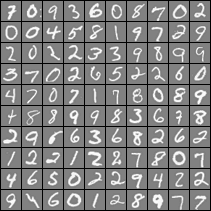

In [10]:
% Chamando função
displayData(selection)

Interessante! Semelhante ao dataset MNIST!

## Regressão Logística

In [11]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.

% Test case for lrCostFunction
fprintf('Testing lrCostFunction() with regularization\n');

Testing lrCostFunction() with regularization


É necessário implementar a função ```lrCostFunction()``` para os cálculos.

In [12]:
% Dados de entrada da função
theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;

Vamos visualizar cada uma das variáveis envolvidas.

In [13]:
theta_t
X_t
y_t
lambda_t

theta_t =

  -2
  -1
   1
   2

X_t =

   1.00000   0.10000   0.60000   1.10000
   1.00000   0.20000   0.70000   1.20000
   1.00000   0.30000   0.80000   1.30000
   1.00000   0.40000   0.90000   1.40000
   1.00000   0.50000   1.00000   1.50000

y_t =

  1
  0
  1
  0
  1

lambda_t =  3


In [14]:
% Entendendo a construção de X_t
[ones(5, 1)]

ans =

   1
   1
   1
   1
   1



In [15]:
% Aplicando reshape
[ones(5, 1) reshape(1:15, 5, 3)]

ans =

    1    1    6   11
    1    2    7   12
    1    3    8   13
    1    4    9   14
    1    5   10   15



In [16]:
[ones(5, 1) reshape(1:15, 5, 3)/10]

ans =

   1.00000   0.10000   0.60000   1.10000
   1.00000   0.20000   0.70000   1.20000
   1.00000   0.30000   0.80000   1.30000
   1.00000   0.40000   0.90000   1.40000
   1.00000   0.50000   1.00000   1.50000



In [17]:
% Definindo função sigmoid para calcular z dentro da função custo
function g = sigmoid(z)
%SIGMOID Compute sigmoid functoon
%   J = SIGMOID(z) computes the sigmoid of z.

g = 1.0 ./ (1.0 + exp(-z));
end

In [18]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations. 
%
% Hint: When computing the gradient of the regularized cost function, 
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta; 
%           temp(1) = 0;   % because we don't add anything for j = 0  
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    z = X * theta;
    h = sigmoid(z);
    
    % Adicionando bias
    theta(1) = 0;
    
    % Calculando J
    unreg_J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h)); % Custo sem regularização
    reg_J = (lambda / (2 * m)) * (theta' * theta); % Custo da regularização

    J = unreg_J + reg_J; % Somando os termos
    
    # Calcula gradiente para theta_0
    grad = (X' * (h - y) + lambda * theta) / m; % Termo (lambda*theta/2) aplicado
    
end

In [19]:
% Chamando função custo com os parâmetros adequados
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

In [20]:
% Comunicando resultados
fprintf('Função custo J: %.3f\n', J)
fprintf('\n')
grad

Função custo J: 2.535

grad =

   0.14656
  -0.54856
   0.72472
   1.39800



Valores estão de acordo com os propostos na solução desta parte do exercício.

## One vs All Classifier

Para implementar esta função, é necessário passar os seguintes argumentos:
    - X
    - y
    - num_labels
    - lambda

Verificando cada um deles

In [21]:
% Informações de X e y
dim_x = size(X)
dim_y = size(y)

dim_x =

   5000    400

dim_y =

   5000      1



In [22]:
% Verificando alguns elementos de y
rand_indices_y = randperm(size(y, 1));
y(rand_indices_y)(1:10, :)

ans =

    8
    8
    9
    6
    2
    2
   10
    8
    1
    5



In [23]:
% Informações de num_labels e lambda
num_labels
lambda

num_labels =  10
error: 'lambda' undefined near line 1 column 1


Lambda ainda não foi definido.

In [ ]:
% Definindo lambda
lambda = .1

lambda =  0.10000


In [ ]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%












% =========================================================================


end

In [ ]:
% Dentro da função temos
m = size(X, 1)
n = size(X, 2)
all_theta = zeros(num_labels, n+1);
size(all_theta)

m =  5000
n =  400
ans =

    10   401



Primeiramente, vamos entender o retorno da função:
    - all_theta

*all_theta* representa a matriz de parâmetros treinados para cada uma das 10 classes. Cada linha dessa matriz corresponde ao parâmetroo de regressão logística treinado para esta determinada classe.

In [ ]:
# Percorrendo cada uma das classes
num_labels = 10;
for i = 1:num_labels
    fprintf('%d\n', i)
endfor

1
2
3
4
5
6
7
8
9
10


Para cada uma das classes (lembrando que o 0 foi mapeado em 10), devemos treinar o modelo. Para o melhor ajuste possível, será utilizada a função ```fmincg``` (semelhante a ```fminunc```). Lembrando ```fminunc```:

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X_map, y, lambda)), initial_theta, options);
    
O retorno da função ```fminunc``` contemplava a matriz ```theta``` que, por sua vez, representa a matriz de parâmetros treinados para o modelo (n features). No caso atual, essa matriz é representada por ```all_theta``` que, provavelmente, irá se tratar de uma matriz com dimensões **400x1** para cada classe!

In [ ]:
% Configurando opções para fmincg
options = optimset('GradObj', 'on', 'MaxIter', 50)

options =

  scalar structure containing the fields:

    GradObj = on
    MaxIter =  50



Antes de implementar a função ```fmincg``` devemos lembrar que esta será aplicada dentro de um laço ```for``` para cada uma das classes (total de 10). Dessa forma, o parâmetro ```y``` que representa os labels do dataset deverá ser transformado em um vetor de True ou False (1 ou 0) considerando cada uma das classes. Por exemplo:

In [ ]:
% Vetor lógico para a classe 5
y==5

ans =

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
 

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


Acima temos uma indexação lógica que retorna **1** toda vez que o label for igual a "5". Caso contrário, retorna **0**. Isso deverá ser aplicado para cada uma das classes dentro do laço for.

In [ ]:
% Como a função fmincg retorna apenas theta, temos para uma classe (ex: 5):
initial_theta = zeros(size(X, 2), 1);
[theta_test] = fmincg (@(t)(lrCostFunction(t, X, y==5, lambda)), initial_theta, options)

Verificando *initial_theta*:

In [ ]:
initial_theta = zeros(size(X, 2), 1)

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



In [ ]:
# Quais as dimensões de initial_theta (e de theta, futuramente)
size(initial_theta)

ans =

   400     1



De fato! Teremos, ao rodar a função ```fmincg```, uma matriz contendo 400 parâmetros aprendidos pelo modelo que irão definir, dada uma instância de entrada, a qual classe essa pertence.

In [ ]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logisitc regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell use 
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%

options = optimset('GradObj', 'on', 'MaxIter', 50);
for i=1:num_labels
	initial_theta = zeros(size(X, 2), 1);
	[theta] = fmincg(@(t)(lrCostFunction(t, X,y==i, lambda)), initial_theta, options);
	all_theta(i,:) = theta';
end


% =========================================================================


end


In [ ]:
lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

error: 'fmincg' undefined near line 55 column 11
error: called from
    oneVsAll at line 55 column 9


Por algum motivo, a função fmincg não roda no Jupyter Notebook. De toda a forma, a ideia foi entendida.

In [ ]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ============ Part 2: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================ Part 3: Predict for One-Vs-All ================
%  After ...
pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);



Loading and Visualizing Data ...
Program paused. Press enter to continue.
Paused, enter any value to continue

Training One-vs-All Logistic Regression...
error: 'fmincg' undefined near line 55 column 11
error: called from
    oneVsAll at line 55 column 9
Program paused. Press enter to continue.
